# 0.0 Imports 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
from IPython.core.display import HTML

import scipy
from scipy import stats

#Biblioteca pingouin
import pingouin as pg

import sklearn
from sklearn.linear_model import LinearRegression

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.formula.api import ols

## 0.1 Helper Functions

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [4]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('axes' ,labelsize=18)

# 8.3 Teste de Hipótese relativos aos coeficientes individuais de regressão

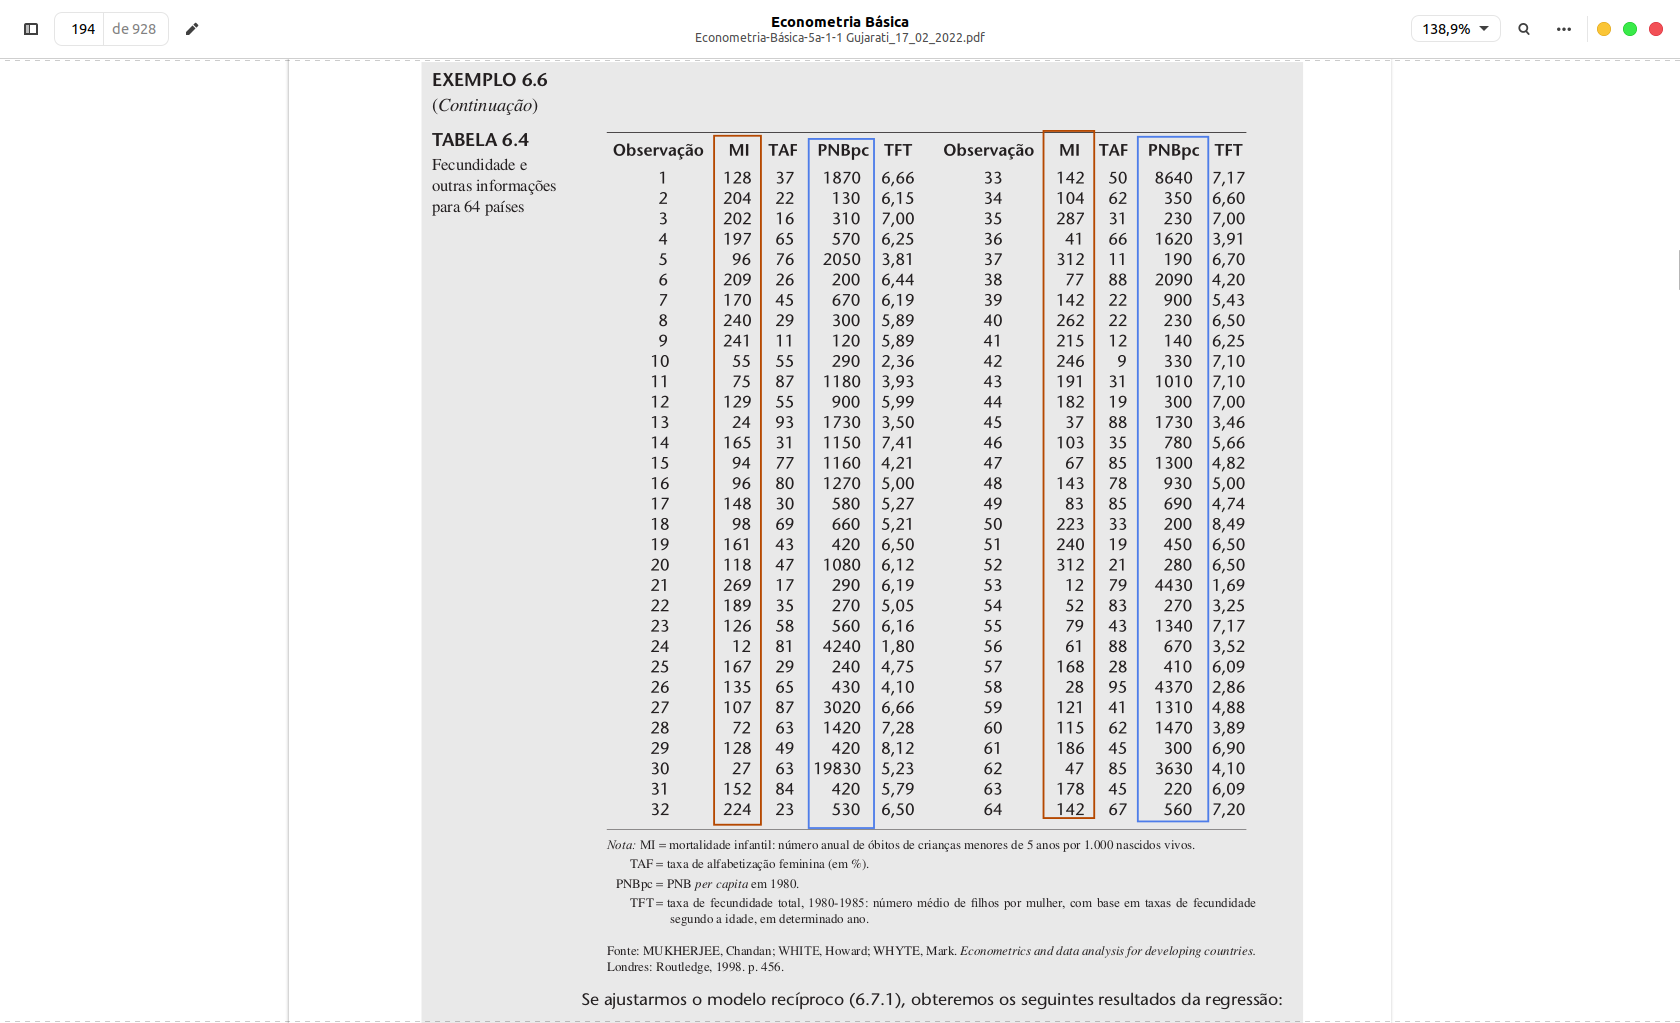

In [5]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.6_2.png')

In [6]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc    tft
0           1  128   37   1870 6.6600
1           2  204   22    130 6.1500
2           3  202   16    310 7.0000
3           4  197   65    570 6.2500
4           5   96   76   2050 3.8100

## Regressão - Pingouin

In [7]:
#biblioteca Pingouin
pg.linear_regression(data[['pnbpc', 'taf']], data['mi'])

names     coef      se        T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept 263.6416 11.5932  22.7411 0.0000 0.7077  0.6981  240.4596   286.8236
1      pnbpc  -0.0056  0.0020  -2.8187 0.0065 0.7077  0.6981   -0.0097    -0.0016
2        taf  -2.2316  0.2099 -10.6293 0.0000 0.7077  0.6981   -2.6514    -1.8118

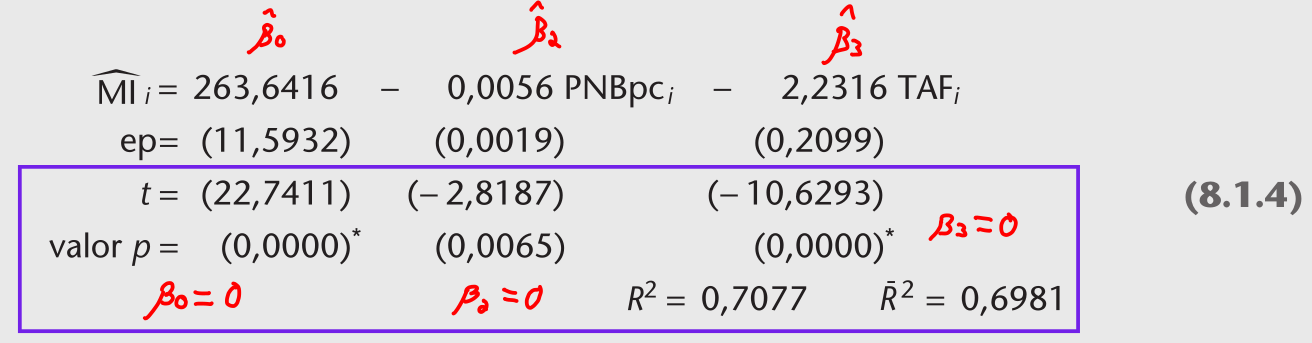

In [8]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.1_1.png')

In [9]:
# parametro relimp = True
lm = pg.linear_regression(data[['pnbpc', 'taf']], data['mi'], relimp = True)
lm.head()

names     coef      se        T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]  relimp  relimp_perc
0  Intercept 263.6416 11.5932  22.7411 0.0000 0.7077  0.6981  240.4596   286.8236     NaN          NaN
1      pnbpc  -0.0056  0.0020  -2.8187 0.0065 0.7077  0.6981   -0.0097    -0.0016  0.1021      14.4343
2        taf  -2.2316  0.2099 -10.6293 0.0000 0.7077  0.6981   -2.6514    -1.8118  0.6055      85.5657

In [10]:
#residuos - desvios do modelo
lm.residuals_

array([-42.51378125,  -9.8126422 , -24.18576952,  81.63004598,
        13.53444935,   4.50896236,  10.56299083,  42.76837904,
         2.58344881, -84.26685789,  12.16935491,  -6.82243505,
       -22.33550355, -22.9688439 ,   8.7405657 ,  18.05644832,
       -45.41898868,  -7.93541756,  -4.31182934, -34.65873384,
        44.93288431,   4.98849558,  -5.04752009, -46.94157934,
       -30.57041665,  18.8395227 ,  54.55908937, -43.03351989,
       -23.92231495,  15.92029068,  78.18318565,  14.67758146,
        38.72428017, -19.30696208,  93.83628887, -66.20944374,
        73.97871044,  21.53934192, -67.46476419,  48.75201728,
       -21.07203357,   4.30606225,   2.24063282, -37.54747828,
       -20.49343221, -78.13174106,   0.38377482,  58.67343462,
        12.93935198,  34.13006248,  21.29951095,  96.80276129,
       -50.33189779, -24.8953893 , -81.11696211,  -2.47882272,
       -30.84208126,   1.03467822, -43.74953142,  -1.98277588,
        24.47375074,  -6.45965925,  16.02202316,  31.03

In [11]:
#graus de liberdade do modelo
lm.df_model_

2

In [12]:
#graus de liberdade dos residuos - desvios
lm.df_resid_ 

61

## Regressão Statsmodels

In [13]:
#statsmodels
x = data[['pnbpc','taf']]
y = data[['mi']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     mi   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           5.12e-17
Time:                        19:45:05   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

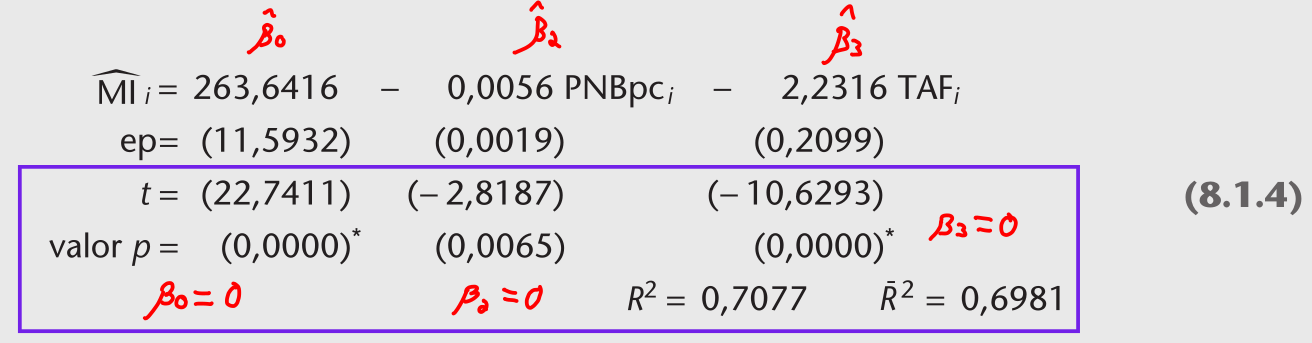

In [14]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.1_1.png')

In [15]:
#valor predito de mi
data['predict_mi'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc    tft  predict_mi       u1
0           1  128   37   1870 6.6600    170.5138 -42.5138
1           2  204   22    130 6.1500    213.8126  -9.8126
2           3  202   16    310 7.0000    226.1858 -24.1858
3           4  197   65    570 6.2500    115.3700  81.6300
4           5   96   76   2050 3.8100     82.4656  13.5344
5           6  209   26    200 6.4400    204.4910   4.5090
6           7  170   45    670 6.1900    159.4370  10.5630
7           8  240   29    300 5.8900    197.2316  42.7684
8           9  241   11    120 5.8900    238.4166   2.5834
9          10   55   55    290 2.3600    139.2669 -84.2669

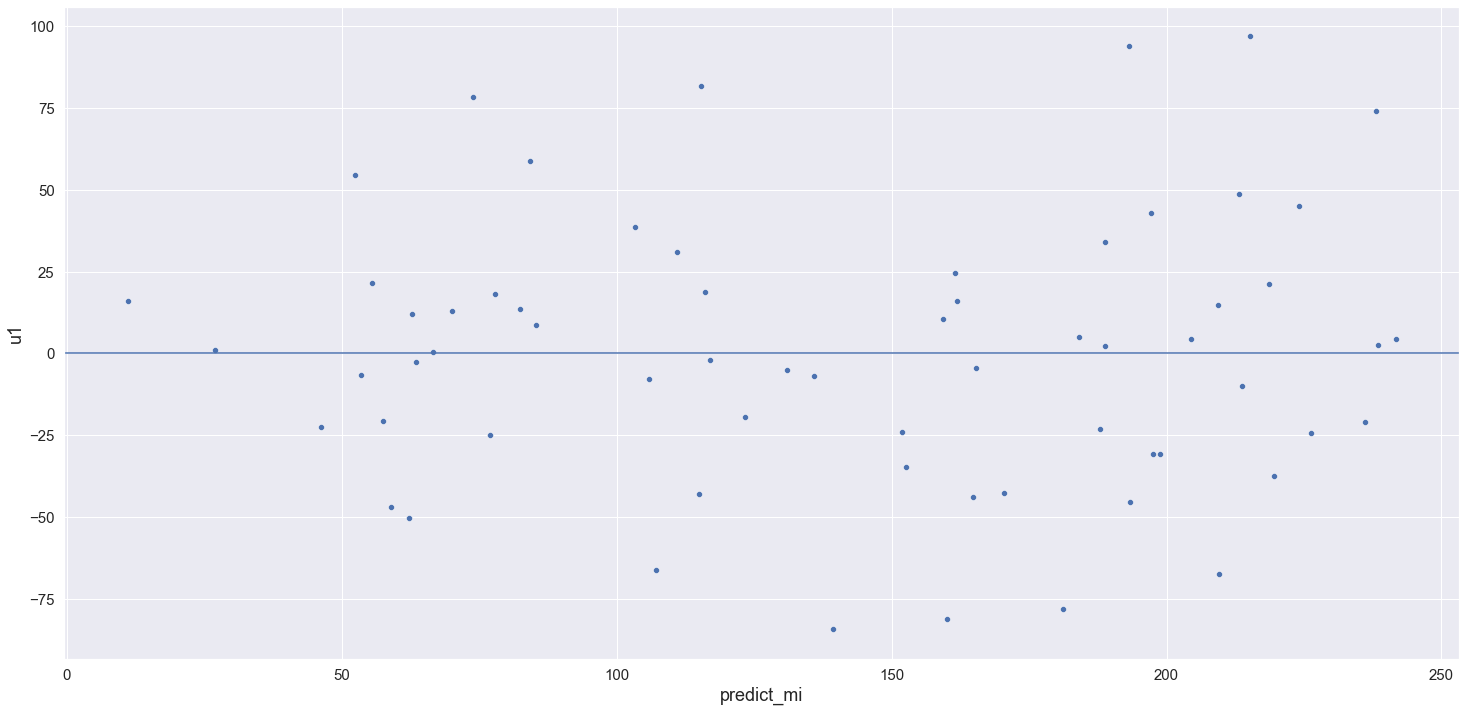

In [16]:
#dispersão dos resíduos
sns.scatterplot(x = 'predict_mi', y = 'u1', data = data );
plt.axhline(y=0);

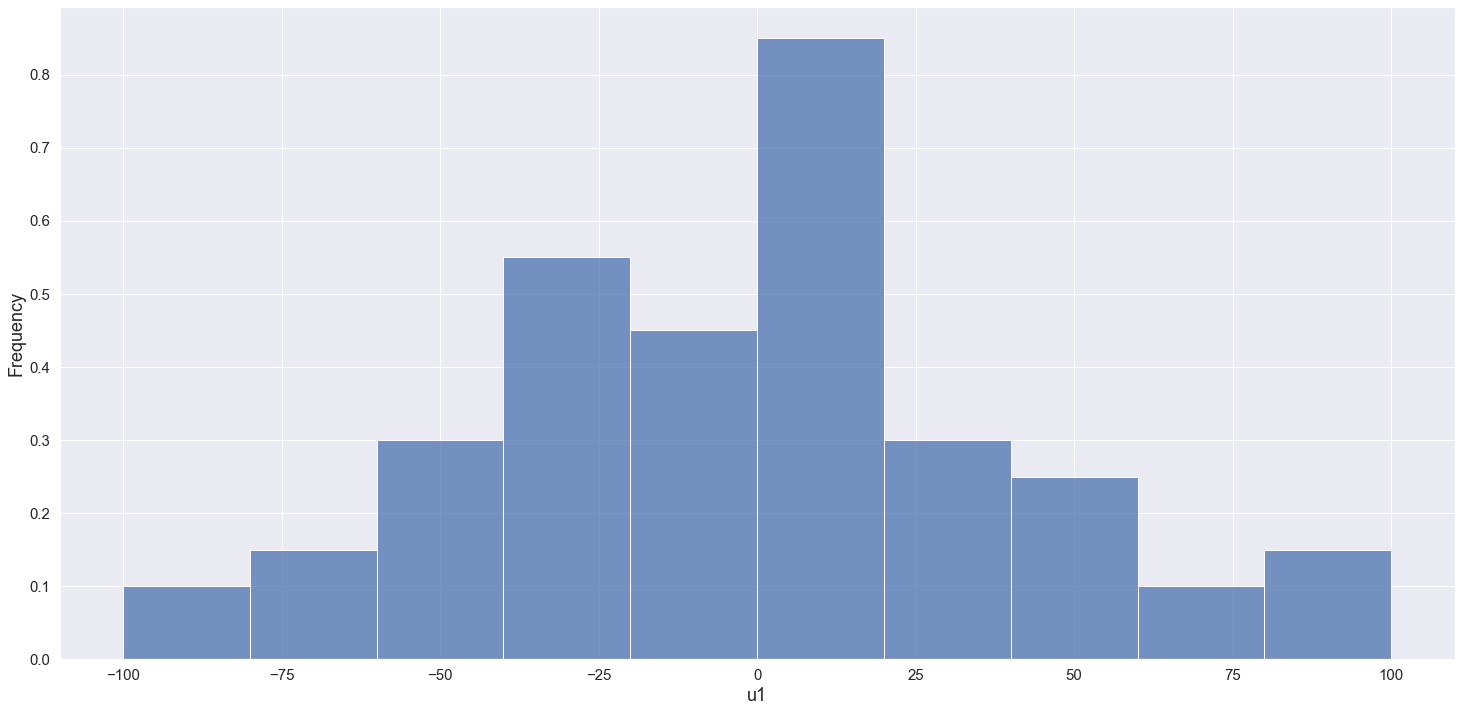

In [17]:
#histograma dos resíduos
sns.histplot(x = 'u1', data = data, stat = 'frequency', binrange = (-100,100));

In [18]:
#teste de normalidade Jarque Bera
#from statsmodels.stats.stattools import jarque_bera
# resultado ( jarque bera test statistic , pvalue, skewness, kurtosis)
jb = jarque_bera( data['u1'])
jb

(0.5594048565247834,
 0.7560086748021702,
 0.22757474140642056,
 2.948855406033511)

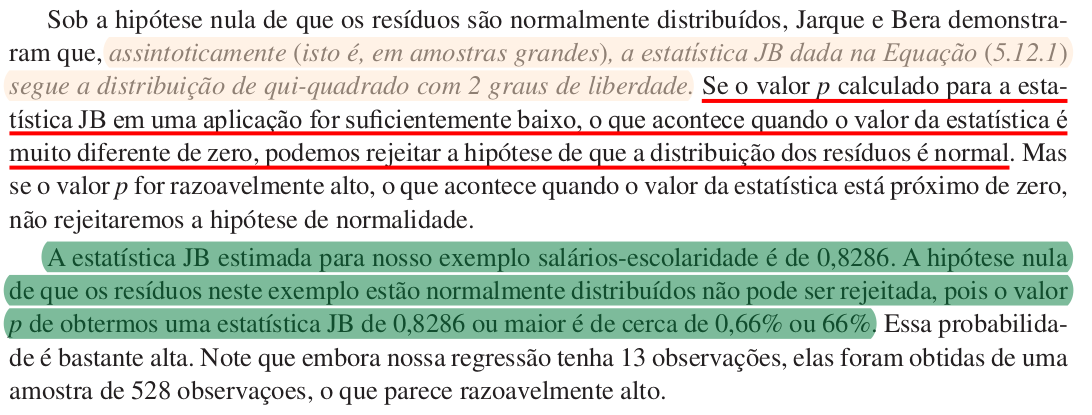

In [19]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_2.png')

In [20]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u1'])
print(stat_test)
print(p_valor)

0.7321316498990778
0.6934571529252757


$H_0$ a amostra é proveniente de uma distribuição normal.

$H_1$ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

## Função Densidade de Probabilidade - Distribuição  t de student - Tabela t

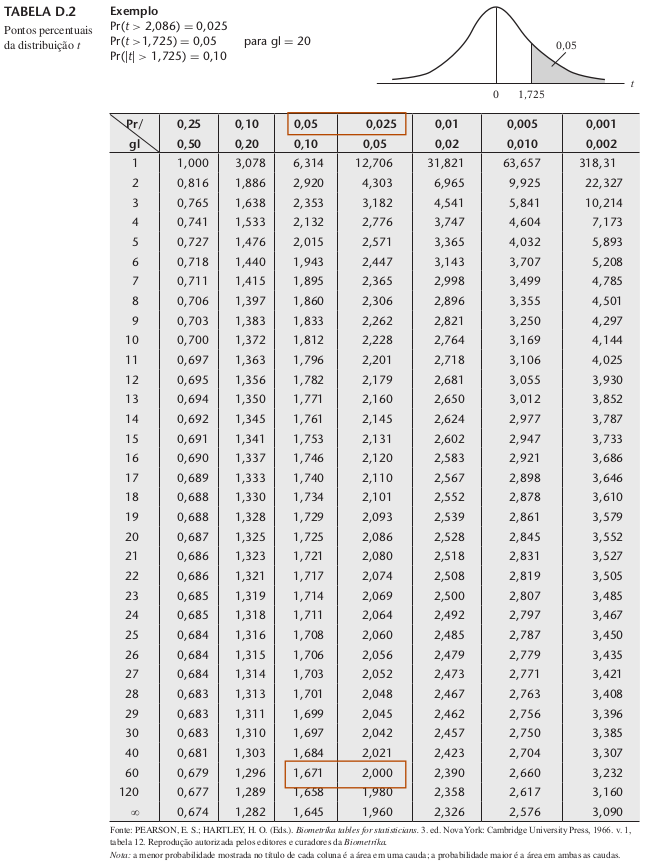

In [21]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/tabela_d2_1.png')

## Função Densidade de Probabilidade - Distribuição  t de student - Scipy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [22]:
# stats.t.pdf() Calcula a Função densidade de probabilidade - distribuição t
#     x      --> dominio 
#     .pdf() --> Probability density function
#     df     --> graus de liberdade
#     loc    --> valor central = 0 
#     scale  --> desvio padrao / erro padrao = 1
    
domain = np.linspace( -4,4,1000 )
d_t = stats.t.pdf(domain, df = 60, loc = 0, scale = 1)

In [305]:
d_t[0:20]

array([0.0002937 , 0.00030134, 0.00030918, 0.0003172 , 0.00032543,
       0.00033386, 0.0003425 , 0.00035135, 0.00036042, 0.00036971,
       0.00037923, 0.00038898, 0.00039897, 0.00040921, 0.00041969,
       0.00043043, 0.00044143, 0.0004527 , 0.00046424, 0.00047606])

In [24]:
len(d_t)

1000

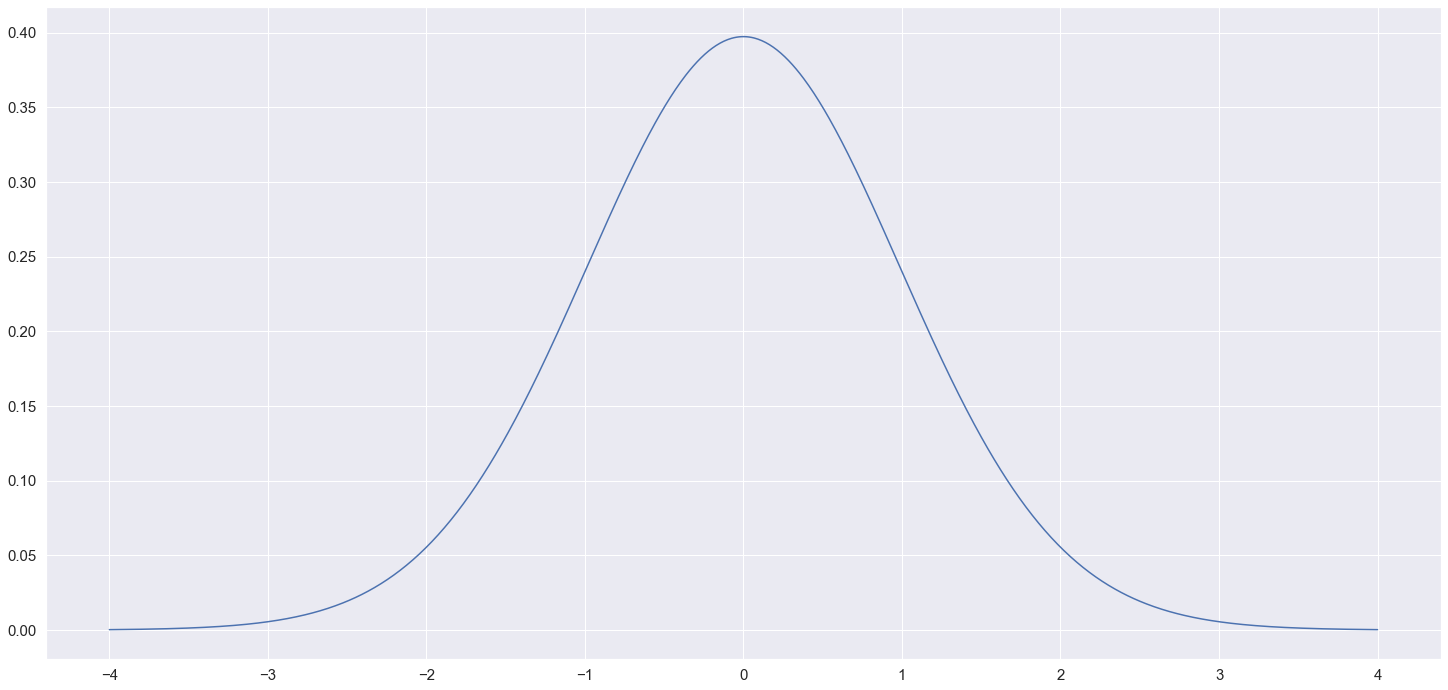

In [25]:
plt.plot(domain, d_t);

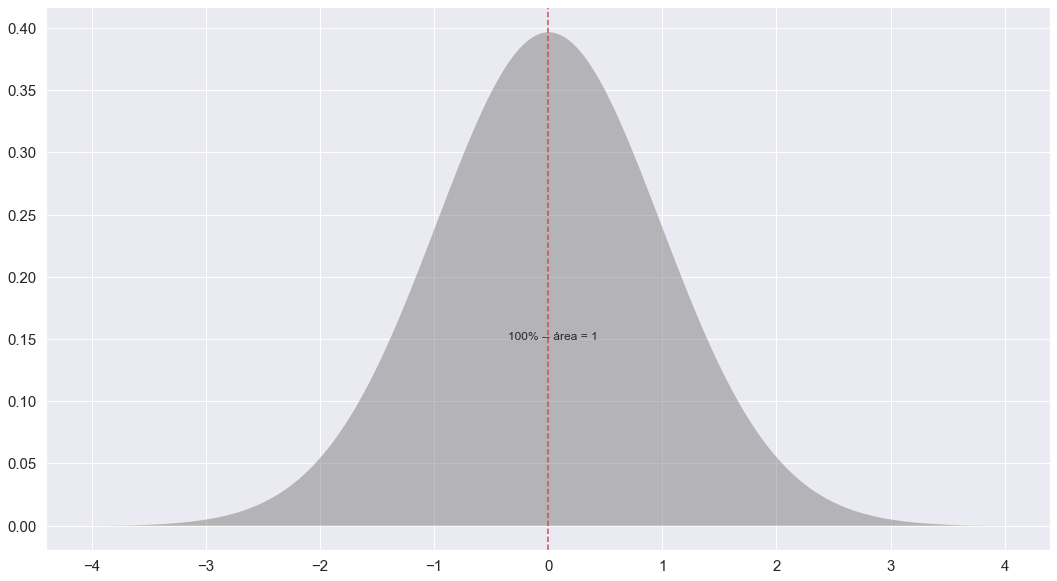

In [26]:
plt.figure( figsize = (18,10) )

domain = np.linspace( -4,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );
plt.text( x= -0.35, y= 0.15, s = "100% -- área = 1");
plt.axvline( x = 0, color = 'r', linestyle = '--');

## Valor t de acordo com o nível de significância e graus de liberdade da amostra

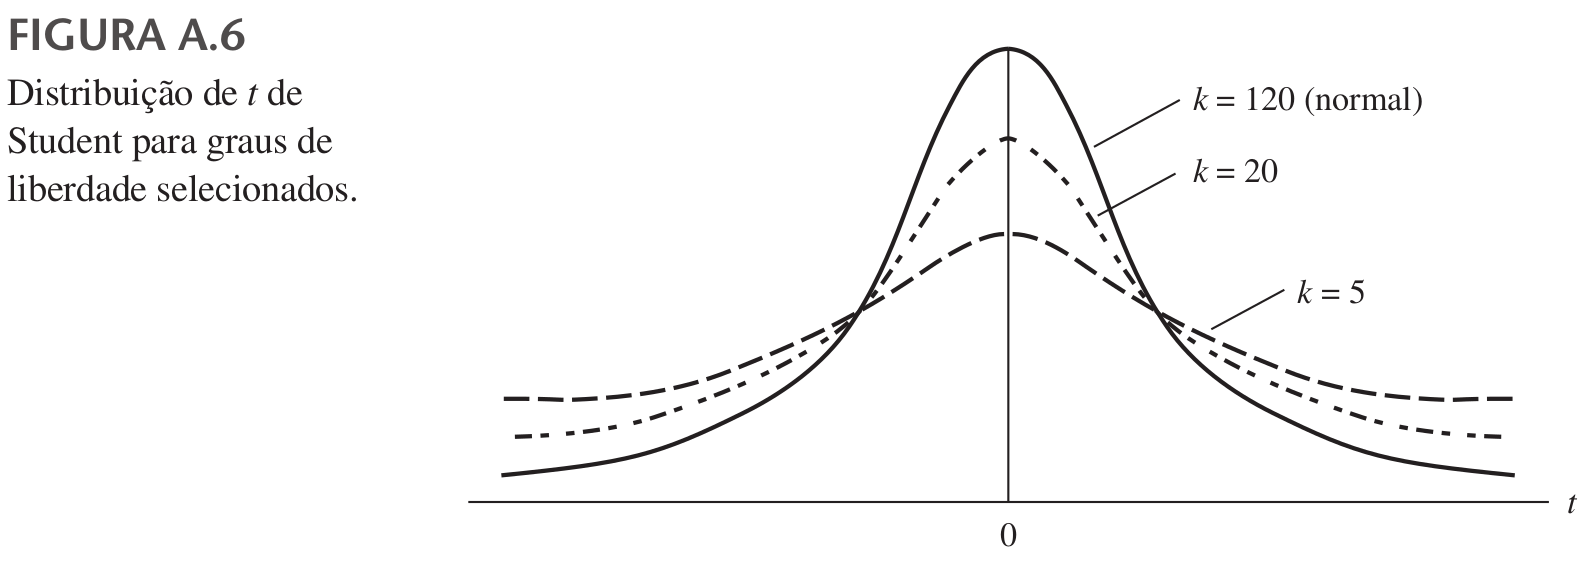

In [27]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/dist_t_student_gl.png')

### Alterando os graus de liberdade - Amostra com 64 elementos - 60 graus de liberdade*

In [28]:
# stats.t.ppf() - calcula o valor t de acordo com nível de significancia escolhido.
#     .ppf --> Percent point function (inverse of cdf — percentiles).
#     q    --> quantile - nível de significancia desejado
#     df   --> graus de liberdade 

# Primeira cauda
cauda_1 = stats.t.ppf(q = 0.025, df = 60)
cauda_1

-2.000297821058262

In [29]:
# segunda cauda
cauda_2 = stats.t.ppf(q = 0.975, df = 60, loc = 0, scale = 1)
cauda_2

2.0002978210582616

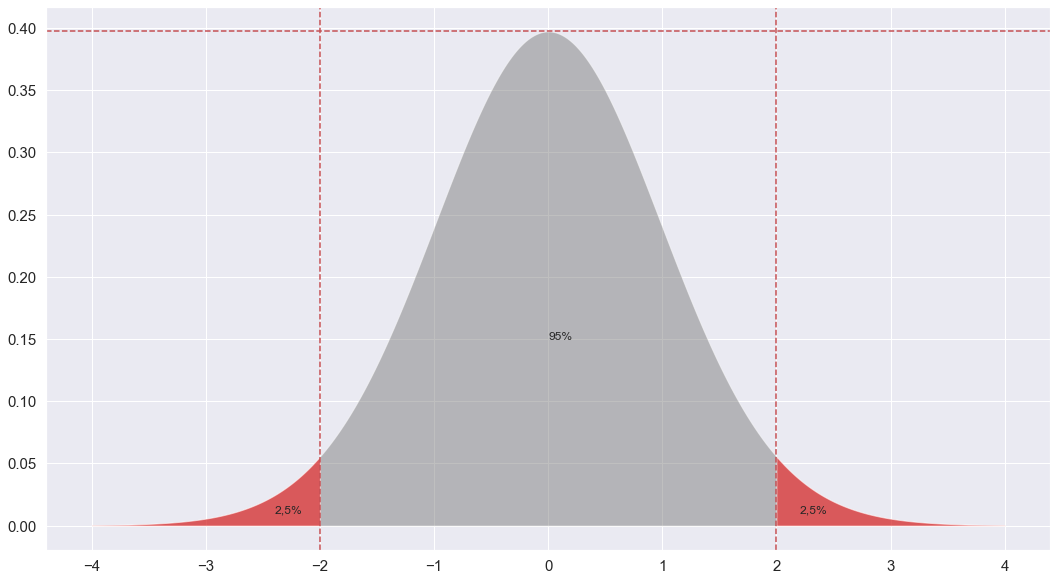

In [30]:
plt.figure( figsize = (18,10) )

domain = np.linspace( -4,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );

domain = np.linspace( -4,cauda_1,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

domain = np.linspace( cauda_2,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );


plt.axvline( x = -2, color = 'r', linestyle = '--');
plt.axvline( x = 2, color = 'r', linestyle = '--');
plt.axhline( y = 0.3975, color = 'r', linestyle = '--');
plt.text( x= 0, y= 0.15, s = "95%");
plt.text( x=  2.2, y= 0.01, s = "2,5%");
plt.text( x= -2.4, y= 0.01, s = "2,5%");

### Alterando os graus de liberdade - Amostra com 13 elementos - 10 graus de liberdade

valor t cauda 1: -2.2281388519649385 

valor t cauda 2: 2.2281388519649385 



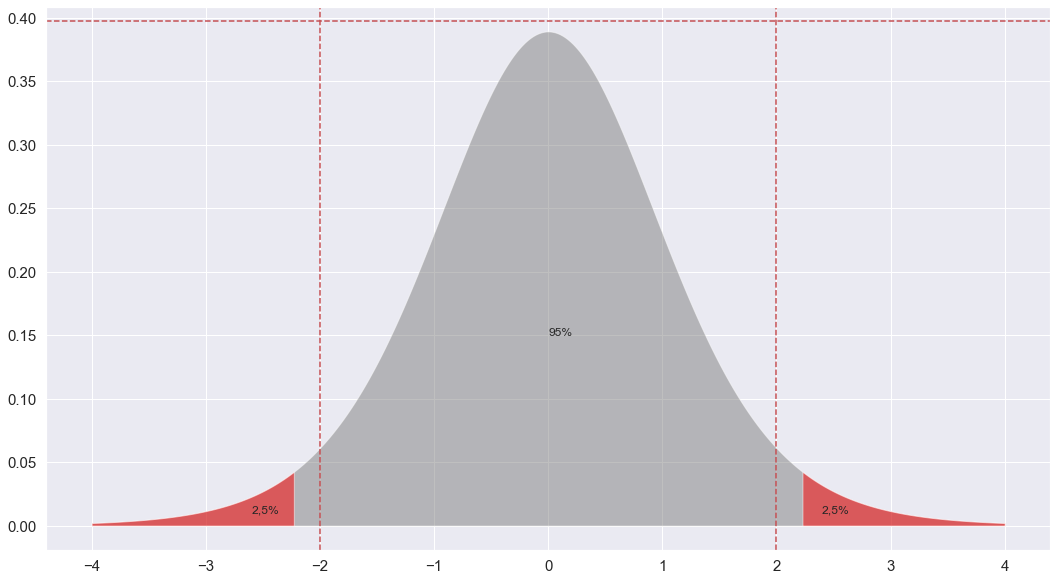

In [31]:
# Primeira cauda
cauda_1 = stats.t.ppf(q = 0.025, df = 10)
print('valor t cauda 1: {}'.format(cauda_1), '\n')

# segunda cauda
cauda_2 = stats.t.ppf(q = 0.975, df = 10)
print('valor t cauda 2: {}'.format(cauda_2), '\n')

plt.figure( figsize = (18,10) )

domain = np.linspace( -4,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 10, loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );

domain = np.linspace( -4,cauda_1,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 10, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

domain = np.linspace( cauda_2,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 10, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

plt.axvline( x = -2, color = 'r', linestyle = '--');
plt.axvline( x = 2, color = 'r', linestyle = '--');
plt.axhline( y = 0.3975, color = 'r', linestyle = '--');
plt.text( x= 0, y= 0.15, s = "95%");
plt.text( x=  2.4, y= 0.01, s = "2,5%");
plt.text( x= -2.6, y= 0.01, s = "2,5%");

### Alterando os graus de liberdade - Amostra com 8 elementos - 5 graus de liberdade

valor t cauda 1: -2.57058183661474 

valor t cauda 2: 2.5705818366147395 



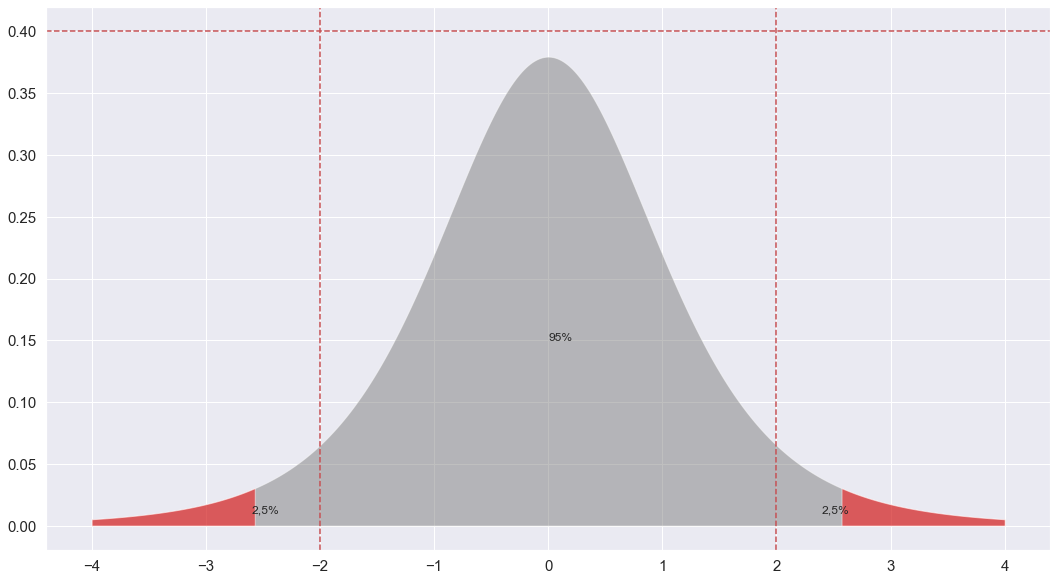

In [32]:
# Primeira cauda
cauda_1 = stats.t.ppf(q = 0.025, df = 5)
print('valor t cauda 1: {}'.format(cauda_1), '\n')

# segunda cauda
cauda_2 = stats.t.ppf(q = 0.975, df = 5)
print('valor t cauda 2: {}'.format(cauda_2), '\n')

plt.figure( figsize = (18,10) )

domain = np.linspace( -4,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 5, loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );

domain = np.linspace( -4,cauda_1,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 5, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

domain = np.linspace( cauda_2,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 5, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

plt.axvline( x = -2, color = 'r', linestyle = '--');
plt.axvline( x = 2, color = 'r', linestyle = '--');
plt.axhline( y = 0.4, color = 'r', linestyle = '--');
plt.text( x= 0, y= 0.15, s = "95%");
plt.text( x=  2.4, y= 0.01, s = "2,5%");
plt.text( x= -2.6, y= 0.01, s = "2,5%");

## Calculando o p-valor - Abordagem nível de significância

In [33]:
# stats.t.cdf() - calculando o p-valor a partir do valor t 

# teste de bicaudal
#     .cdf() --> Cumulative distribution function
#     x    --> valor t
#     df   --> graus de liberdade
#     2    --> duas caudas

### Cauda negativa

In [34]:
# cauda negativa
p_valor = stats.t.cdf( x = -2.8187, df = 60, loc = 0, scale = 1 )
p_valor

0.0032611415169248007

### Cauda Positiva

In [35]:
# cauda positiva
p_valor = 1 - stats.t.cdf( x = +2.8187, df = 60, loc = 0, scale = 1 )
p_valor

0.0032611415169248037

### Duas caudas

In [36]:
# para testes de duas caudas multiplicar por 2
p_valor = stats.t.cdf( x = -2.8187, df = 60, loc = 0, scale = 1 )*2
p_valor

0.006522283033849601

In [37]:
# para testes de duas caudas multiplicar por 2
p_valor = ( 1 - stats.t.cdf( x = +2.8187, df = 60, loc = 0, scale = 1 ) )*2
p_valor

0.006522283033849607

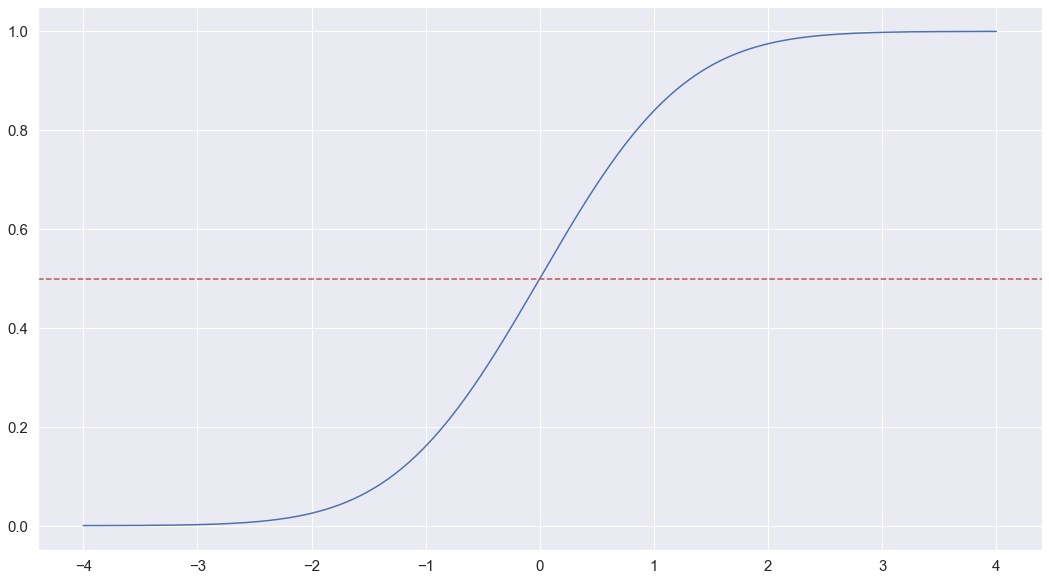

In [38]:
fig = plt.figure(figsize=( 18,10) )

domain = np.linspace( -4,4,1000 )
plt.plot( domain,stats.t.cdf(domain, df = 60, loc = 0, scale = 1) )
axhline( 0.5, color = 'r', linestyle = '--');

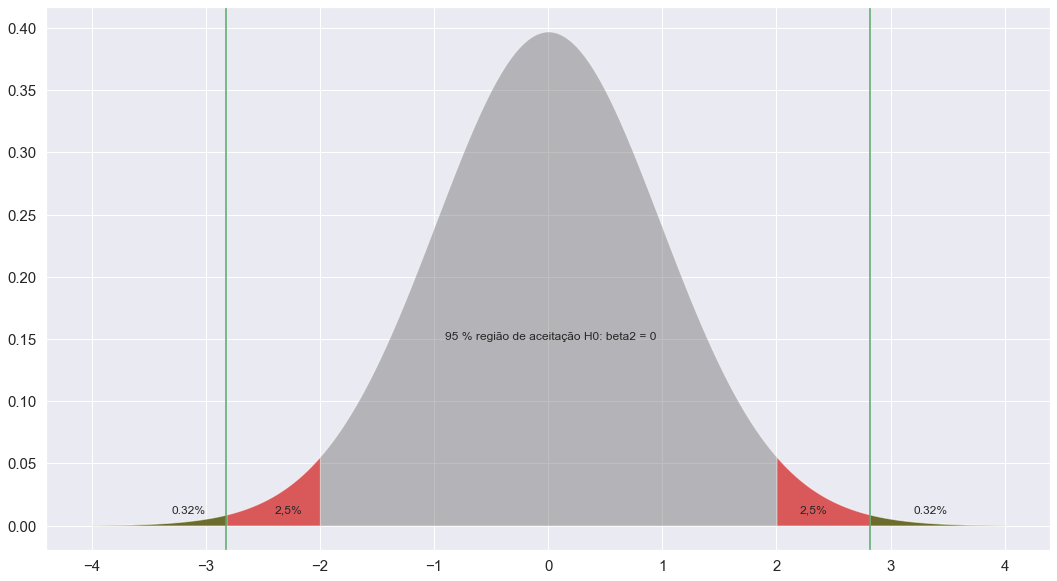

In [39]:
cauda_1 = stats.t.ppf(q = 0.025, df = 60, loc = 0, scale = 1)
cauda_2 = stats.t.ppf(q = 0.975, df = 60, loc = 0, scale = 1)

plt.figure( figsize = (18,10) )

# Curva
domain = np.linspace( -4,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );

# tabela - nivel significância 5% teste Bicaudal
domain = np.linspace( -4,cauda_1,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

domain = np.linspace( cauda_2,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );
#p-valor
domain = np.linspace( -4, -2.8187,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'green', alpha = 0.5 );

domain = np.linspace( 2.8187, 4, 1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'green', alpha = 0.5 );

plt.axvline( x = -2.8187, color = 'g', linestyle = '-');
plt.axvline( x =  2.8187, color = 'g', linestyle = '-');

plt.text( x= -0.9, y= 0.15, s = "95 % região de aceitação H0: beta2 = 0");
plt.text( x=  3.2, y= 0.01, s = "0.32%");
plt.text( x=  2.2, y= 0.01, s = "2,5%" );
plt.text( x= -2.4, y= 0.01, s = "2,5%" );
plt.text( x= -3.3, y= 0.01, s = "0.32%");

## Abordagem Intervalo de confiança

In [40]:
# Intervalo de confiança
#     .interval --> Endpoints of the range that contains fraction alpha [0, 1] of the distribution
#     df        --> graus de liberdade
#     loc       --> valor central onde vamos construir o intervalo --> na regressão -->  beta 2
#     scale     --> desvio padrão --> regressão --> erro padrão

stats.t.interval( 0.95, df = 60, loc = -0.0056, scale = 0.0020 )

(-0.009600595642116523, -0.0015994043578834768)

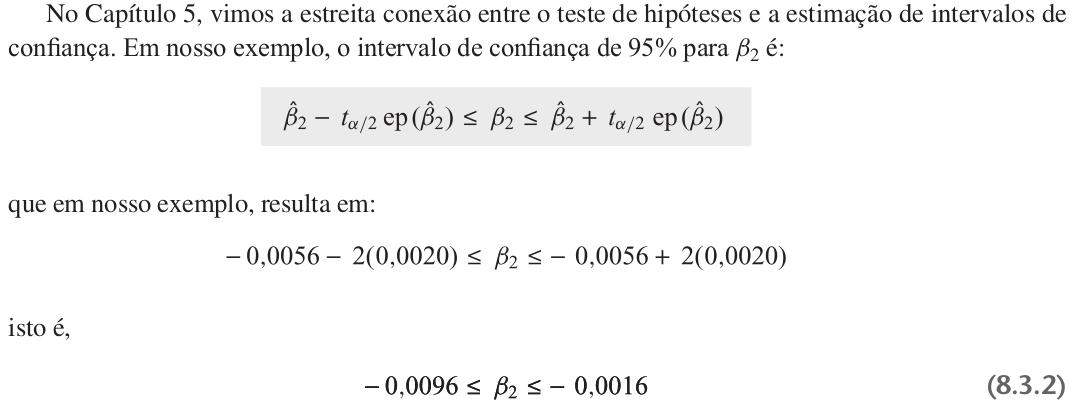

In [41]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/secao_8.3_1.png')

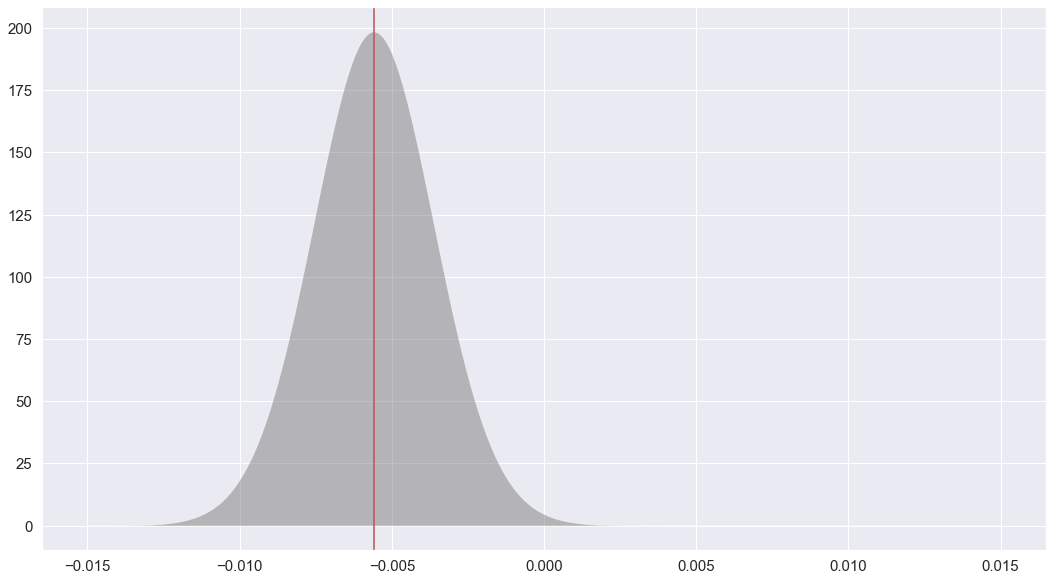

In [42]:
plt.figure( figsize = (18,10) )

# Curva
domain = np.linspace( -0.015,0.015,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = -0.0056, scale = 0.0020),
                  facecolor = 'gray', alpha = 0.5 );

# beta2 = -0.0056
plt.axvline( x = -0.0056, color = 'r', linestyle = '-' );

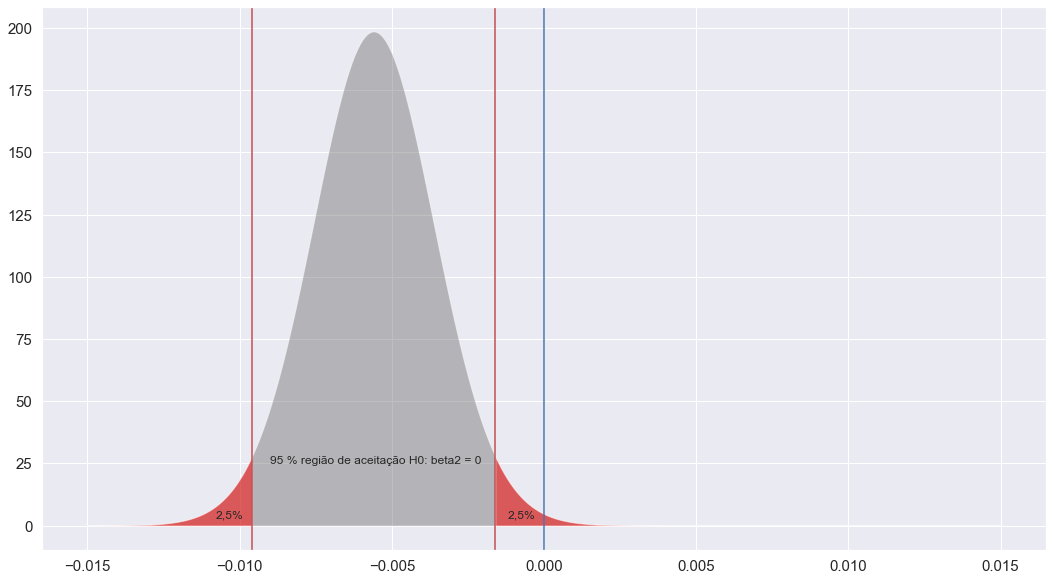

In [43]:
plt.figure( figsize = (18,10) )

# Curva
domain = np.linspace( -0.015,0.015,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = -0.0056, scale = 0.0020),
                  facecolor = 'gray', alpha = 0.5 );

# tabela - nivel significância 5% teste Bicaudal
domain = np.linspace( -0.015,-0.0096,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = -0.0056, scale = 0.0020),
                  facecolor = 'red', alpha = 0.5 );

domain = np.linspace( -0.0016,0.015,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = -0.0056, scale = 0.0020),
                  facecolor = 'red', alpha = 0.5 );

#plt.axvline( x = -0.0056, color = 'r', linestyle = '-' );
plt.axvline( x = -0.0096, color = 'r', linestyle = '-' );
plt.axvline( x = -0.0016, color = 'r', linestyle = '-' );
plt.axvline( x = 0, color = 'b', linestyle = '-' );

plt.text( x= -0.0090, y= 25, s = "95 % região de aceitação H0: beta2 = 0");
plt.text( x=  -0.0012, y= 3, s = "2,5%");
plt.text( x=  -0.0108, y= 3, s = "2,5%");

In [44]:
# Nível de significancia em 1%
stats.t.interval( alpha = 0.99, df = 60, loc = -0.0056, scale = 0.0020 )

(-0.010920566062301372, -0.0002794339376986279)

## Anova - Análise de variância

In [45]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc    tft
0           1  128   37   1870 6.6600
1           2  204   22    130 6.1500
2           3  202   16    310 7.0000
3           4  197   65    570 6.2500
4           5   96   76   2050 3.8100

In [46]:
#statsmodels
x = data[['pnbpc','taf']]
y = data[['mi']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao  MI (y) =  x + pnbpc(x2) + taf(x3) + u 

                            OLS Regression Results                            
Dep. Variable:                     mi   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           5.12e-17
Time:                        19:45:12   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [47]:
model.params

const   263.6416
pnbpc    -0.0056
taf      -2.2316
dtype: float64

In [48]:
#valor predito de mi
data['predict_mi'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc    tft  predict_mi       u1
0           1  128   37   1870 6.6600    170.5138 -42.5138
1           2  204   22    130 6.1500    213.8126  -9.8126
2           3  202   16    310 7.0000    226.1858 -24.1858
3           4  197   65    570 6.2500    115.3700  81.6300
4           5   96   76   2050 3.8100     82.4656  13.5344
5           6  209   26    200 6.4400    204.4910   4.5090
6           7  170   45    670 6.1900    159.4370  10.5630
7           8  240   29    300 5.8900    197.2316  42.7684
8           9  241   11    120 5.8900    238.4166   2.5834
9          10   55   55    290 2.3600    139.2669 -84.2669

## Cálculo do valor F - passo a passo

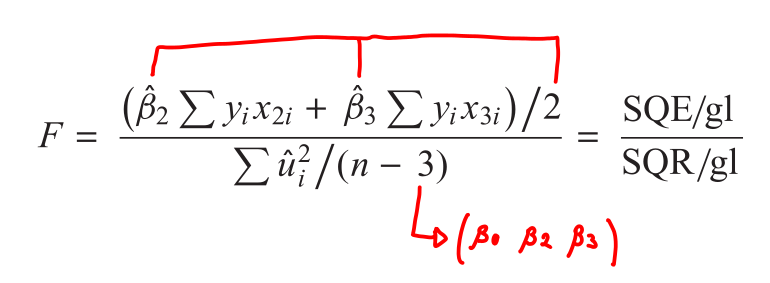

In [49]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_08_f_1.png')

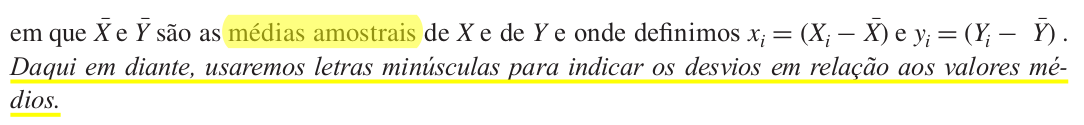

In [50]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_03_desvios.png')

In [51]:
data_anova = data.copy()

# erro² 
data_anova['u1_sqr'] = data_anova.apply(lambda x: np.square( x['u1'] ), axis = 1)

#mi
# media
data_anova['mi_mean'] = data_anova['mi'].mean()
#desvio
data_anova['desvio_mi'] = data_anova.apply(lambda x: x['mi'] - x['mi_mean'] , axis = 1)

# taf 
# media
data_anova['taf_mean'] = data_anova['taf'].mean()

#desvio
data_anova['desvio_taf'] = data_anova.apply(lambda x: x['taf'] - x['taf_mean'] , axis = 1)

#pnbpc
# media
data_anova['pnbpc_mean'] = data_anova['pnbpc'].mean()

#desvio
data_anova['desvio_pnbpc'] = data_anova.apply( lambda x: x['pnbpc']- x['pnbpc_mean'] , axis = 1)


In [52]:
data_anova.head(10)

observacao   mi  taf  pnbpc    tft  predict_mi       u1    u1_sqr  mi_mean  desvio_mi  taf_mean  desvio_taf  pnbpc_mean  desvio_pnbpc
0           1  128   37   1870 6.6600    170.5138 -42.5138 1807.4216 141.5000   -13.5000   51.1875    -14.1875   1401.2500      468.7500
1           2  204   22    130 6.1500    213.8126  -9.8126   96.2879 141.5000    62.5000   51.1875    -29.1875   1401.2500    -1271.2500
2           3  202   16    310 7.0000    226.1858 -24.1858  584.9514 141.5000    60.5000   51.1875    -35.1875   1401.2500    -1091.2500
3           4  197   65    570 6.2500    115.3700  81.6300 6663.4644 141.5000    55.5000   51.1875     13.8125   1401.2500     -831.2500
4           5   96   76   2050 3.8100     82.4656  13.5344  183.1813 141.5000   -45.5000   51.1875     24.8125   1401.2500      648.7500
5           6  209   26    200 6.4400    204.4910   4.5090   20.3307 141.5000    67.5000   51.1875    -25.1875   1401.2500    -1201.2500
6           7  170   45    670 6.1900    159.4370  10.5630  111.5768 141.5000    28.5000   51.1875     -6.1875   1401.2500     -731.2500
7           8  240   29    300 5.8900    197.2316  42.7684 1829.1342 141.5000    98.5000   51.1875    -22.1875   1401.2500    -1101.2500
8           9  241   11    120 5.8900    238.4166   2.5834    6.6742 141.5000    99.5000   51.1875    -40.1875   1401.2500    -1281.2500
9          10   55   55    290 2.3600    139.2669 -84.2669 7100.9033 141.5000   -86.5000   51.1875      3.8125   1401.2500    -1111.2500

In [53]:
numerador   = ( model.params[1] * ( data_anova.apply( lambda x: ( x['desvio_mi'] * x['desvio_pnbpc'] ), axis = 1   ).sum() )  + 
                model.params[2] * ( data_anova.apply( lambda x: ( x['desvio_mi'] * x['desvio_taf']   ), axis = 1   ).sum() ) ) / 2
denominador = ( data_anova['u1_sqr'].sum() ) / ( 64 - 3 )

F = numerador / denominador
F

73.83253622533624

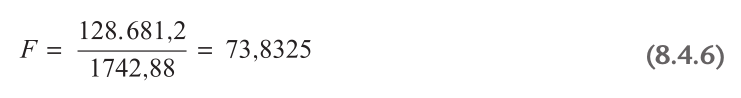

In [54]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_08_f_2.png')

In [55]:
numerador

128681.1865253845

In [56]:
denominador

1742.8791303152675

## Tabela Anova

In [57]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

In [58]:
# #statsmodels
# print(' Regressao  MI (y) =  x + pnbpc(x2) + taf(x3) + u \n')
# x = data[['pnbpc','taf']]
# y = data[['mi']]
# x = sm.add_constant(x) 
# model = sm.OLS(y, x).fit()
# predictions = model.predict(x) 

# print_model = model.summary()
# print(print_model)

In [59]:
# tabela 
lr0   = smf.ols( formula = "mi~1", data = data).fit()
anova = sm.stats.anova_lm(lr0, model, test = "F", typ = "I")

In [60]:
anova

df_resid         ssr  df_diff     ss_diff       F  Pr(>F)
0   63.0000 363678.0000   0.0000         NaN     NaN     NaN
1   61.0000 106315.6269   2.0000 257362.3731 73.8325  0.0000

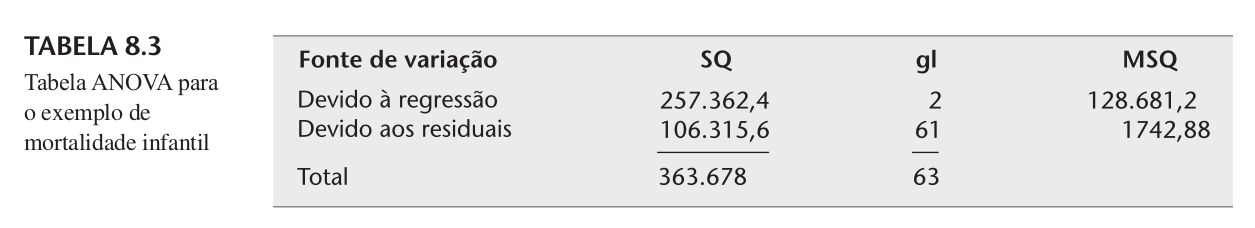

In [61]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_08_anova_1.png')

In [62]:
F = numerador / denominador
F

73.83253622533624

In [63]:
print('\nFonte de variação devido a regressão : {}'.format(numerador) )
print('\nFonte de variação devido aos resíduos: {}'.format(denominador) )


Fonte de variação devido a regressão : 128681.1865253845

Fonte de variação devido aos resíduos: 1742.8791303152675


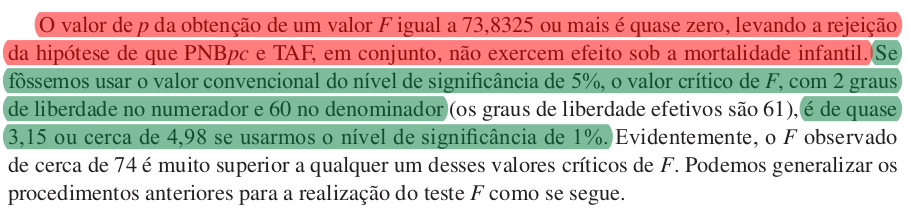

In [64]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_08_f_3.png')

### Contribuição Incremental  ou marginal de uma variável explanatória

#### PNBpc

In [65]:
#statsmodels
print(' Regressao  MI (y) =  x + pnbpc(x2) + u \n')
x = data[['pnbpc']]
y = data[['mi']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao  MI (y) =  x + pnbpc(x2) + u 

                            OLS Regression Results                            
Dep. Variable:                     mi   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           0.000826
Time:                        19:45:13   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [66]:
# tabela 
lr0 = smf.ols( formula = "mi ~ 1", data = data).fit()
anova= sm.stats.anova_lm(lr0, model, test = "F", typ = "I")
anova

df_resid         ssr  df_diff    ss_diff       F  Pr(>F)
0   63.0000 363678.0000   0.0000        NaN     NaN     NaN
1   62.0000 303228.5395   1.0000 60449.4605 12.3599  0.0008

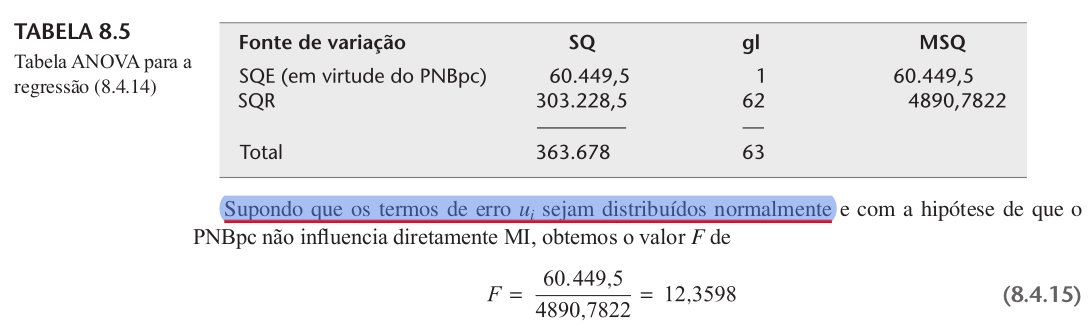

In [67]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_08_anova_2.png')

#### TAF

In [68]:
#statsmodels
x = data[['taf']]
y = data[['mi']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao  MI (y) =  x + pnbpc(x2) + u 

                            OLS Regression Results                            
Dep. Variable:                     mi   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     125.6
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.51e-16
Time:                        19:45:13   Log-Likelihood:                -332.02
No. Observations:                  64   AIC:                             668.0
Df Residuals:                      62   BIC:                             672.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [69]:
# tabela 
lr0 = smf.ols( formula = "mi ~ 1", data = data).fit()
anova= sm.stats.anova_lm(lr0, model, test = "F", typ = "I")
anova

df_resid         ssr  df_diff     ss_diff        F  Pr(>F)
0   63.0000 363678.0000   0.0000         NaN      NaN     NaN
1   62.0000 120162.9509   1.0000 243515.0491 125.6455  0.0000

## Exemplo 8.2 

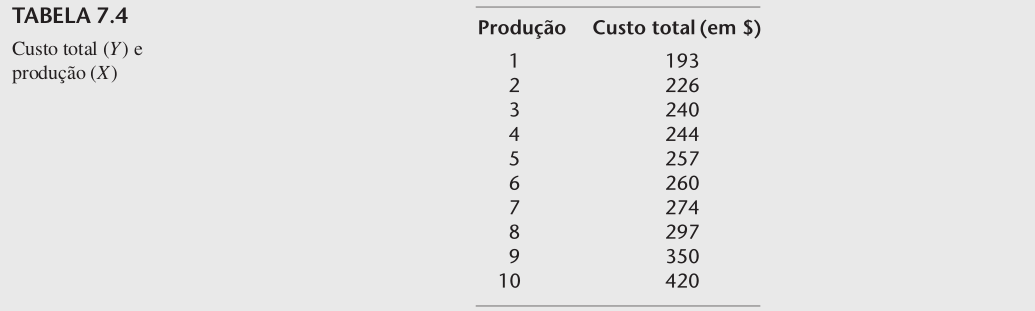

In [70]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.4_0.png')

In [71]:
tab = { 'producao':[1,2,3,4,5,6,7,8,9,10], 'custo_t':[193,226,240,244,257,260,274,297,350,420]}
data = pd.DataFrame( tab )
data.head(10)

producao  custo_t
0         1      193
1         2      226
2         3      240
3         4      244
4         5      257
5         6      260
6         7      274
7         8      297
8         9      350
9        10      420

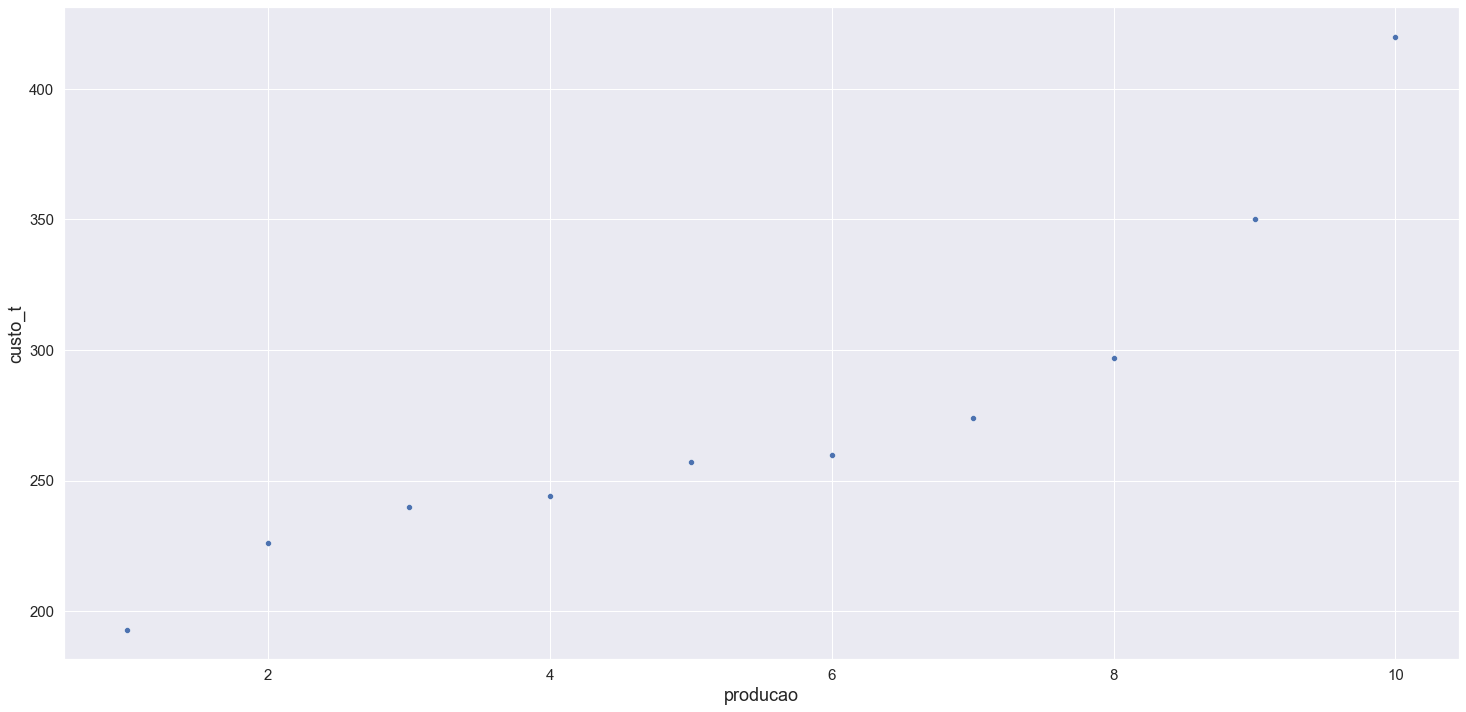

In [72]:
#Grafico 
sns.scatterplot( x = 'producao', y = 'custo_t', data = data);

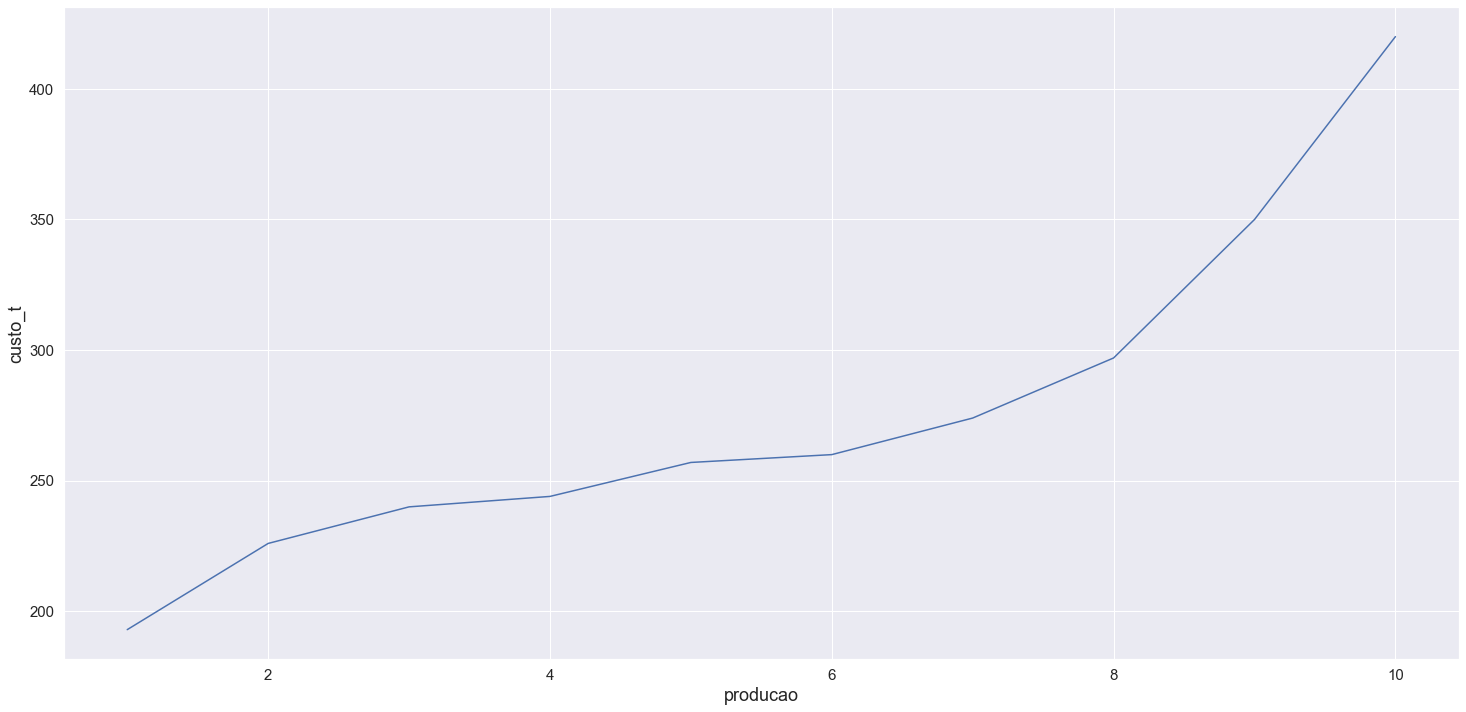

In [73]:
#Grafico 
sns.lineplot( x = 'producao', y = 'custo_t', data = data);

In [74]:
# dataset regressao polinomial
data_p = data.copy()
#data_p['producao'] = np.power(data_p['producao'], 1 )
data_p['producao_2'] = np.power(data_p['producao'], 2 )
data_p['producao_3'] = np.power(data_p['producao'], 3 )
data_p = data_p[['custo_t','producao','producao_2','producao_3']]
data_p.head(10)

custo_t  producao  producao_2  producao_3
0      193         1           1           1
1      226         2           4           8
2      240         3           9          27
3      244         4          16          64
4      257         5          25         125
5      260         6          36         216
6      274         7          49         343
7      297         8          64         512
8      350         9          81         729
9      420        10         100        1000

In [75]:
#statsmodels
print(' Regressao Polinomial  \n')
x = data_p[['producao','producao_2','producao_3']]
y = data_p[['custo_t']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao Polinomial  

                            OLS Regression Results                            
Dep. Variable:                custo_t   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1202.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.00e-08
Time:                        19:45:14   Log-Likelihood:                -23.529
No. Observations:                  10   AIC:                             55.06
Df Residuals:                       6   BIC:                             56.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.7667      

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


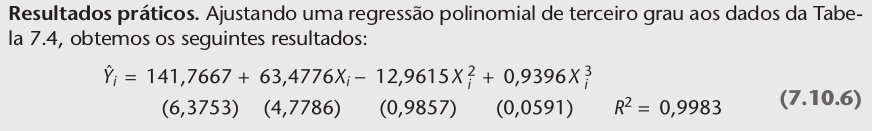

In [76]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.4_4.png')

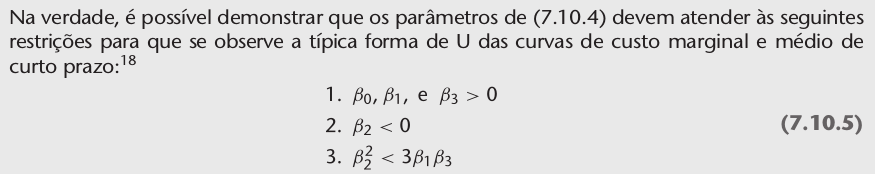

In [77]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.4_2.png')

In [78]:
#Parametros do modelo e 
model.params

const        141.7667
producao      63.4777
producao_2   -12.9615
producao_3     0.9396
dtype: float64

In [79]:
#valor predito de PNBpc
data_p['predict_custo'] = model.predict(x)
data_p['u1'] = model.resid
data_p

custo_t  producao  producao_2  producao_3  predict_custo      u1
0      193         1           1           1       193.2224 -0.2224
1      226         2           4           8       224.3925  1.6075
2      240         3           9          27       240.9147 -0.9147
3      244         4          16          64       248.4263 -4.4263
4      257         5          25         125       252.5650  4.4350
5      260         6          36         216       258.9683  1.0317
6      274         7          49         343       273.2737  0.7263
7      297         8          64         512       301.1186 -4.1186
8      350         9          81         729       348.1408  1.8592
9      420        10         100        1000       419.9776  0.0224

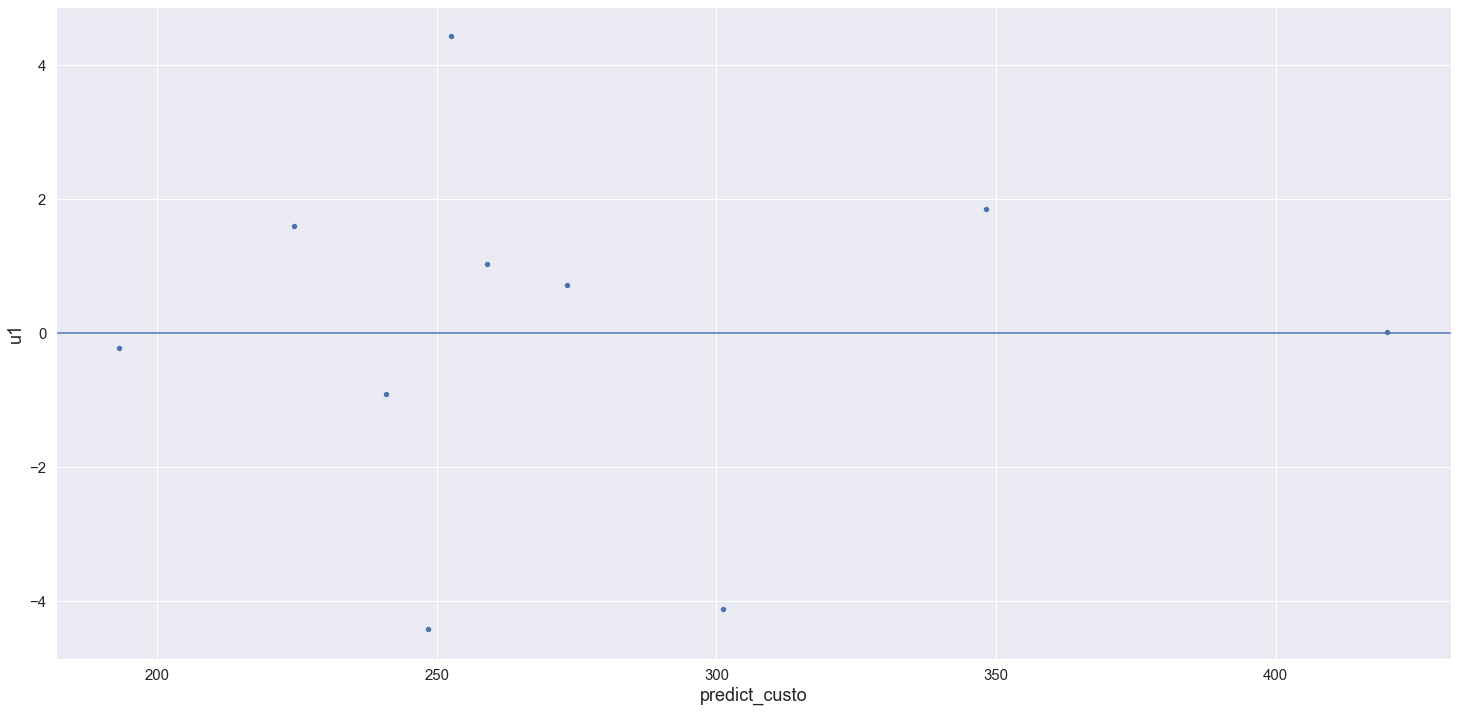

In [80]:
#dispersao do erro u2 x valor predito de PNBpc
sns.scatterplot( x = 'predict_custo', y = 'u1', data = data_p )
plt.axhline(y=0);

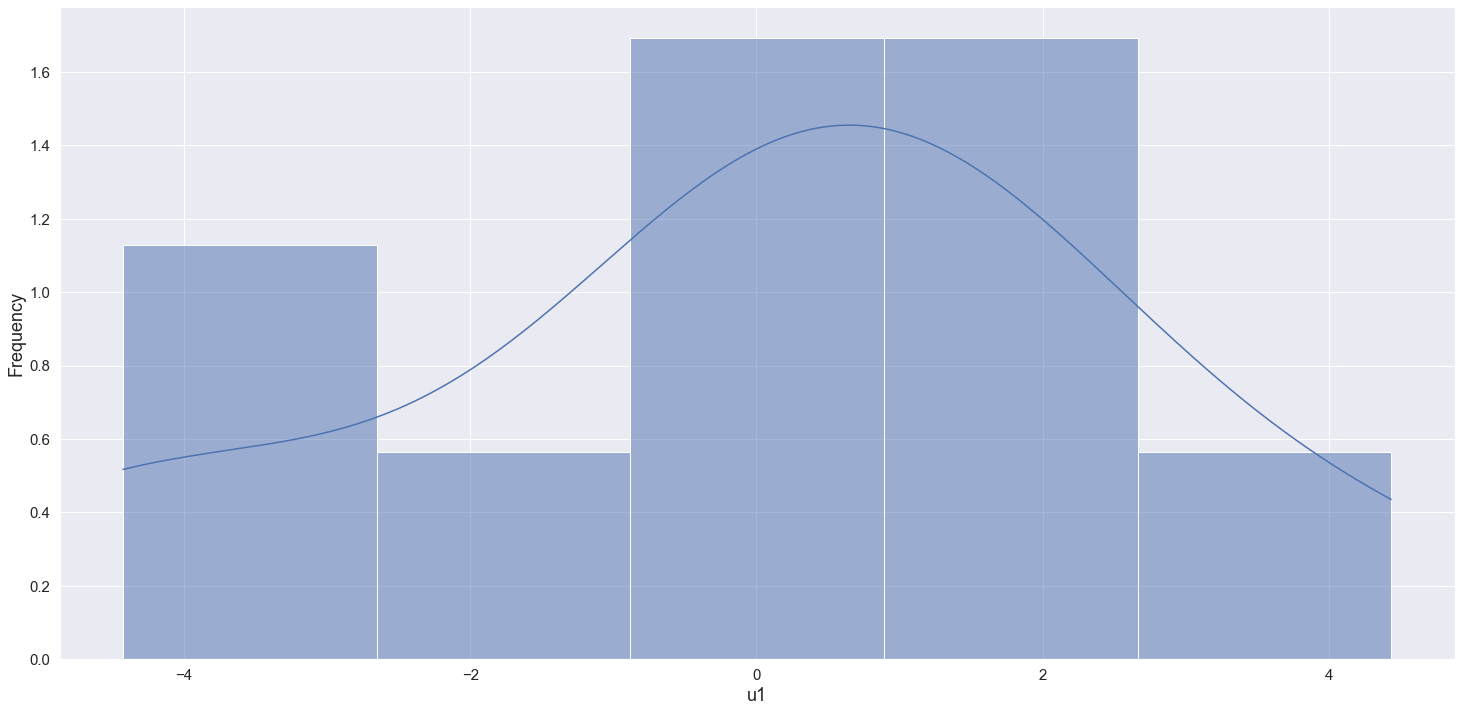

In [81]:
sns.histplot( x = 'u1',data = data_p, stat = 'frequency', kde = True);

In [82]:
#teste de normalidade Jarque Bera
#from statsmodels.stats.stattools import jarque_bera
# resultado ( jarque bera test statistic , pvalue, skewness, kurtosis)
jb = jarque_bera( data_p['u1'])
jb

(0.2824992342107096,
 0.8682725489646188,
 -0.35251126180548176,
 2.574627923686884)

In [83]:
b2 = model.params[2]
b2 = numpy.ravel(b2)
b3 = model.params[3]
b3 = numpy.ravel(b3)
b2


array([-12.96153846])

In [84]:
b3

array([0.93958819])

In [85]:
model.params

const        141.7667
producao      63.4777
producao_2   -12.9615
producao_3     0.9396
dtype: float64

## Exemplo 8.3 Cobb-Douglas

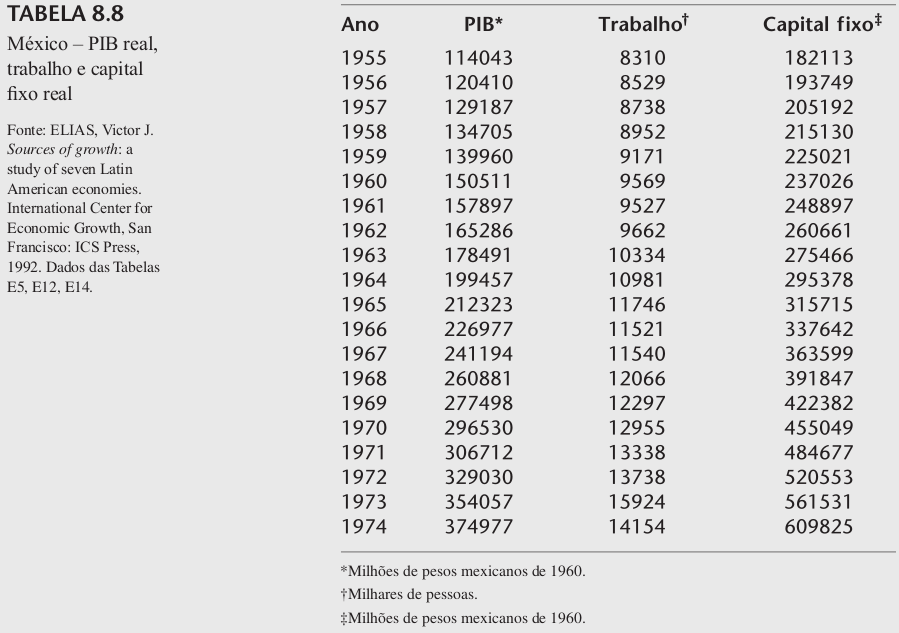

In [87]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/tabela_8.8.png')

In [88]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_8.8.xlsx')
data

ano     pib  trabalho  capital
0   1955  114043      8310   182113
1   1956  120410      8529   193749
2   1957  129187      8738   205192
3   1958  134705      8952   215130
4   1959  139960      9171   225021
5   1960  150511      9569   237026
6   1961  157897      9527   248897
7   1962  165286      9662   260661
8   1963  178491     10334   275466
9   1964  199457     10981   295378
10  1965  212323     11746   315715
11  1966  226977     11521   337642
12  1967  241194     11540   363599
13  1968  260881     12066   391847
14  1969  277498     12297   422382
15  1970  296530     12955   455049
16  1971  306712     13338   484677
17  1972  329030     13738   520553
18  1973  354057     15924   561531
19  1974  374977     14154   609825

### Modelo Log-Log Sem restrições

In [89]:
# dataset Log-Log
data_log_log = data.copy()
data_log_log['ln_pib']      = np.log( data_log_log['pib'] )
data_log_log['ln_trabalho'] = np.log( data_log_log['trabalho'])
data_log_log['ln_capital']  = np.log( data_log_log['capital'])
data_log_log

ano     pib  trabalho  capital  ln_pib  ln_trabalho  ln_capital
0   1955  114043      8310   182113 11.6443       9.0252     12.1124
1   1956  120410      8529   193749 11.6987       9.0512     12.1743
2   1957  129187      8738   205192 11.7690       9.0754     12.2317
3   1958  134705      8952   215130 11.8108       9.0996     12.2790
4   1959  139960      9171   225021 11.8491       9.1238     12.3239
5   1960  150511      9569   237026 11.9218       9.1663     12.3759
6   1961  157897      9527   248897 11.9697       9.1619     12.4248
7   1962  165286      9662   260661 12.0154       9.1760     12.4710
8   1963  178491     10334   275466 12.0923       9.2432     12.5262
9   1964  199457     10981   295378 12.2034       9.3039     12.5960
10  1965  212323     11746   315715 12.2659       9.3713     12.6626
11  1966  226977     11521   337642 12.3326       9.3519     12.7297
12  1967  241194     11540   363599 12.3934       9.3536     12.8038
13  1968  260881     12066   391847 12.4718       9.3981     12.8786
14  1969  277498     12297   422382 12.5336       9.4171     12.9537
15  1970  296530     12955   455049 12.5999       9.4692     13.0282
16  1971  306712     13338   484677 12.6337       9.4984     13.0912
17  1972  329030     13738   520553 12.7039       9.5279     13.1626
18  1973  354057     15924   561531 12.7772       9.6756     13.2384
19  1974  374977     14154   609825 12.8346       9.5578     13.3209

In [90]:
x = data_log_log[['ln_trabalho','ln_capital']]
y = data_log_log[['ln_pib']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 ln_pib   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1719.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           2.41e-20
Time:                        19:45:15   Log-Likelihood:                 44.552
No. Observations:                  20   AIC:                            -83.10
Df Residuals:                      17   BIC:                            -80.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.6524      0.606     -2.726      

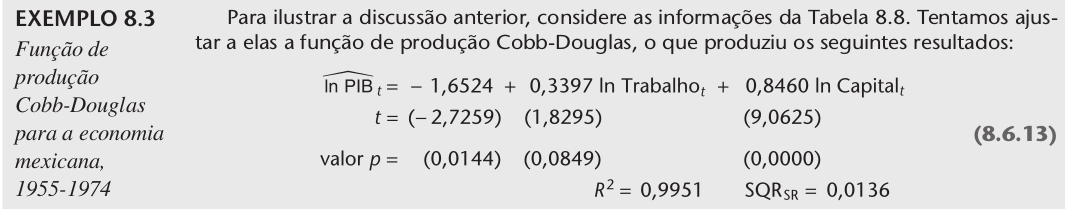

In [91]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.3_1.png')

In [92]:
#valor predito 
data_log_log['predict_ln_pib'] = model.predict(x)
data_log_log['u1_ln'] = model.resid
data_log_log['SQRsr'] = data_log_log.apply(lambda x: np.square( x['u1_ln'] ), axis = 1 )
data_log_log

ano     pib  trabalho  capital  ln_pib  ln_trabalho  ln_capital  predict_ln_pib   u1_ln  SQRsr
0   1955  114043      8310   182113 11.6443       9.0252     12.1124         11.6608 -0.0164 0.0003
1   1956  120410      8529   193749 11.6987       9.0512     12.1743         11.7220 -0.0234 0.0005
2   1957  129187      8738   205192 11.7690       9.0754     12.2317         11.7788 -0.0098 0.0001
3   1958  134705      8952   215130 11.8108       9.0996     12.2790         11.8270 -0.0162 0.0003
4   1959  139960      9171   225021 11.8491       9.1238     12.3239         11.8733 -0.0241 0.0006
5   1960  150511      9569   237026 11.9218       9.1663     12.3759         11.9317 -0.0099 0.0001
6   1961  157897      9527   248897 11.9697       9.1619     12.4248         11.9715 -0.0018 0.0000
7   1962  165286      9662   260661 12.0154       9.1760     12.4710         12.0154  0.0001 0.0000
8   1963  178491     10334   275466 12.0923       9.2432     12.5262         12.0849  0.0074 0.0001
9   1964  199457     10981   295378 12.2034       9.3039     12.5960         12.1646  0.0387 0.0015
10  1965  212323     11746   315715 12.2659       9.3713     12.6626         12.2438  0.0220 0.0005
11  1966  226977     11521   337642 12.3326       9.3519     12.7297         12.2941  0.0385 0.0015
12  1967  241194     11540   363599 12.3934       9.3536     12.8038         12.3573  0.0361 0.0013
13  1968  260881     12066   391847 12.4718       9.3981     12.8786         12.4357  0.0361 0.0013
14  1969  277498     12297   422382 12.5336       9.4171     12.9537         12.5056  0.0279 0.0008
15  1970  296530     12955   455049 12.5999       9.4692     13.0282         12.5864  0.0135 0.0002
16  1971  306712     13338   484677 12.6337       9.4984     13.0912         12.6496 -0.0160 0.0003
17  1972  329030     13738   520553 12.7039       9.5279     13.1626         12.7201 -0.0162 0.0003
18  1973  354057     15924   561531 12.7772       9.6756     13.2384         12.8344 -0.0571 0.0033
19  1974  374977     14154   609825 12.8346       9.5578     13.3209         12.8641 -0.0295 0.0009

In [93]:
SQRsr = data_log_log['SQRsr'].sum()
SQRsr

0.013604352521078025

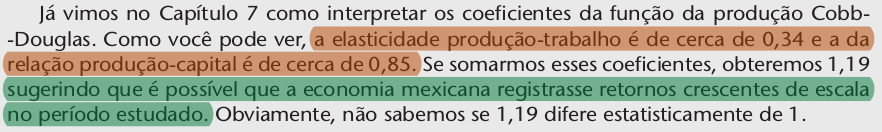

In [94]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.3_2.png')

In [95]:
model.params

const         -1.6524
ln_trabalho    0.3397
ln_capital     0.8460
dtype: float64

### Modelo log-log com restrições

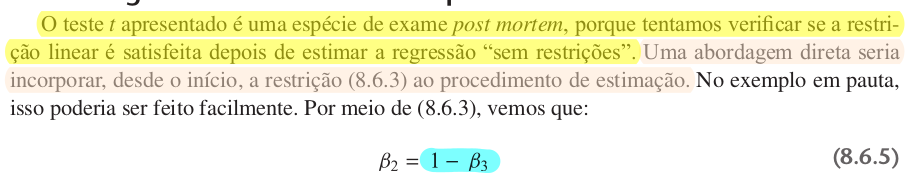

In [96]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.3_3.png')

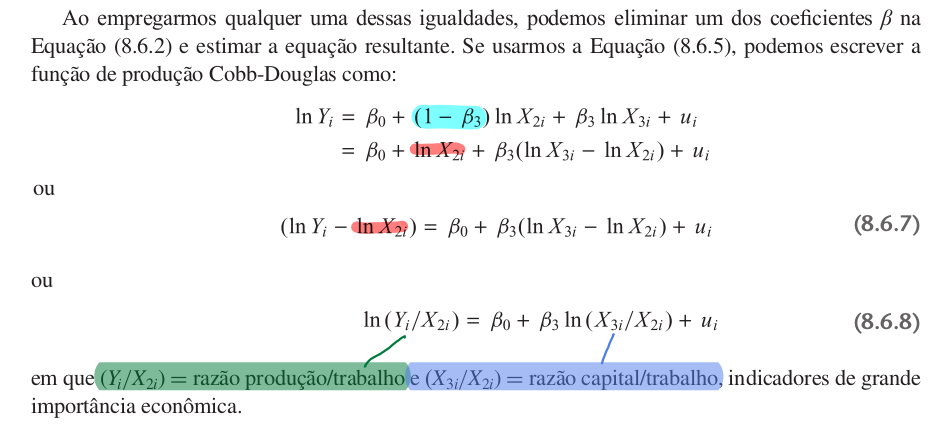

In [97]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.3_4.png')

In [98]:
# dataset Log-Log
data_log_log_r = data.copy()
data_log_log_r['ln_producao_trabalho'] = np.log( data_log_log_r.apply( lambda x: x['pib'] / x['trabalho'],     axis = 1 ) )
data_log_log_r['ln_capital_trabalho']  = np.log( data_log_log_r.apply( lambda x: x['capital'] / x['trabalho'], axis = 1 ) )

data_log_log_r

ano     pib  trabalho  capital  ln_producao_trabalho  ln_capital_trabalho
0   1955  114043      8310   182113                2.6191               3.0872
1   1956  120410      8529   193749                2.6474               3.1231
2   1957  129187      8738   205192                2.6936               3.1563
3   1958  134705      8952   215130                2.7112               3.1794
4   1959  139960      9171   225021                2.7253               3.2001
5   1960  150511      9569   237026                2.7555               3.2096
6   1961  157897      9527   248897                2.8078               3.2629
7   1962  165286      9662   260661                2.8395               3.2950
8   1963  178491     10334   275466                2.8491               3.2830
9   1964  199457     10981   295378                2.8994               3.2921
10  1965  212323     11746   315715                2.8946               3.2913
11  1966  226977     11521   337642                2.9807               3.3778
12  1967  241194     11540   363599                3.0398               3.4502
13  1968  260881     12066   391847                3.0737               3.4805
14  1969  277498     12297   422382                3.1165               3.5366
15  1970  296530     12955   455049                3.1307               3.5589
16  1971  306712     13338   484677                3.1353               3.5929
17  1972  329030     13738   520553                3.1760               3.6347
18  1973  354057     15924   561531                3.1016               3.5628
19  1974  374977     14154   609825                3.2769               3.7632

In [99]:
x = data_log_log_r[['ln_capital_trabalho']]
y = data_log_log_r[['ln_producao_trabalho']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                             OLS Regression Results                             
Dep. Variable:     ln_producao_trabalho   R-squared:                       0.978
Model:                              OLS   Adj. R-squared:                  0.976
Method:                   Least Squares   F-statistic:                     789.9
Date:                  Wed, 31 Aug 2022   Prob (F-statistic):           2.53e-16
Time:                          19:45:15   Log-Likelihood:                 42.545
No. Observations:                    20   AIC:                            -81.09
Df Residuals:                        18   BIC:                            -79.10
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

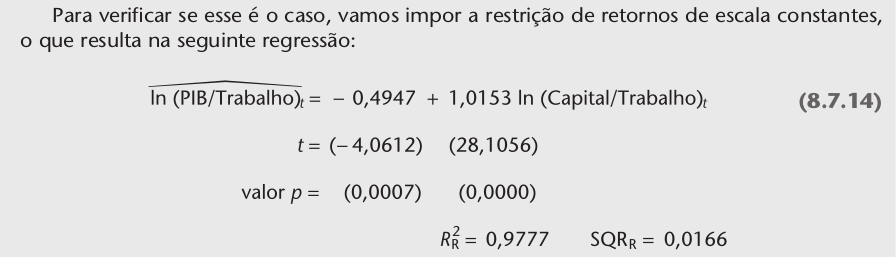

In [100]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.3_5.png')

In [101]:
#valor predito de PNBpc
data_log_log_r['predict'] = model.predict(x)
data_log_log_r['u2_ln'] = model.resid
data_log_log_r['SQRcr'] = data_log_log_r.apply(lambda x: np.square( x['u2_ln'] ), axis = 1 )
data_log_log_r

ano     pib  trabalho  capital  ln_producao_trabalho  ln_capital_trabalho  predict   u2_ln  SQRcr
0   1955  114043      8310   182113                2.6191               3.0872   2.6397 -0.0206 0.0004
1   1956  120410      8529   193749                2.6474               3.1231   2.6762 -0.0287 0.0008
2   1957  129187      8738   205192                2.6936               3.1563   2.7098 -0.0163 0.0003
3   1958  134705      8952   215130                2.7112               3.1794   2.7333 -0.0221 0.0005
4   1959  139960      9171   225021                2.7253               3.2001   2.7544 -0.0291 0.0008
5   1960  150511      9569   237026                2.7555               3.2096   2.7640 -0.0085 0.0001
6   1961  157897      9527   248897                2.8078               3.2629   2.8181 -0.0103 0.0001
7   1962  165286      9662   260661                2.8395               3.2950   2.8507 -0.0112 0.0001
8   1963  178491     10334   275466                2.8491               3.2830   2.8385  0.0106 0.0001
9   1964  199457     10981   295378                2.8994               3.2921   2.8477  0.0517 0.0027
10  1965  212323     11746   315715                2.8946               3.2913   2.8470  0.0476 0.0023
11  1966  226977     11521   337642                2.9807               3.3778   2.9348  0.0459 0.0021
12  1967  241194     11540   363599                3.0398               3.4502   3.0083  0.0315 0.0010
13  1968  260881     12066   391847                3.0737               3.4805   3.0390  0.0347 0.0012
14  1969  277498     12297   422382                3.1165               3.5366   3.0959  0.0205 0.0004
15  1970  296530     12955   455049                3.1307               3.5589   3.1187  0.0120 0.0001
16  1971  306712     13338   484677                3.1353               3.5929   3.1531 -0.0178 0.0003
17  1972  329030     13738   520553                3.1760               3.6347   3.1956 -0.0196 0.0004
18  1973  354057     15924   561531                3.1016               3.5628   3.1226 -0.0210 0.0004
19  1974  374977     14154   609825                3.2769               3.7632   3.3260 -0.0492 0.0024

In [102]:
SQRcr = data_log_log_r['SQRcr'].sum()
SQRcr

0.016628872112773852

### Calculo do valor F

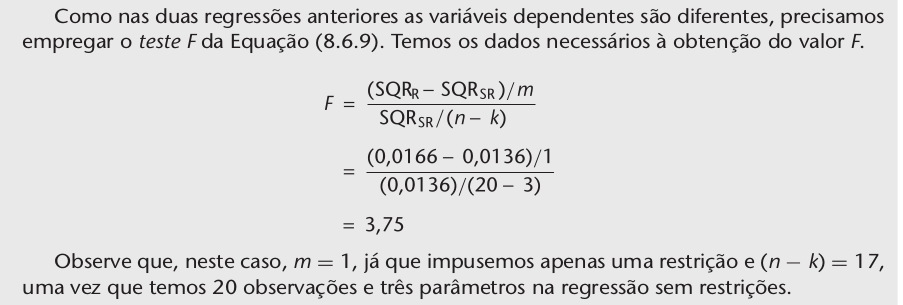

In [103]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.3_6.png')

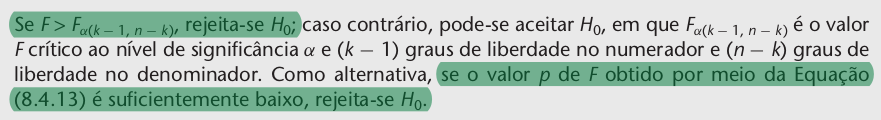

In [104]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.3_7.png')

In [105]:
p_valor = 1 - scipy.stats.f.cdf(3.75, dfn=1, dfd=17)
p_valor

0.06961176663950741

In [106]:
# Valor F de uma distribuição F com 1 grau de liberdade no numerador e 17 graus no denominador para um p-valor = 5%
p_valor = scipy.stats.f.ppf(q=1-0.05, dfn=1, dfd=17)
p_valor

4.451321772468133

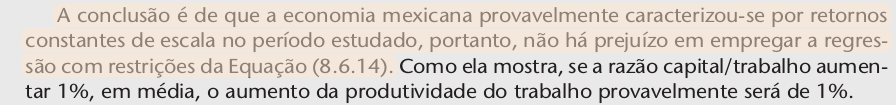

In [107]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.3_9.png')

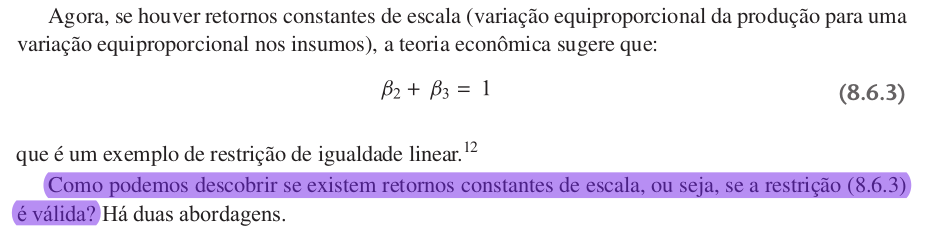

In [108]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.3_8.png')

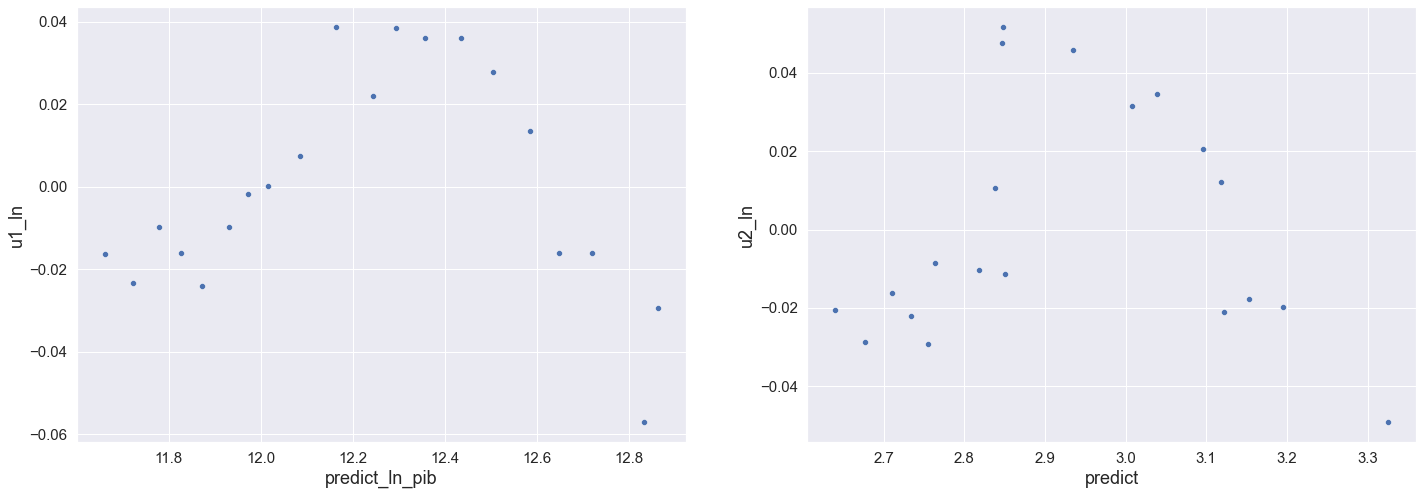

In [109]:
fig = plt.figure( figsize = (24,8))
specs = gridspec.GridSpec( nrows = 1, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )

sns.scatterplot( x = 'predict_ln_pib', y = 'u1_ln', data = data_log_log, ax = ax1);

sns.scatterplot( x = 'predict', y = 'u2_ln', data = data_log_log_r, ax = ax2);

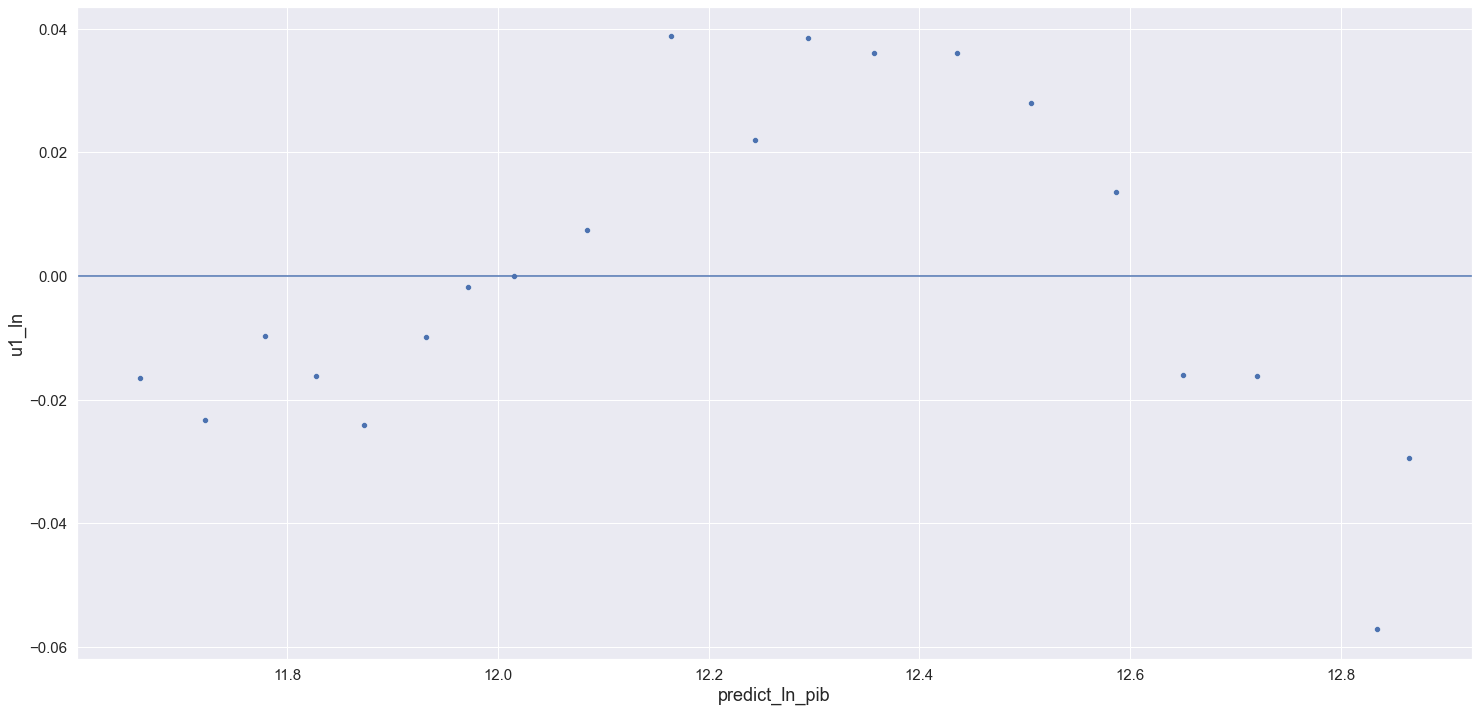

In [110]:
#dispersao do erro modelo sem restricao
sns.scatterplot( x = 'predict_ln_pib', y = 'u1_ln', data = data_log_log )
plt.axhline(y=0);

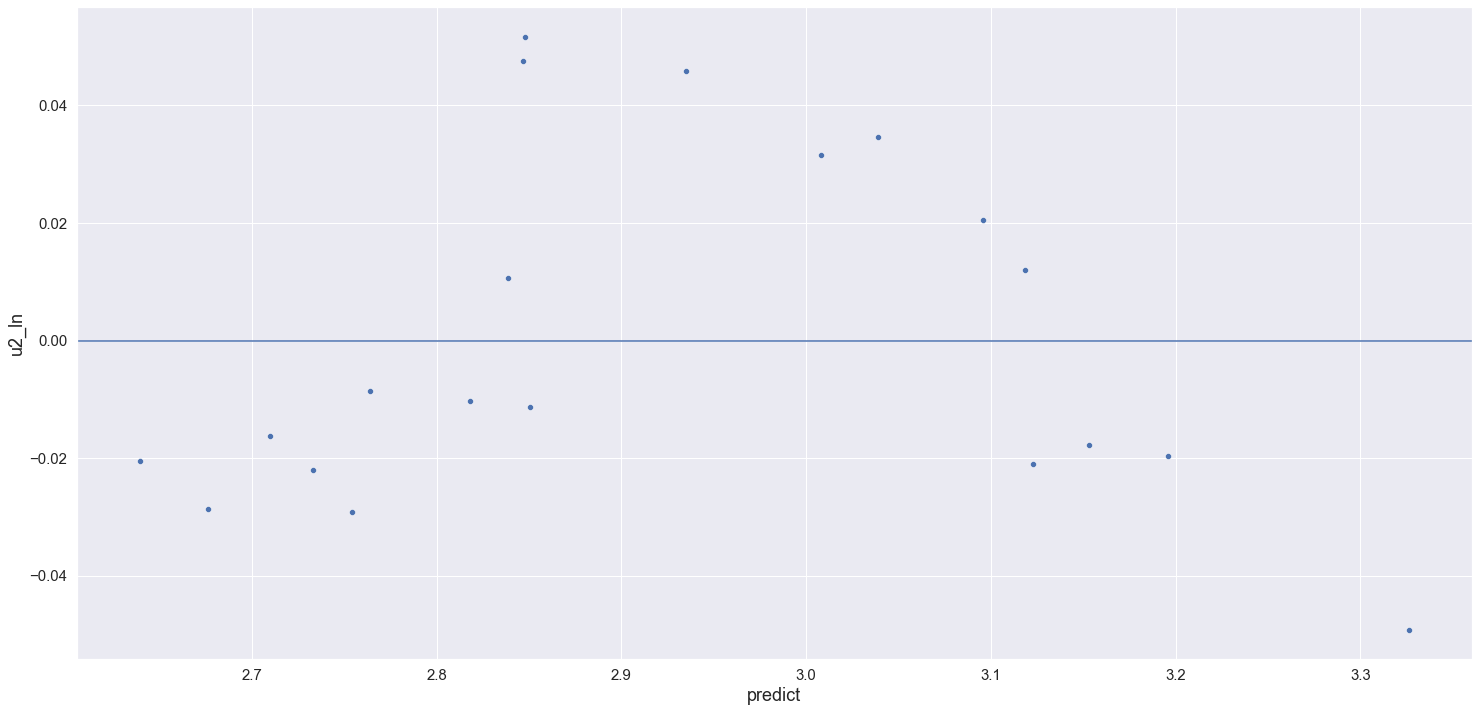

In [111]:
#dispersao do erro modelo com restricoes
sns.scatterplot( x = 'predict', y = 'u2_ln', data = data_log_log_r )
plt.axhline(y=0);

## Exemplo 8.4 

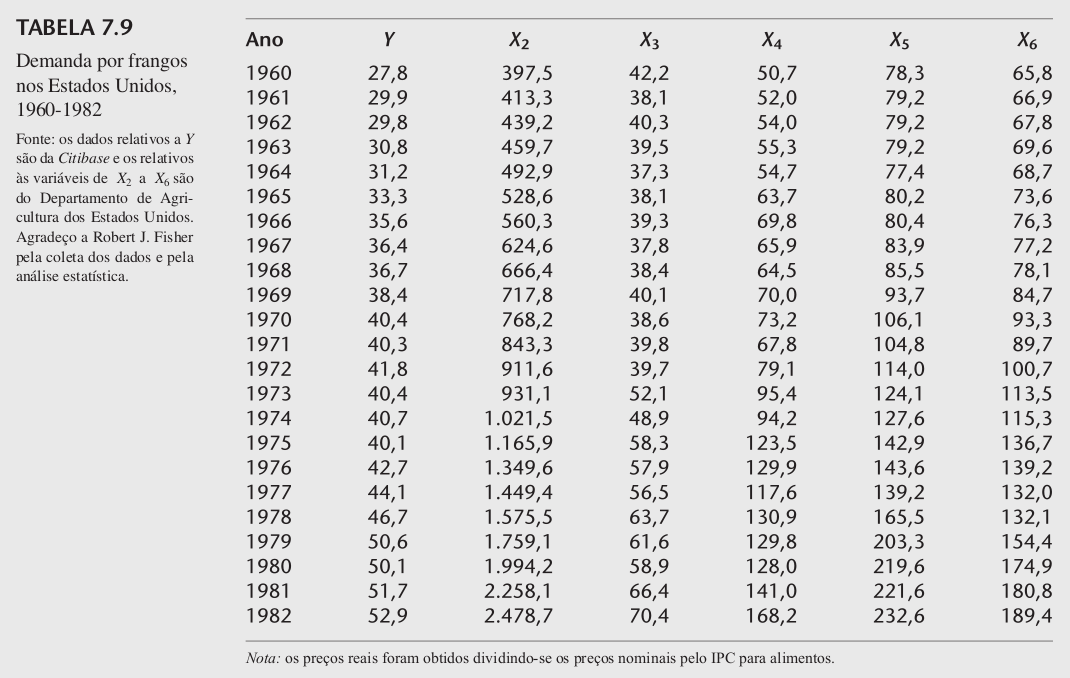

In [112]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.4_1.png')

In [113]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_7.9.xlsx')
data

ano       y        x2      x3       x4       x5       x6
0   1960 27.8000  397.5000 42.2000  50.7000  78.3000  65.8000
1   1961 29.9000  413.3000 38.1000  52.0000  79.2000  66.9000
2   1962 29.8000  439.2000 40.3000  54.0000  79.2000  67.8000
3   1963 30.8000  459.7000 39.5000  55.3000  79.2000  69.6000
4   1964 31.2000  492.9000 37.3000  54.7000  77.4000  68.7000
5   1965 33.3000  528.6000 38.1000  63.7000  80.2000  73.6000
6   1966 35.6000  560.3000 39.3000  69.8000  80.4000  76.3000
7   1967 36.4000  624.6000 37.8000  65.9000  83.9000  77.2000
8   1968 36.7000  666.4000 38.4000  64.5000  85.5000  78.1000
9   1969 38.4000  718.8000 40.1000  70.0000  93.7000  84.7000
10  1970 40.4000  768.2000 38.6000  73.2000 106.1000  93.3000
11  1971 40.3000  843.3000 39.8000  67.8000 104.8000  89.7000
12  1972 41.8000  911.6000 39.7000  79.1000 114.0000 100.7000
13  1973 40.4000  931.1000 52.1000  95.4000 124.1000 113.5000
14  1974 40.7000 1021.5000 48.9000  94.2000 127.6000 115.3000
15  1975 40.1000 1165.9000 58.3000 123.5000 142.9000 136.7000
16  1976 42.7000 1349.6000 57.9000 129.9000 143.6000 139.2000
17  1977 44.1000 1449.4000 56.5000 117.6000 139.2000 132.0000
18  1978 46.7000 1575.5000 63.7000 130.9000 165.5000 132.1000
19  1979 50.6000 1759.1000 61.6000 129.8000 203.3000 154.4000
20  1980 50.1000 1994.2000 58.9000 128.0000 219.6000 174.9000
21  1981 51.7000 2258.1000 66.4000 141.0000 221.6000 180.8000
22  1982 52.9000 2478.7000 70.4000 168.2000 232.6000 189.4000

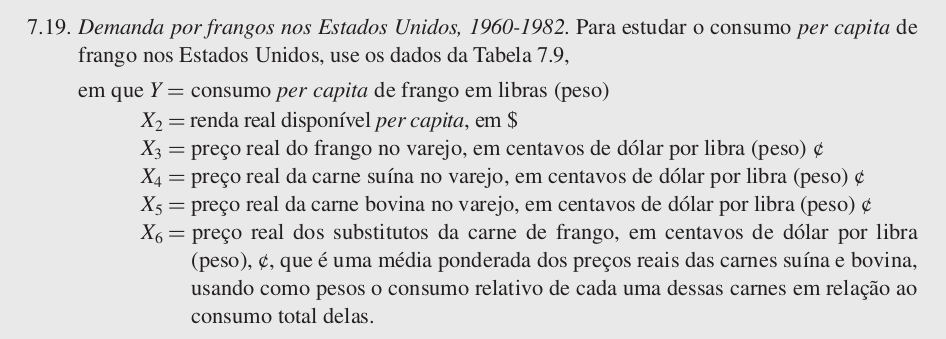

In [114]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.4_2.png')

In [115]:
data.columns = ['ano','consumo','renda','preco_frango','preco_porco','preco_boi','preco_substituto']
data.head()

ano  consumo    renda  preco_frango  preco_porco  preco_boi  preco_substituto
0  1960  27.8000 397.5000       42.2000      50.7000    78.3000           65.8000
1  1961  29.9000 413.3000       38.1000      52.0000    79.2000           66.9000
2  1962  29.8000 439.2000       40.3000      54.0000    79.2000           67.8000
3  1963  30.8000 459.7000       39.5000      55.3000    79.2000           69.6000
4  1964  31.2000 492.9000       37.3000      54.7000    77.4000           68.7000

In [116]:
# dataset Log-Log
data_log_log = data.copy()

data_log_log['ln_consumo']     = np.log( data_log_log['consumo'] )
data_log_log['ln_renda']       = np.log( data_log_log['renda'])
data_log_log['ln_frango']      = np.log( data_log_log['preco_frango'])
data_log_log['ln_porco']       = np.log( data_log_log['preco_porco'])
data_log_log['ln_boi']         = np.log( data_log_log['preco_boi'])
data_log_log['ln_substituto']  = np.log( data_log_log['preco_substituto'])

data_log_log

ano  consumo     renda  preco_frango  preco_porco  preco_boi  preco_substituto  ln_consumo  ln_renda  ln_frango  ln_porco  ln_boi  ln_substituto
0   1960  27.8000  397.5000       42.2000      50.7000    78.3000           65.8000      3.3250    5.9852     3.7424    3.9259  4.3605         4.1866
1   1961  29.9000  413.3000       38.1000      52.0000    79.2000           66.9000      3.3979    6.0242     3.6402    3.9512  4.3720         4.2032
2   1962  29.8000  439.2000       40.3000      54.0000    79.2000           67.8000      3.3945    6.0850     3.6964    3.9890  4.3720         4.2166
3   1963  30.8000  459.7000       39.5000      55.3000    79.2000           69.6000      3.4275    6.1306     3.6763    4.0128  4.3720         4.2428
4   1964  31.2000  492.9000       37.3000      54.7000    77.4000           68.7000      3.4404    6.2003     3.6190    4.0019  4.3490         4.2297
5   1965  33.3000  528.6000       38.1000      63.7000    80.2000           73.6000      3.5056    6.2702     3.6402    4.1542  4.3845         4.2986
6   1966  35.6000  560.3000       39.3000      69.8000    80.4000           76.3000      3.5723    6.3285     3.6712    4.2456  4.3870         4.3347
7   1967  36.4000  624.6000       37.8000      65.9000    83.9000           77.2000      3.5946    6.4371     3.6323    4.1881  4.4296         4.3464
8   1968  36.7000  666.4000       38.4000      64.5000    85.5000           78.1000      3.6028    6.5019     3.6481    4.1667  4.4485         4.3580
9   1969  38.4000  718.8000       40.1000      70.0000    93.7000           84.7000      3.6481    6.5776     3.6914    4.2485  4.5401         4.4391
10  1970  40.4000  768.2000       38.6000      73.2000   106.1000           93.3000      3.6988    6.6441     3.6533    4.2932  4.6644         4.5358
11  1971  40.3000  843.3000       39.8000      67.8000   104.8000           89.7000      3.6964    6.7373     3.6839    4.2166  4.6521         4.4965
12  1972  41.8000  911.6000       39.7000      79.1000   114.0000          100.7000      3.7329    6.8152     3.6814    4.3707  4.7362         4.6121
13  1973  40.4000  931.1000       52.1000      95.4000   124.1000          113.5000      3.6988    6.8364     3.9532    4.5581  4.8211         4.7318
14  1974  40.7000 1021.5000       48.9000      94.2000   127.6000          115.3000      3.7062    6.9290     3.8898    4.5454  4.8489         4.7475
15  1975  40.1000 1165.9000       58.3000     123.5000   142.9000          136.7000      3.6914    7.0612     4.0656    4.8162  4.9621         4.9178
16  1976  42.7000 1349.6000       57.9000     129.9000   143.6000          139.2000      3.7542    7.2076     4.0587    4.8668  4.9670         4.9359
17  1977  44.1000 1449.4000       56.5000     117.6000   139.2000          132.0000      3.7865    7.2789     4.0342    4.7673  4.9359         4.8828
18  1978  46.7000 1575.5000       63.7000     130.9000   165.5000          132.1000      3.8437    7.3623     4.1542    4.8744  5.1090         4.8836
19  1979  50.6000 1759.1000       61.6000     129.8000   203.3000          154.4000      3.9240    7.4726     4.1207    4.8660  5.3147         5.0395
20  1980  50.1000 1994.2000       58.9000     128.0000   219.6000          174.9000      3.9140    7.5980     4.0758    4.8520  5.3918         5.1642
21  1981  51.7000 2258.1000       66.4000     141.0000   221.6000          180.8000      3.9455    7.7223     4.1957    4.9488  5.4009         5.1974
22  1982  52.9000 2478.7000       70.4000     168.2000   232.6000          189.4000      3.9684    7.8155     4.2542    5.1252  5.4493         5.2439

### Modelo Log-Log sem restrição

In [117]:
x = data_log_log[['ln_renda','ln_frango','ln_porco','ln_boi']]
y = data_log_log[['ln_consumo']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             ln_consumo   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     250.3
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.64e-15
Time:                        19:45:17   Log-Likelihood:                 52.778
No. Observations:                  23   AIC:                            -95.56
Df Residuals:                      18   BIC:                            -89.88
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.156     14.068      0.0

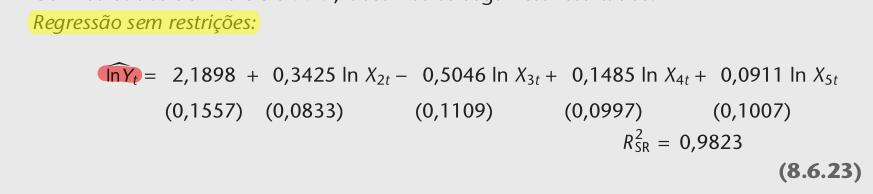

In [118]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.4_3.png')

In [119]:
Rsr = model.rsquared
Rsr

0.9823419136497915

### Modelo Log-Log com restrições

In [120]:
x = data_log_log[['ln_renda','ln_frango']]
y = data_log_log[['ln_consumo']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             ln_consumo   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     492.7
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           9.71e-18
Time:                        19:45:17   Log-Likelihood:                 51.407
No. Observations:                  23   AIC:                            -96.81
Df Residuals:                      20   BIC:                            -93.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0323      0.116     17.509      0.0

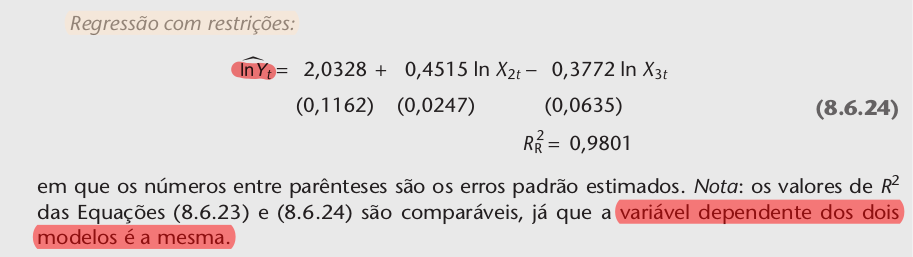

In [121]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.4_4.png')

In [122]:
Rr = model.rsquared
Rr

0.9801062334698564

### Estatística F

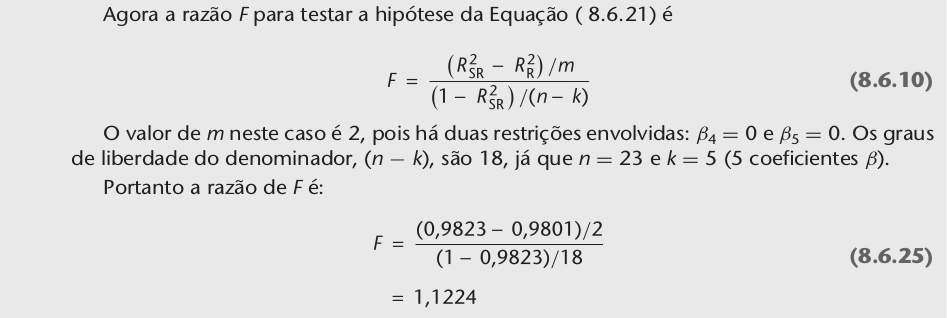

In [123]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.4_5.png')

In [124]:
print(Rsr)
print(Rr)

0.9823419136497915
0.9801062334698564


In [125]:
F = ( ( Rsr - Rr) / 2) / ( (1 - Rsr) / 18 )
F

1.139484835466256

In [126]:
p_valor = 1 - scipy.stats.f.cdf(1.1224, dfn=2, dfd=18)
p_valor

0.34724110507508965

In [127]:
# Valor F de uma distribuição F com 1 grau de liberdade no numerador e 18 graus no denominador para um p-valor = 5%
p_valor = scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=18)
p_valor

3.554557145661787

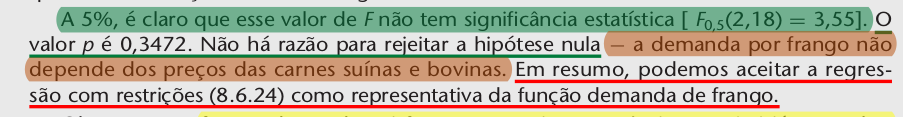

In [128]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.4_6.png')

**F calculado < F critico**

### Conclusão Econômica

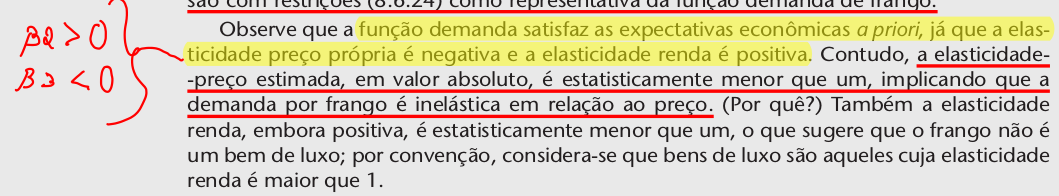

In [129]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.4_7.png')

## Seção 8.7  Teste da Estabilidade Estrutural: Teste de Chow

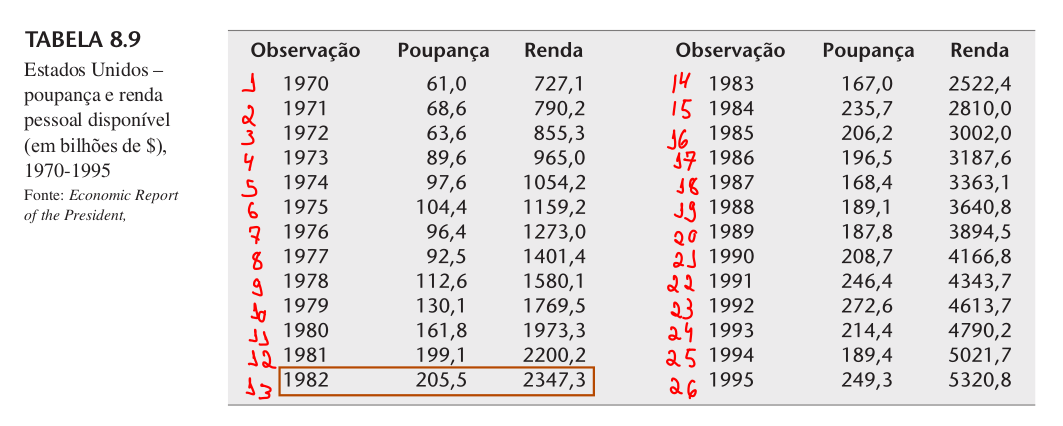

In [130]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/tabela_8.9.png')

In [131]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_8.9.xlsx')
data

ano  poupanca     renda
0   1970   61.0000  727.1000
1   1971   68.6000  790.2000
2   1972   63.6000  855.3000
3   1973   89.6000  965.0000
4   1974   97.6000 1054.2000
5   1975  104.4000 1159.2000
6   1976   96.4000 1273.0000
7   1977   92.5000 1401.4000
8   1978  112.6000 1580.1000
9   1979  130.1000 1769.5000
10  1980  161.8000 1973.3000
11  1981  199.1000 2200.2000
12  1982  205.5000 2347.3000
13  1983  167.0000 2522.4000
14  1984  235.7000 2810.0000
15  1985  206.2000 3002.0000
16  1986  196.5000 3187.6000
17  1987  168.4000 3363.1000
18  1988  189.1000 3640.8000
19  1989  187.8000 3894.5000
20  1990  208.7000 4166.8000
21  1991  246.4000 4343.7000
22  1992  272.6000 4613.7000
23  1993  214.4000 4790.2000
24  1994  189.4000 5021.7000
25  1995  249.3000 5320.8000

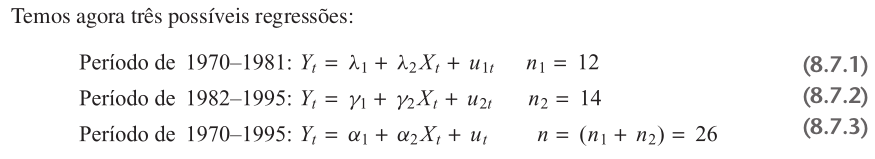

In [132]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_1.png')

### Regressão 1 ( 1970 - 1981 )

In [133]:
reg1 = data.loc[data['ano']< 1982]

In [134]:
reg1

ano  poupanca     renda
0   1970   61.0000  727.1000
1   1971   68.6000  790.2000
2   1972   63.6000  855.3000
3   1973   89.6000  965.0000
4   1974   97.6000 1054.2000
5   1975  104.4000 1159.2000
6   1976   96.4000 1273.0000
7   1977   92.5000 1401.4000
8   1978  112.6000 1580.1000
9   1979  130.1000 1769.5000
10  1980  161.8000 1973.3000
11  1981  199.1000 2200.2000

In [135]:
x1 = reg1['renda']
y1 = reg1['poupanca']
lm = pg.linear_regression(x1,y1)
lm

names   coef      se      T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept 1.0161 11.6377 0.0873 0.9321 0.9021  0.8924  -24.9143    26.9465
1      renda 0.0803  0.0084 9.6016 0.0000 0.9021  0.8924    0.0617     0.0990

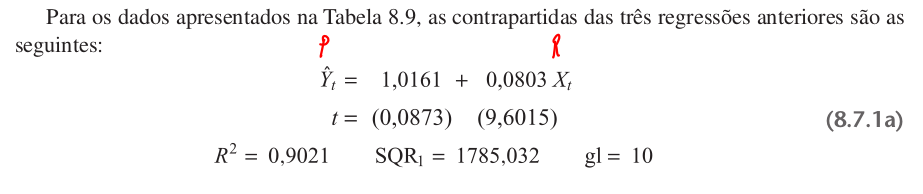

In [136]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_2.png')

In [137]:
# Graus de liberdade
gl1 = lm.df_resid_
gl1

10

In [138]:
# Residuos - desvios
r1 = lm.residuals_
r1

array([  1.57457362,   4.10563208,  -6.12397322,  11.06361969,
        11.89801611,  10.26316885,  -6.87859894, -21.09321216,
       -15.34851888, -13.0633767 ,   2.26498643,  21.33768316])

In [139]:
sqr1 = np.power(r1,2)

In [140]:
sqr1

array([  2.47928209,  16.85621475,  37.50304806, 122.40368054,
       141.56278731, 105.33263481,  47.31512343, 444.92359944,
       235.5770319 , 170.65181087,   5.13016351, 455.29672246])

In [141]:
# Soma dos quadrados dos residuos
sqr1 = np.sum(sqr1)
sqr1

1785.0320991463761

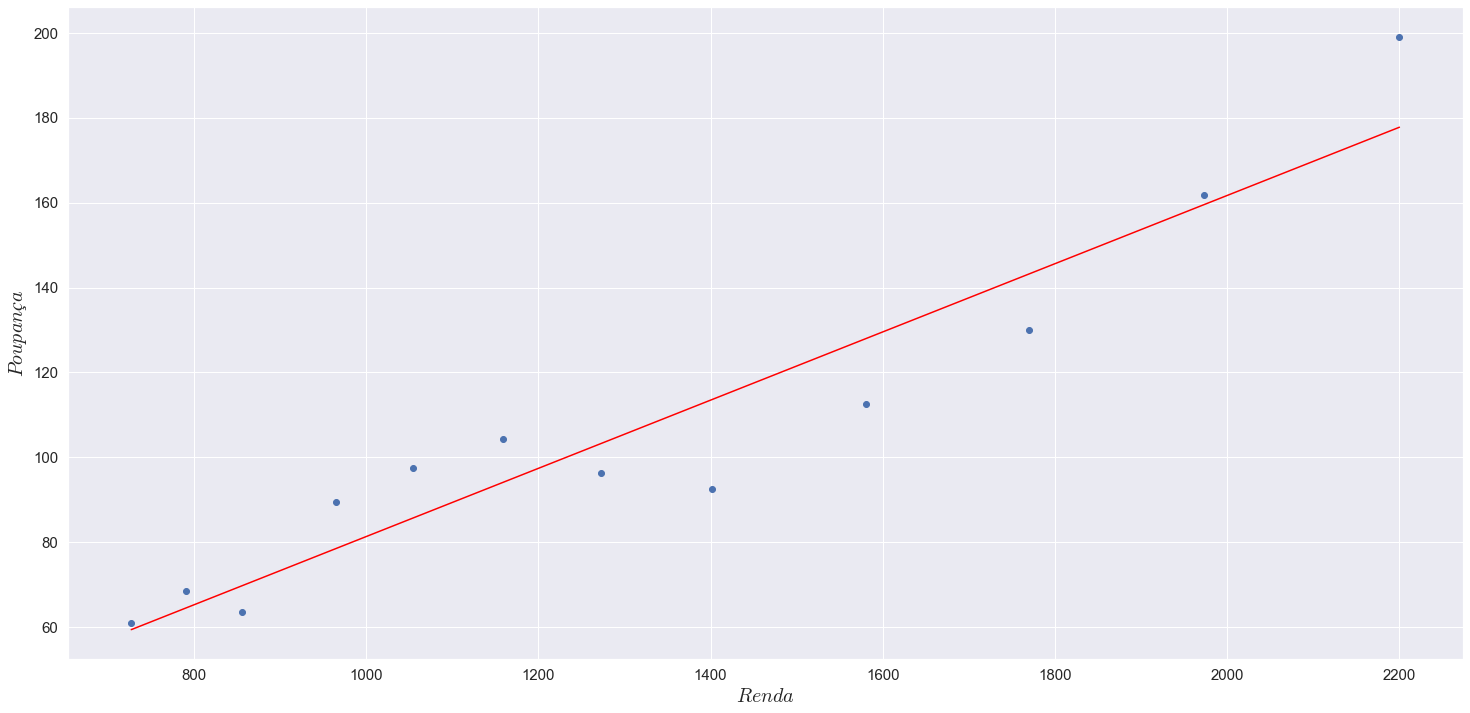

Coeficiente:     [0.08033188]
Intercepto: [1.0161174]
R2: 0.9021433143876549
R2 ajustado: 0.8923576458264204


In [142]:
#Scikit Learn
#x = data.iloc[:,3].values.reshape(-1,1)
#y = data.iloc[:,1].values.reshape(-1,1)
x = x1.values.reshape(-1,1)
y = y1.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$Renda$', fontsize = 20 )
plt.ylabel(r'$Poupança$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

### Regressão 2 ( 1982 - 1995)

In [143]:
reg2 = data.loc[data['ano']>= 1982]

In [144]:
reg2

ano  poupanca     renda
12  1982  205.5000 2347.3000
13  1983  167.0000 2522.4000
14  1984  235.7000 2810.0000
15  1985  206.2000 3002.0000
16  1986  196.5000 3187.6000
17  1987  168.4000 3363.1000
18  1988  189.1000 3640.8000
19  1989  187.8000 3894.5000
20  1990  208.7000 4166.8000
21  1991  246.4000 4343.7000
22  1992  272.6000 4613.7000
23  1993  214.4000 4790.2000
24  1994  189.4000 5021.7000
25  1995  249.3000 5320.8000

In [145]:
x2 = reg2['renda']
y2 = reg2['poupanca']
lm = pg.linear_regression(x2,y2)
lm

names     coef      se      T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept 153.4947 32.7123 4.6923 0.0005 0.2072  0.1411   82.2208   224.7686
1      renda   0.0149  0.0084 1.7708 0.1020 0.2072  0.1411   -0.0034     0.0331

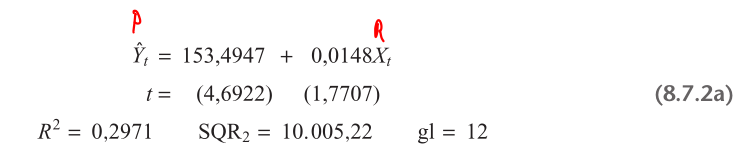

In [146]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_3.png')

In [147]:
# Graus de liberdade
gl2 = lm.df_resid_
gl2

12

In [148]:
# Residuos - desvios
r2 = lm.residuals_
r2

array([ 17.11873857, -23.98367363,  40.44189034,   8.08830301,
        -4.37016475, -35.07852192, -18.50581985, -23.57641937,
        -6.72346016,  28.34737526,  50.53451807, -10.28870153,
       -38.72935501,  16.72529097])

In [149]:
sqr2 = np.power(r2,2)

In [150]:
sqr2

array([ 293.05121027,  575.21660071, 1635.54649452,   65.42064555,
         19.09833993, 1230.50270023,  342.46536846,  555.84755024,
         45.20491647,  803.57368429, 2553.73751689,  105.85737926,
       1499.96293974,  279.73535792])

In [151]:
# Soma dos quadrados dos residuos
sqr2 = np.sum(sqr2)
sqr2

10005.220704487503

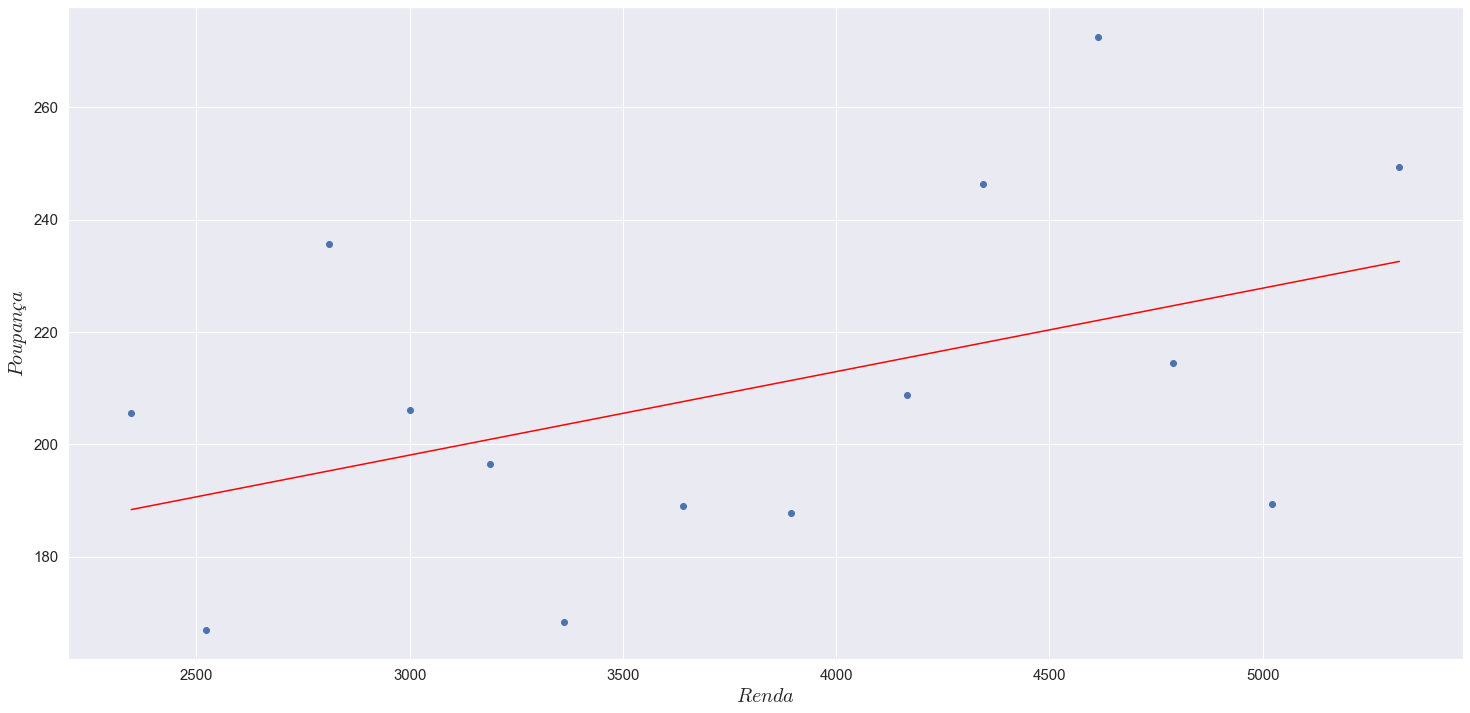

Coeficiente:     [0.01486243]
Intercepto: [153.49467002]
R2: 0.20716923570454115
R2 ajustado: 0.14110000534658618


In [152]:
#Scikit Learn
#x = data.iloc[:,3].values.reshape(-1,1)
#y = data.iloc[:,1].values.reshape(-1,1)
x = x2.values.reshape(-1,1)
y = y2.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$Renda$', fontsize = 20 )
plt.ylabel(r'$Poupança$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

### Regressão 3 ( 1970 - 1995)

In [153]:
reg3 = data.copy()

In [154]:
reg3

ano  poupanca     renda
0   1970   61.0000  727.1000
1   1971   68.6000  790.2000
2   1972   63.6000  855.3000
3   1973   89.6000  965.0000
4   1974   97.6000 1054.2000
5   1975  104.4000 1159.2000
6   1976   96.4000 1273.0000
7   1977   92.5000 1401.4000
8   1978  112.6000 1580.1000
9   1979  130.1000 1769.5000
10  1980  161.8000 1973.3000
11  1981  199.1000 2200.2000
12  1982  205.5000 2347.3000
13  1983  167.0000 2522.4000
14  1984  235.7000 2810.0000
15  1985  206.2000 3002.0000
16  1986  196.5000 3187.6000
17  1987  168.4000 3363.1000
18  1988  189.1000 3640.8000
19  1989  187.8000 3894.5000
20  1990  208.7000 4166.8000
21  1991  246.4000 4343.7000
22  1992  272.6000 4613.7000
23  1993  214.4000 4790.2000
24  1994  189.4000 5021.7000
25  1995  249.3000 5320.8000

In [155]:
x3 = reg3['renda']
y3 = reg3['poupanca']
lm = pg.linear_regression(x3,y3)
lm

names    coef      se      T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept 62.4227 12.7607 4.8918 0.0001 0.7672  0.7575   36.0858    88.7596
1      renda  0.0377  0.0042 8.8938 0.0000 0.7672  0.7575    0.0289     0.0464

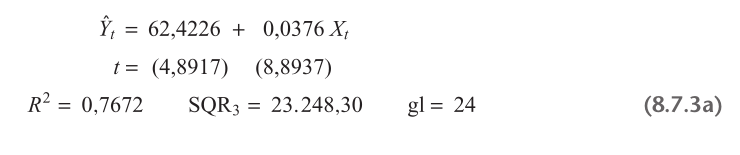

In [156]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_4.png')

In [157]:
# Graus de liberdade
gl3 = lm.df_resid_
gl3

24

In [158]:
# Residuos - desvios
r3 = lm.residuals_
r3

array([-28.81916632, -23.5967194 , -31.04963074,  -9.18303126,
        -4.54400962,  -1.70031823, -13.98820318, -22.72620343,
        -9.35946389,   1.00410896,  25.02510234,  53.77570783,
        54.63310786,   9.53549227,  67.39897459,  30.6645817 ,
        13.97133524, -20.74135201, -10.50484631, -21.36404149,
       -10.72406849,  20.31049348,  36.33712848, -28.5132379 ,
       -62.23595641, -13.60578408])

In [159]:
sqr3 = np.power(r3,2)

In [160]:
sqr3

array([8.30544347e+02, 5.56805166e+02, 9.64079569e+02, 8.43280631e+01,
       2.06480234e+01, 2.89108208e+00, 1.95669828e+02, 5.16480322e+02,
       8.75995643e+01, 1.00823480e+00, 6.26255747e+02, 2.89182675e+03,
       2.98477647e+03, 9.09256127e+01, 4.54262178e+03, 9.40316571e+02,
       1.95198208e+02, 4.30203683e+02, 1.10351796e+02, 4.56422269e+02,
       1.15005645e+02, 4.12516145e+02, 1.32038691e+03, 8.13004735e+02,
       3.87331427e+03, 1.85117360e+02])

In [161]:
# Soma dos quadrados dos residuos
sqr3 = np.sum(sqr3)
sqr3

23248.298152397285

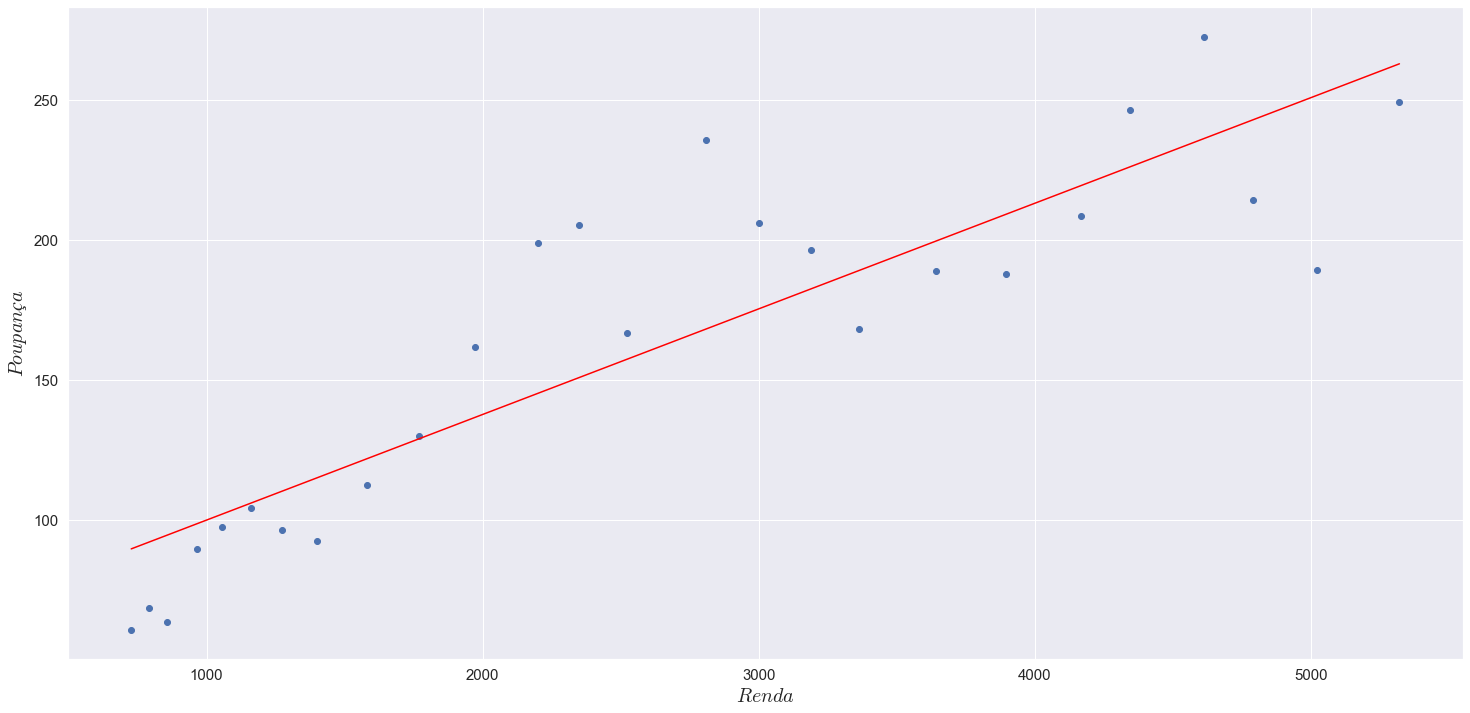

Coeficiente:     [0.03767913]
Intercepto: [62.42267117]
R2: 0.7672145989035065
R2 ajustado: 0.7575152071911526


In [162]:
#Scikit Learn
#x = data.iloc[:,3].values.reshape(-1,1)
#y = data.iloc[:,1].values.reshape(-1,1)
x = x3.values.reshape(-1,1)
y = y3.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$Renda$', fontsize = 20 )
plt.ylabel(r'$Poupança$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

### Gráficos

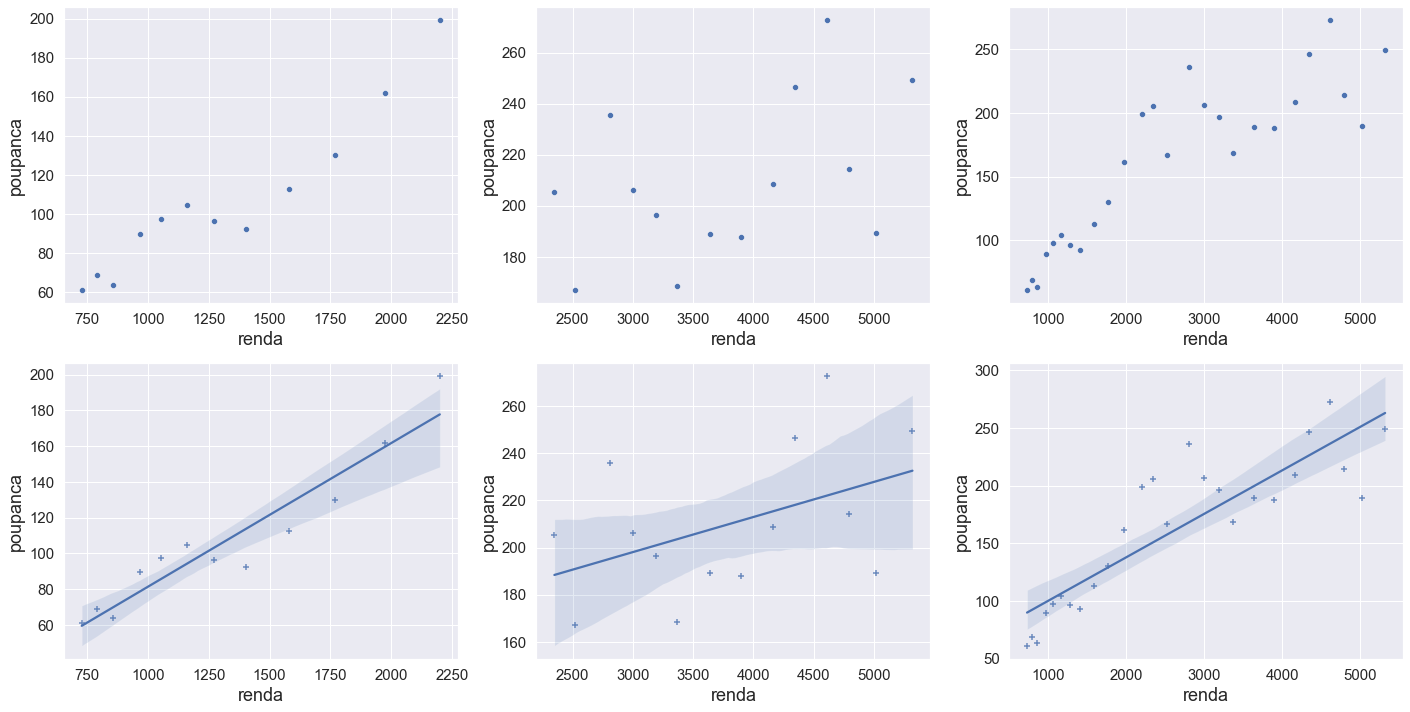

In [163]:
fig = plt.figure( figsize = (24,12))
specs = gridspec.GridSpec( nrows = 2, ncols=3, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[0,2] )
ax4 = fig.add_subplot( specs[1,0] )
ax5 = fig.add_subplot( specs[1,1] )
ax6 = fig.add_subplot( specs[1,2] )

sns.scatterplot( x = 'renda', y = 'poupanca', data = reg1, ax = ax1);

sns.regplot( x = 'renda', y = 'poupanca', data = reg1, fit_reg = True, marker = '+', ax = ax4);

sns.scatterplot( x = 'renda', y = 'poupanca', data = reg2, ax = ax2);

sns.regplot( x = 'renda', y = 'poupanca', data = reg2, fit_reg = True, marker = '+', ax = ax5);

sns.scatterplot( x = 'renda', y = 'poupanca', data = reg3, ax = ax3);

sns.regplot( x = 'renda', y = 'poupanca', data = reg3, fit_reg = True, marker = '+', ax = ax6);

### Teste Chow

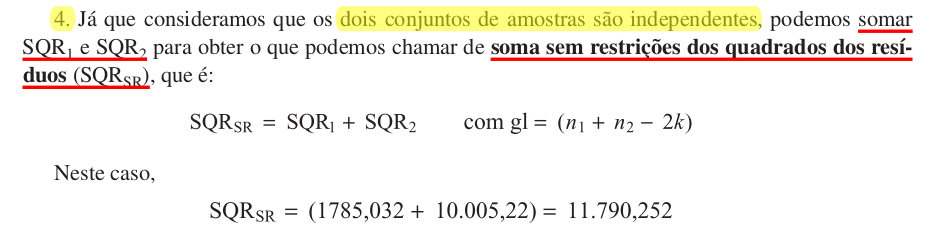

In [164]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_5.png')

In [165]:
# Soma dos quadrados dos residuos sem restrição
SQRsr = sqr1 + sqr2
SQRsr

11790.252803633879

In [166]:
# Soma dos quadrados dos residuos com restrição
SQRr = sqr3
SQRr

23248.298152397285

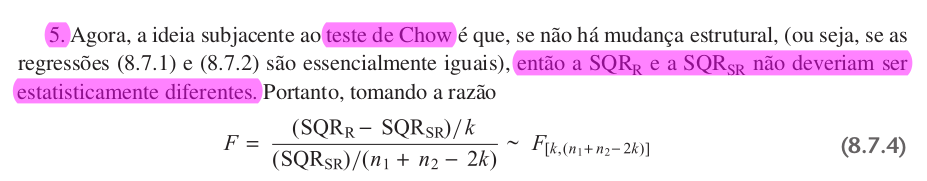

In [167]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_6.png')

In [168]:
F = ( ( SQRr - SQRsr ) / 2 ) / ( SQRsr / (reg3.shape[0] - 4) )
F

10.690059062817642

In [169]:
p_valor = 1 - scipy.stats.f.cdf(10.69005, dfn=2, dfd=22)
p_valor

0.0005707598985069673

In [170]:
# Valor F de uma distribuição F com 1 grau de liberdade no numerador e 22 graus no denominador para um p-valor = 1%
p_valor = scipy.stats.f.ppf(q=1-0.01, dfn=2, dfd=22)
p_valor

5.719021912482278

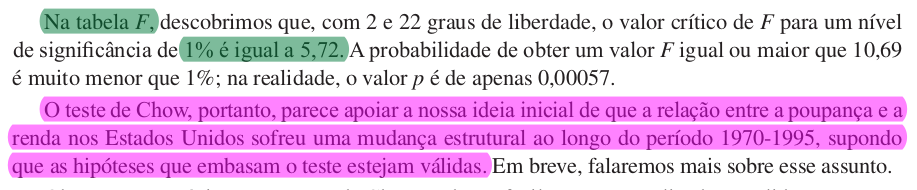

In [171]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_8.png')

### Ressalvas Teste Chow

In [172]:
# teste de Variância

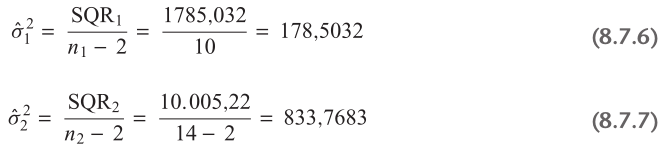

In [173]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_9.png')

In [174]:
var1 = sqr1 / gl1
var1

178.5032099146376

In [175]:
var2 = sqr2 / gl2
var2

833.7683920406253

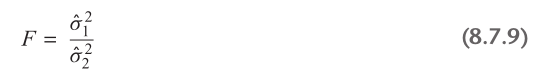

In [176]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_10.png')

In [177]:
F = var2/var1
F

4.670887388744121

## Exemplo 8.34 

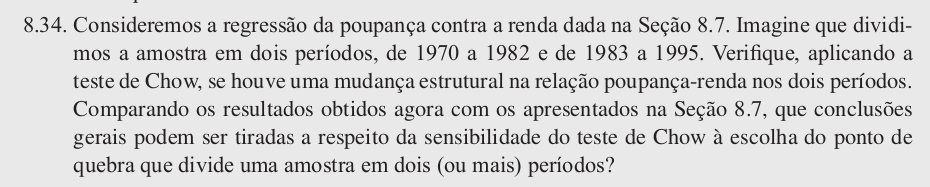

In [178]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exercicio_8.34_1.png')

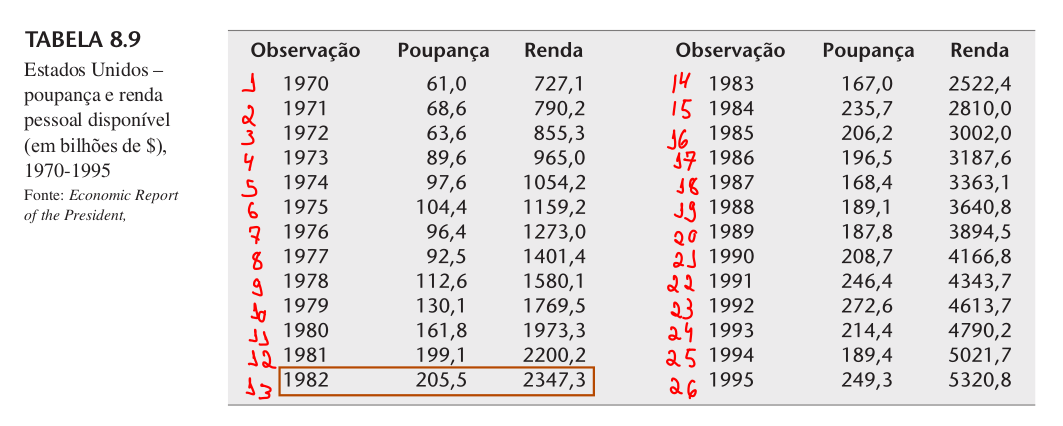

In [179]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/tabela_8.9.png')

In [180]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_8.9.xlsx')
data

ano  poupanca     renda
0   1970   61.0000  727.1000
1   1971   68.6000  790.2000
2   1972   63.6000  855.3000
3   1973   89.6000  965.0000
4   1974   97.6000 1054.2000
5   1975  104.4000 1159.2000
6   1976   96.4000 1273.0000
7   1977   92.5000 1401.4000
8   1978  112.6000 1580.1000
9   1979  130.1000 1769.5000
10  1980  161.8000 1973.3000
11  1981  199.1000 2200.2000
12  1982  205.5000 2347.3000
13  1983  167.0000 2522.4000
14  1984  235.7000 2810.0000
15  1985  206.2000 3002.0000
16  1986  196.5000 3187.6000
17  1987  168.4000 3363.1000
18  1988  189.1000 3640.8000
19  1989  187.8000 3894.5000
20  1990  208.7000 4166.8000
21  1991  246.4000 4343.7000
22  1992  272.6000 4613.7000
23  1993  214.4000 4790.2000
24  1994  189.4000 5021.7000
25  1995  249.3000 5320.8000

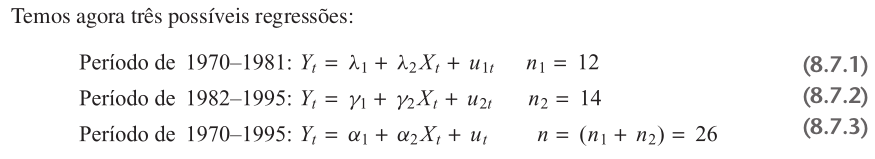

In [181]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_1.png')

### Regressão 1 ( 1970 - 1982 )

In [182]:
reg1 = data.loc[data['ano']< 1983]

In [183]:
reg1

ano  poupanca     renda
0   1970   61.0000  727.1000
1   1971   68.6000  790.2000
2   1972   63.6000  855.3000
3   1973   89.6000  965.0000
4   1974   97.6000 1054.2000
5   1975  104.4000 1159.2000
6   1976   96.4000 1273.0000
7   1977   92.5000 1401.4000
8   1978  112.6000 1580.1000
9   1979  130.1000 1769.5000
10  1980  161.8000 1973.3000
11  1981  199.1000 2200.2000
12  1982  205.5000 2347.3000

In [184]:
x1 = reg1['renda']
y1 = reg1['poupanca']
lm = pg.linear_regression(x1,y1)
lm

names    coef      se       T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept -3.7419 10.5312 -0.3553 0.7291 0.9284  0.9219  -26.9210    19.4372
1      renda  0.0846  0.0071 11.9460 0.0000 0.9284  0.9219    0.0690     0.1002

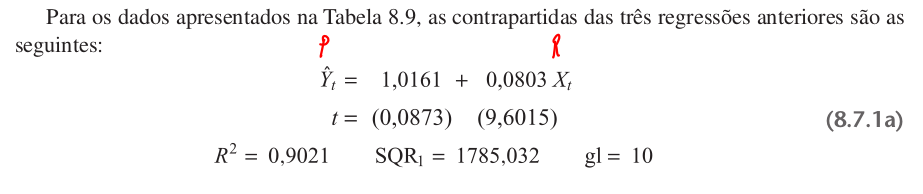

In [185]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_2.png')

In [186]:
# Graus de liberdade
gl1 = lm.df_resid_
gl1

11

In [187]:
# Residuos - desvios
r1 = lm.residuals_
r1

array([  3.20753224,   5.46739009,  -5.04201172,  11.67409614,
        12.12511547,  10.03898352,  -7.59189092, -22.35836084,
       -17.38171112, -15.91060056,  -1.45815953,  16.63933248,
        10.59028477])

In [188]:
sqr1 = np.power(r1,2)

In [189]:
sqr1

array([ 10.28826306,  29.89235435,  25.42188221, 136.28452058,
       147.01842516, 100.78119012,  57.63680768, 499.89629958,
       302.12388155, 253.14721027,   2.12622921, 276.86738534,
       112.15413144])

In [190]:
# Soma dos quadrados dos residuos
sqr1 = np.sum(sqr1)
sqr1

1953.6385805619502

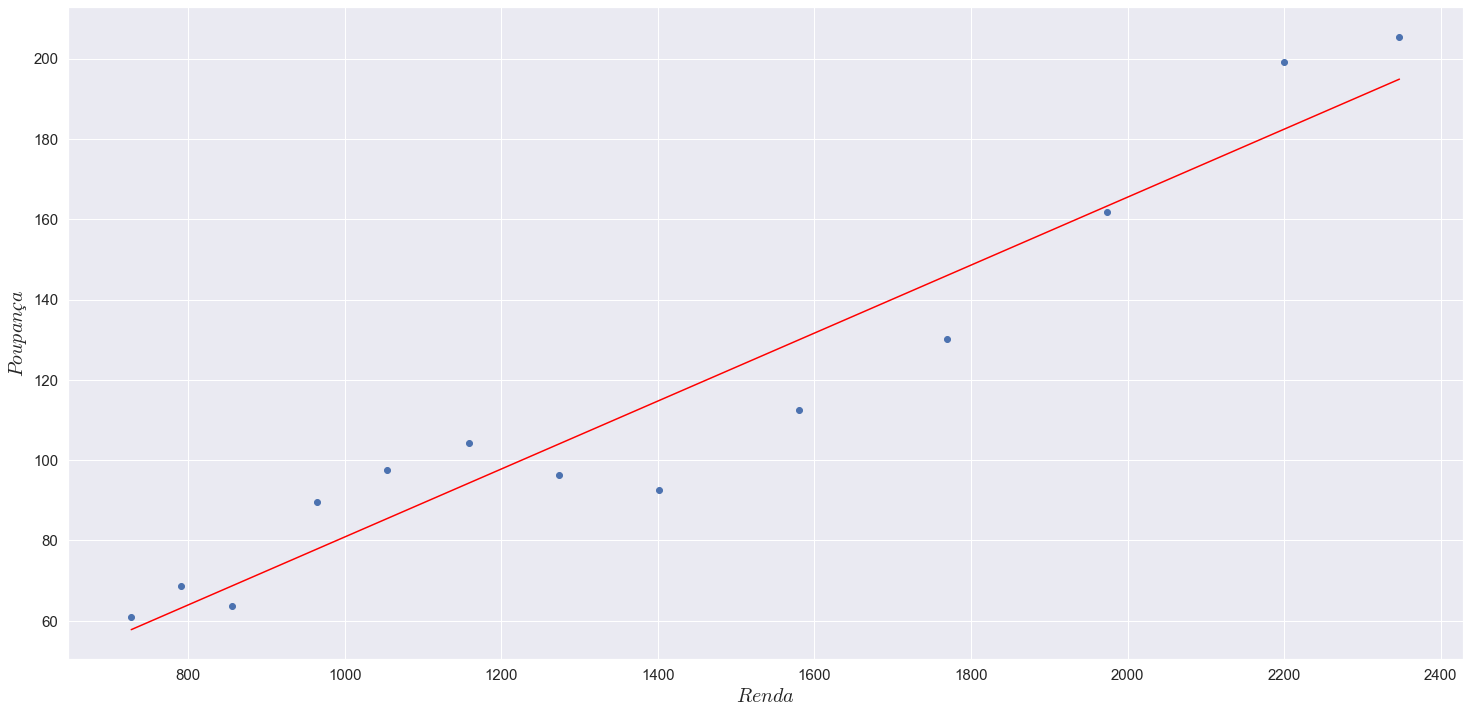

Coeficiente:     [0.08462983]
Intercepto: [-3.74188024]
R2: 0.9284356064844642
R2 ajustado: 0.9219297525285064


In [191]:
#Scikit Learn
#x = data.iloc[:,3].values.reshape(-1,1)
#y = data.iloc[:,1].values.reshape(-1,1)
x = x1.values.reshape(-1,1)
y = y1.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$Renda$', fontsize = 20 )
plt.ylabel(r'$Poupança$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

### Regressão 2 ( 1983 - 1995)

In [192]:
reg2 = data.loc[data['ano']>= 1983]

In [193]:
reg2

ano  poupanca     renda
13  1983  167.0000 2522.4000
14  1984  235.7000 2810.0000
15  1985  206.2000 3002.0000
16  1986  196.5000 3187.6000
17  1987  168.4000 3363.1000
18  1988  189.1000 3640.8000
19  1989  187.8000 3894.5000
20  1990  208.7000 4166.8000
21  1991  246.4000 4343.7000
22  1992  272.6000 4613.7000
23  1993  214.4000 4790.2000
24  1994  189.4000 5021.7000
25  1995  249.3000 5320.8000

In [194]:
x2 = reg2['renda']
y2 = reg2['poupanca']
lm = pg.linear_regression(x2,y2)
lm

names     coef      se      T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept 141.3988 38.0891 3.7123 0.0034 0.2368  0.1674   57.5652   225.2324
1      renda   0.0176  0.0095 1.8474 0.0917 0.2368  0.1674   -0.0034     0.0386

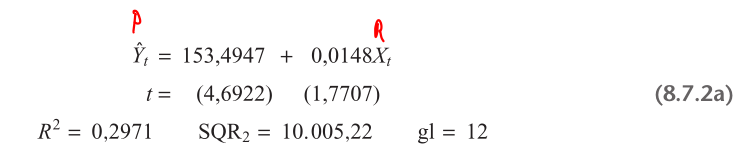

In [195]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_3.png')

In [196]:
# Graus de liberdade
gl2 = lm.df_resid_
gl2

11

In [197]:
# Residuos - desvios
r2 = lm.residuals_
r2

array([-18.86248909,  44.76783525,  11.88335081,  -1.08831749,
       -32.2819478 , -16.47711098, -22.24921361,  -6.14918816,
        28.432503  ,  49.87307175, -11.43818609, -40.5189577 ,
        14.10865013])

In [198]:
sqr2 = np.power(r2,2)

In [199]:
sqr2

array([3.55793495e+02, 2.00415907e+03, 1.41214026e+02, 1.18443496e+00,
       1.04212415e+03, 2.71495186e+02, 4.95027506e+02, 3.78125150e+01,
       8.08407227e+02, 2.48732329e+03, 1.30832101e+02, 1.64178593e+03,
       1.99054008e+02])

In [200]:
# Soma dos quadrados dos residuos
sqr2 = np.sum(sqr2)
sqr2

9616.212944892186

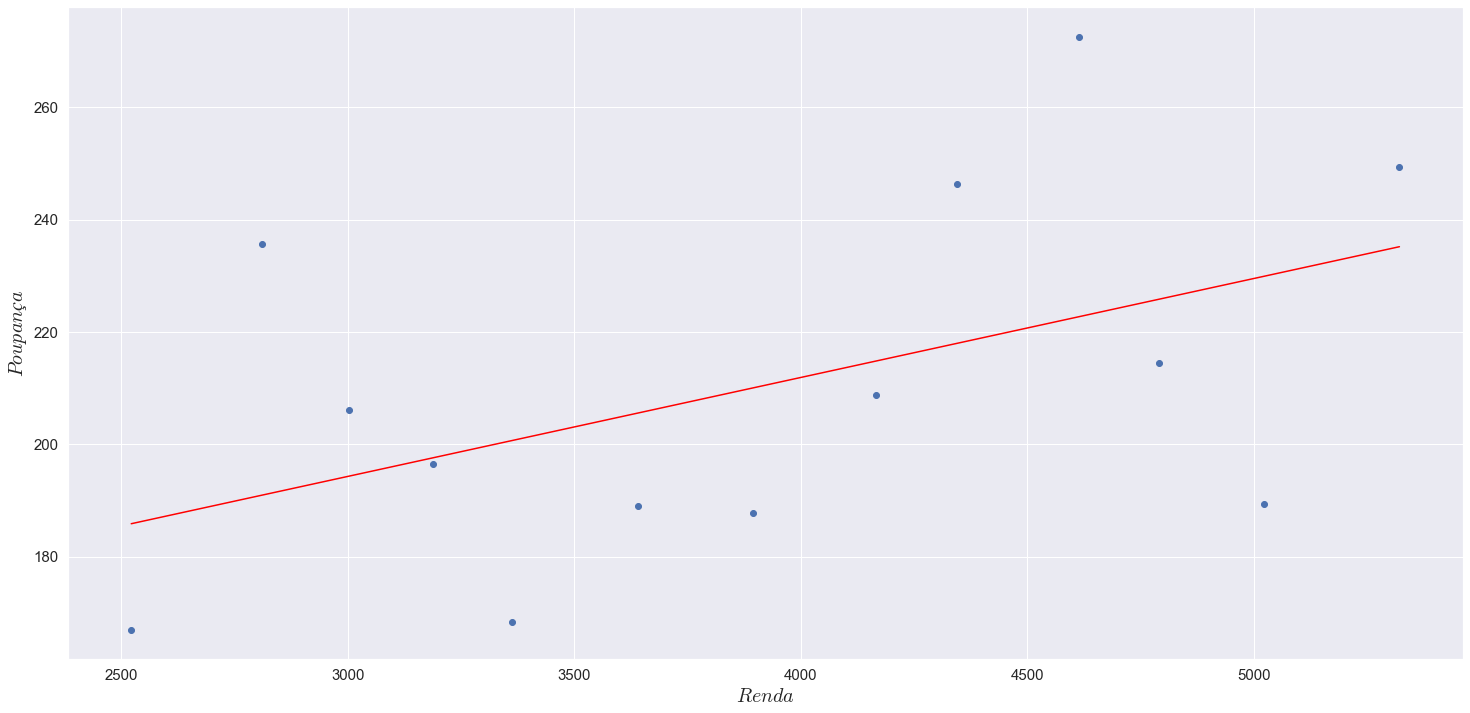

Coeficiente:     [0.01762752]
Intercepto: [141.3988247]
R2: 0.23679861861705154
R2 ajustado: 0.16741667485496525


In [201]:
#Scikit Learn
#x = data.iloc[:,3].values.reshape(-1,1)
#y = data.iloc[:,1].values.reshape(-1,1)
x = x2.values.reshape(-1,1)
y = y2.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$Renda$', fontsize = 20 )
plt.ylabel(r'$Poupança$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

### Regressão 3 ( 1970 - 1995)

In [202]:
reg3 = data.copy()

In [203]:
reg3

ano  poupanca     renda
0   1970   61.0000  727.1000
1   1971   68.6000  790.2000
2   1972   63.6000  855.3000
3   1973   89.6000  965.0000
4   1974   97.6000 1054.2000
5   1975  104.4000 1159.2000
6   1976   96.4000 1273.0000
7   1977   92.5000 1401.4000
8   1978  112.6000 1580.1000
9   1979  130.1000 1769.5000
10  1980  161.8000 1973.3000
11  1981  199.1000 2200.2000
12  1982  205.5000 2347.3000
13  1983  167.0000 2522.4000
14  1984  235.7000 2810.0000
15  1985  206.2000 3002.0000
16  1986  196.5000 3187.6000
17  1987  168.4000 3363.1000
18  1988  189.1000 3640.8000
19  1989  187.8000 3894.5000
20  1990  208.7000 4166.8000
21  1991  246.4000 4343.7000
22  1992  272.6000 4613.7000
23  1993  214.4000 4790.2000
24  1994  189.4000 5021.7000
25  1995  249.3000 5320.8000

In [204]:
x3 = reg3['renda']
y3 = reg3['poupanca']
lm = pg.linear_regression(x3,y3)
lm

names    coef      se      T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept 62.4227 12.7607 4.8918 0.0001 0.7672  0.7575   36.0858    88.7596
1      renda  0.0377  0.0042 8.8938 0.0000 0.7672  0.7575    0.0289     0.0464

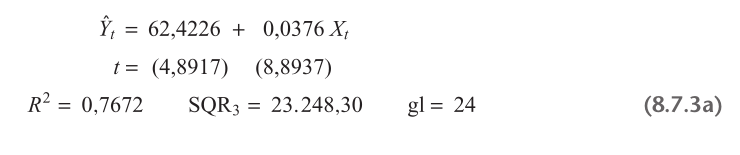

In [205]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_4.png')

In [206]:
# Graus de liberdade
gl3 = lm.df_resid_
gl3

24

In [207]:
# Residuos - desvios
r3 = lm.residuals_
r3

array([-28.81916632, -23.5967194 , -31.04963074,  -9.18303126,
        -4.54400962,  -1.70031823, -13.98820318, -22.72620343,
        -9.35946389,   1.00410896,  25.02510234,  53.77570783,
        54.63310786,   9.53549227,  67.39897459,  30.6645817 ,
        13.97133524, -20.74135201, -10.50484631, -21.36404149,
       -10.72406849,  20.31049348,  36.33712848, -28.5132379 ,
       -62.23595641, -13.60578408])

In [208]:
sqr3 = np.power(r3,2)

In [209]:
sqr3

array([8.30544347e+02, 5.56805166e+02, 9.64079569e+02, 8.43280631e+01,
       2.06480234e+01, 2.89108208e+00, 1.95669828e+02, 5.16480322e+02,
       8.75995643e+01, 1.00823480e+00, 6.26255747e+02, 2.89182675e+03,
       2.98477647e+03, 9.09256127e+01, 4.54262178e+03, 9.40316571e+02,
       1.95198208e+02, 4.30203683e+02, 1.10351796e+02, 4.56422269e+02,
       1.15005645e+02, 4.12516145e+02, 1.32038691e+03, 8.13004735e+02,
       3.87331427e+03, 1.85117360e+02])

In [210]:
# Soma dos quadrados dos residuos
sqr3 = np.sum(sqr3)
sqr3

23248.298152397285

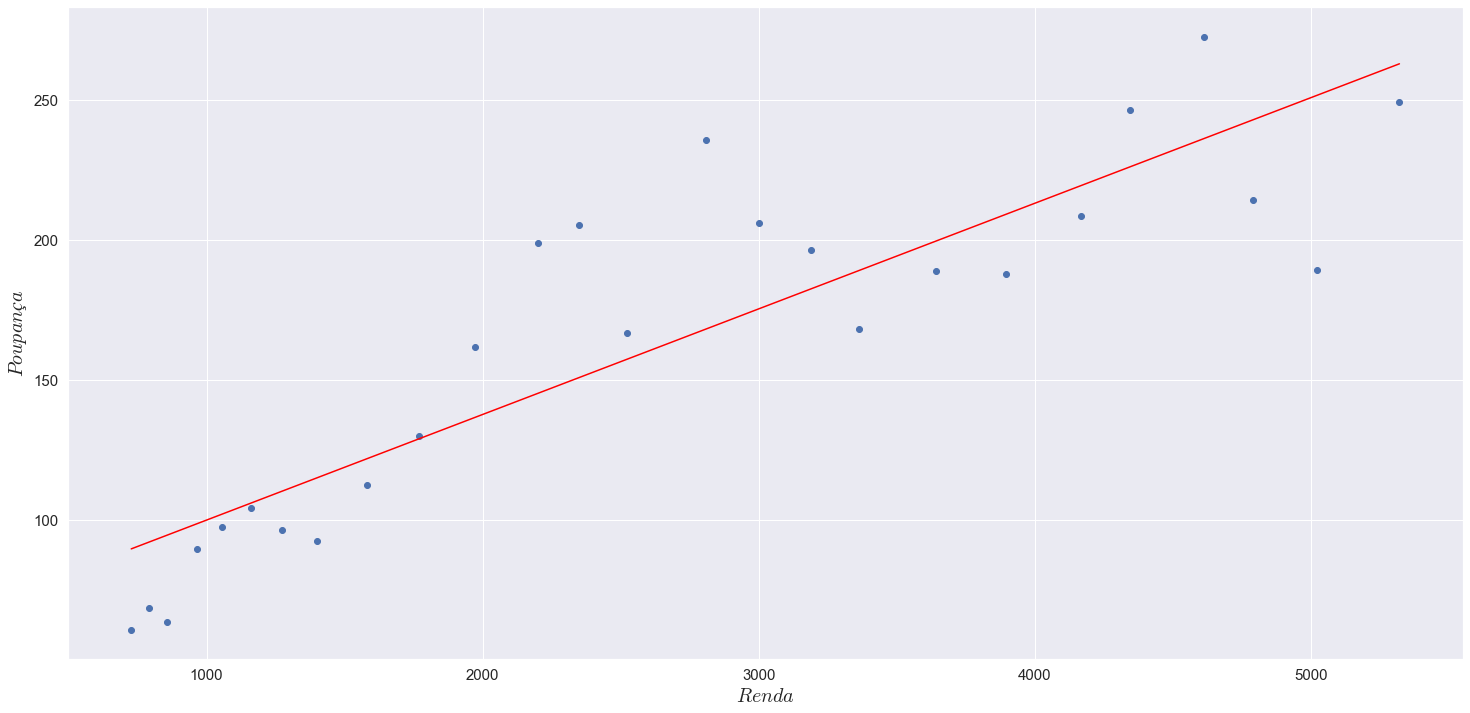

Coeficiente:     [0.03767913]
Intercepto: [62.42267117]
R2: 0.7672145989035065
R2 ajustado: 0.7575152071911526


In [211]:
#Scikit Learn
#x = data.iloc[:,3].values.reshape(-1,1)
#y = data.iloc[:,1].values.reshape(-1,1)
x = x3.values.reshape(-1,1)
y = y3.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$Renda$', fontsize = 20 )
plt.ylabel(r'$Poupança$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

### Gráficos

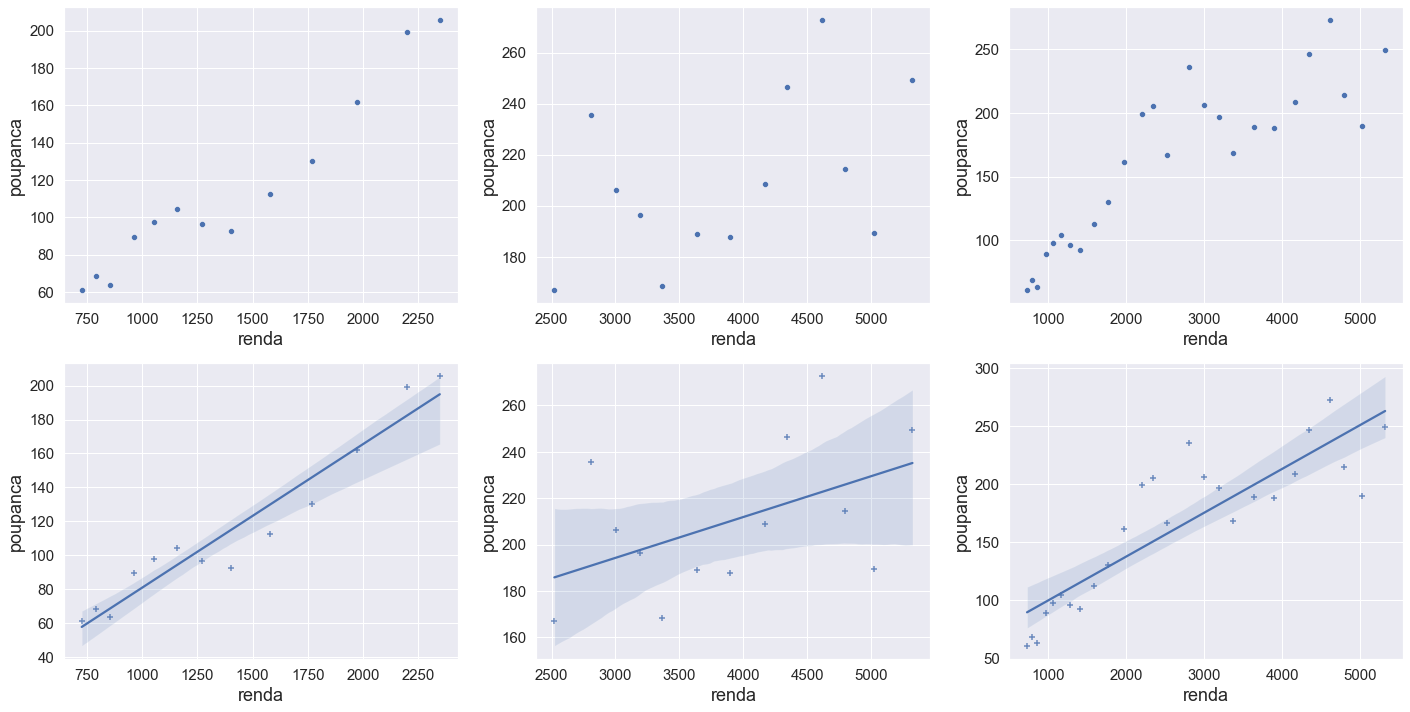

In [212]:
fig = plt.figure( figsize = (24,12))
specs = gridspec.GridSpec( nrows = 2, ncols=3, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[0,2] )
ax4 = fig.add_subplot( specs[1,0] )
ax5 = fig.add_subplot( specs[1,1] )
ax6 = fig.add_subplot( specs[1,2] )

sns.scatterplot( x = 'renda', y = 'poupanca', data = reg1, ax = ax1);

sns.regplot( x = 'renda', y = 'poupanca', data = reg1, fit_reg = True, marker = '+', ax = ax4);

sns.scatterplot( x = 'renda', y = 'poupanca', data = reg2, ax = ax2);

sns.regplot( x = 'renda', y = 'poupanca', data = reg2, fit_reg = True, marker = '+', ax = ax5);

sns.scatterplot( x = 'renda', y = 'poupanca', data = reg3, ax = ax3);

sns.regplot( x = 'renda', y = 'poupanca', data = reg3, fit_reg = True, marker = '+', ax = ax6);

### Teste Chow

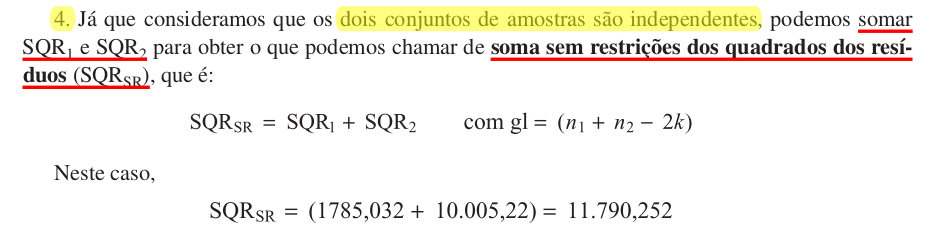

In [213]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_5.png')

In [214]:
# Soma dos quadrados dos residuos sem restrição
SQRsr = sqr1 + sqr2
SQRsr

11569.851525454136

In [215]:
# Soma dos quadrados dos residuos com restrição
SQRr = sqr3
SQRr

23248.298152397285

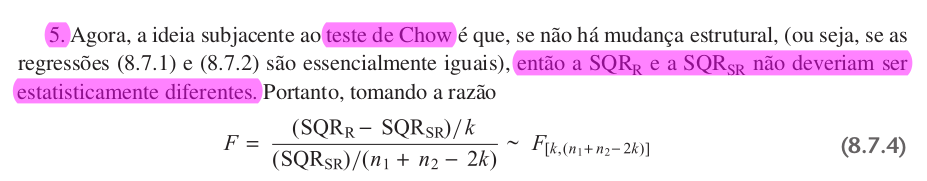

In [216]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_6.png')

In [217]:
F = ( ( SQRr - SQRsr ) / 2 ) / ( SQRsr / (reg3.shape[0] - 4) )
F

11.103246451672357

In [218]:
p_valor = 1 - scipy.stats.f.cdf(11.103246451672357, dfn=2, dfd=22)
p_valor

0.00046377016837628737

In [219]:
# Valor F de uma distribuição F com 1 grau de liberdade no numerador e 22 graus no denominador para um p-valor = 1%
p_valor = scipy.stats.f.ppf(q=1-0.01, dfn=2, dfd=22)
p_valor

5.719021912482278

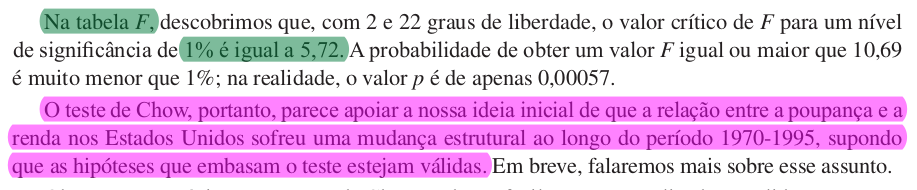

In [220]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_8.png')

### Premissas teste Chow

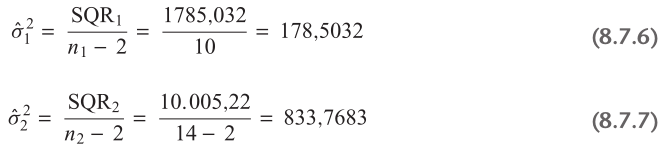

In [221]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_9.png')

In [222]:
sqr1 / gl1

177.60350732381366

In [223]:
sqr2 / gl2

874.2011768083805

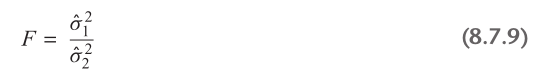

In [224]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_10.png')

In [225]:
(sqr2/gl2) / (sqr1/gl1)

4.92220671754248

In [226]:
# Valor F de uma distribuição F com 13 grau de liberdade no numerador e 22 graus no denominador para um p-valor = 1%
p_valor = scipy.stats.f.ppf(q=1-0.01, dfn=gl2, dfd=gl1)
p_valor

4.462436043152857

**F > fc**

### Corte em 1981

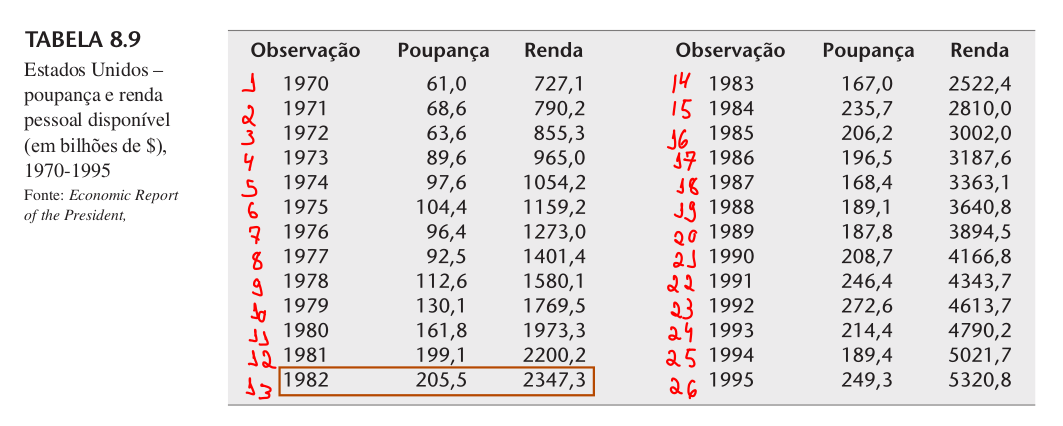

In [227]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/tabela_8.9.png')

In [228]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_8.9.xlsx')
data

ano  poupanca     renda
0   1970   61.0000  727.1000
1   1971   68.6000  790.2000
2   1972   63.6000  855.3000
3   1973   89.6000  965.0000
4   1974   97.6000 1054.2000
5   1975  104.4000 1159.2000
6   1976   96.4000 1273.0000
7   1977   92.5000 1401.4000
8   1978  112.6000 1580.1000
9   1979  130.1000 1769.5000
10  1980  161.8000 1973.3000
11  1981  199.1000 2200.2000
12  1982  205.5000 2347.3000
13  1983  167.0000 2522.4000
14  1984  235.7000 2810.0000
15  1985  206.2000 3002.0000
16  1986  196.5000 3187.6000
17  1987  168.4000 3363.1000
18  1988  189.1000 3640.8000
19  1989  187.8000 3894.5000
20  1990  208.7000 4166.8000
21  1991  246.4000 4343.7000
22  1992  272.6000 4613.7000
23  1993  214.4000 4790.2000
24  1994  189.4000 5021.7000
25  1995  249.3000 5320.8000

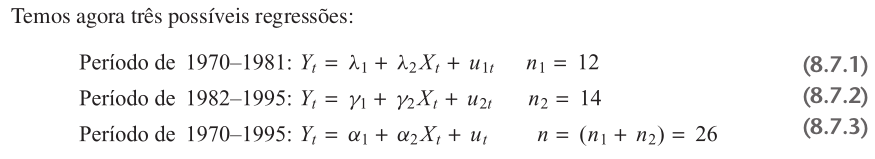

In [229]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_1.png')

### Regressão 1 ( 1970 - 1980 )

In [230]:
reg1 = data.loc[data['ano']< 1981]

In [231]:
reg1

ano  poupanca     renda
0   1970   61.0000  727.1000
1   1971   68.6000  790.2000
2   1972   63.6000  855.3000
3   1973   89.6000  965.0000
4   1974   97.6000 1054.2000
5   1975  104.4000 1159.2000
6   1976   96.4000 1273.0000
7   1977   92.5000 1401.4000
8   1978  112.6000 1580.1000
9   1979  130.1000 1769.5000
10  1980  161.8000 1973.3000

In [232]:
x1 = reg1['renda']
y1 = reg1['poupanca']
lm = pg.linear_regression(x1,y1)
lm

names    coef      se      T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept 14.1361 10.6650 1.3255 0.2177 0.8833  0.8703   -9.9898    38.2619
1      renda  0.0681  0.0083 8.2539 0.0000 0.8833  0.8703    0.0494     0.0868

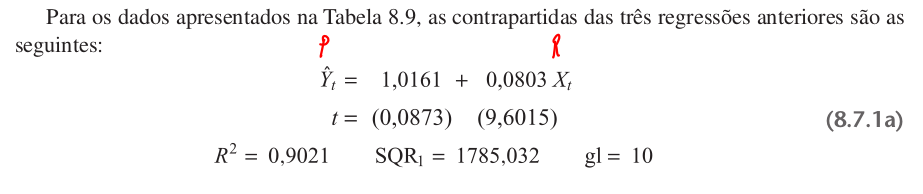

In [233]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_2.png')

In [234]:
# Graus de liberdade
gl1 = lm.df_resid_
gl1

9

In [235]:
# Residuos - desvios
r1 = lm.residuals_
r1

array([ -2.65501939,   0.64757312,  -8.7860438 ,   9.74286902,
        11.66792848,  11.31693345,  -4.43338306, -17.07802841,
        -9.1483409 ,  -4.54737384,  13.27288534])

In [236]:
sqr1 = np.power(r1,2)

In [237]:
sqr1

array([  7.04912798,   0.41935094,  77.19456562,  94.92349666,
       136.14055498, 128.07298274,  19.65488539, 291.65905443,
        83.69214124,  20.6786088 , 176.16948524])

In [238]:
# Soma dos quadrados dos residuos
sqr1 = np.sum(sqr1)
sqr1

1035.6542540418445

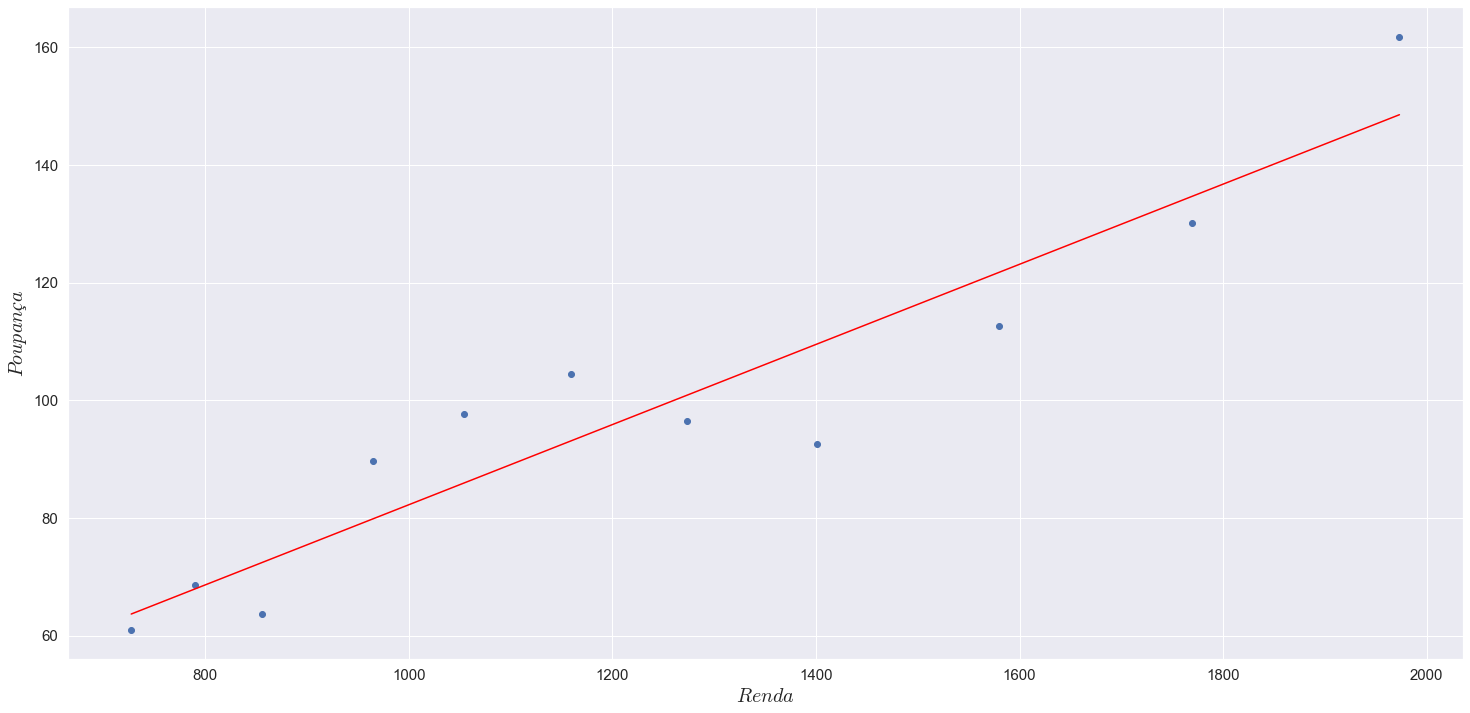

Coeficiente:     [0.06810471]
Intercepto: [14.13608145]
R2: 0.8833094077249611
R2 ajustado: 0.8703437863610679


In [239]:
#Scikit Learn
#x = data.iloc[:,3].values.reshape(-1,1)
#y = data.iloc[:,1].values.reshape(-1,1)
x = x1.values.reshape(-1,1)
y = y1.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$Renda$', fontsize = 20 )
plt.ylabel(r'$Poupança$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

### Regressão 2 ( 1981 - 1995)

In [240]:
reg2 = data.loc[data['ano']>= 1981]

In [241]:
reg2

ano  poupanca     renda
11  1981  199.1000 2200.2000
12  1982  205.5000 2347.3000
13  1983  167.0000 2522.4000
14  1984  235.7000 2810.0000
15  1985  206.2000 3002.0000
16  1986  196.5000 3187.6000
17  1987  168.4000 3363.1000
18  1988  189.1000 3640.8000
19  1989  187.8000 3894.5000
20  1990  208.7000 4166.8000
21  1991  246.4000 4343.7000
22  1992  272.6000 4613.7000
23  1993  214.4000 4790.2000
24  1994  189.4000 5021.7000
25  1995  249.3000 5320.8000

In [242]:
x2 = reg2['renda']
y2 = reg2['poupanca']
lm = pg.linear_regression(x2,y2)
lm

names     coef      se      T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept 159.3163 28.2280 5.6439 0.0001 0.2036  0.1424   98.3333   220.2993
1      renda   0.0135  0.0074 1.8231 0.0914 0.2036  0.1424   -0.0025     0.0295

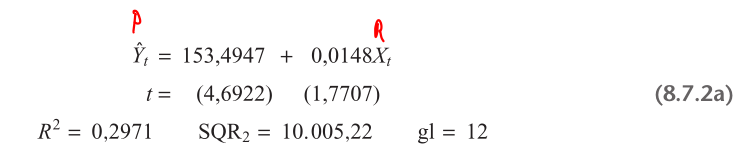

In [243]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_3.png')

In [244]:
# Graus de liberdade
gl2 = lm.df_resid_
gl2

13

In [245]:
# Residuos - desvios
r2 = lm.residuals_
r2

array([ 10.04830244,  14.4602664 , -26.40618575,  38.40694025,
         6.31208695,  -5.89627124, -36.36812933, -19.42120621,
       -24.14992643,  -6.93002306,  28.37919804,  50.93018558,
        -9.65518737, -37.78387768,  18.07382742])

In [246]:
sqr2 = np.power(r2,2)

In [247]:
sqr2

array([ 100.968382  ,  209.09930438,  697.28664578, 1475.09305917,
         39.84244165,   34.76601454, 1322.64083125,  377.18325084,
        583.21894673,   48.02521968,  805.37888118, 2593.88380369,
         93.22264315, 1427.6214122 ,  326.6632376 ])

In [248]:
# Soma dos quadrados dos residuos
sqr2 = np.sum(sqr2)
sqr2

10134.894073828873

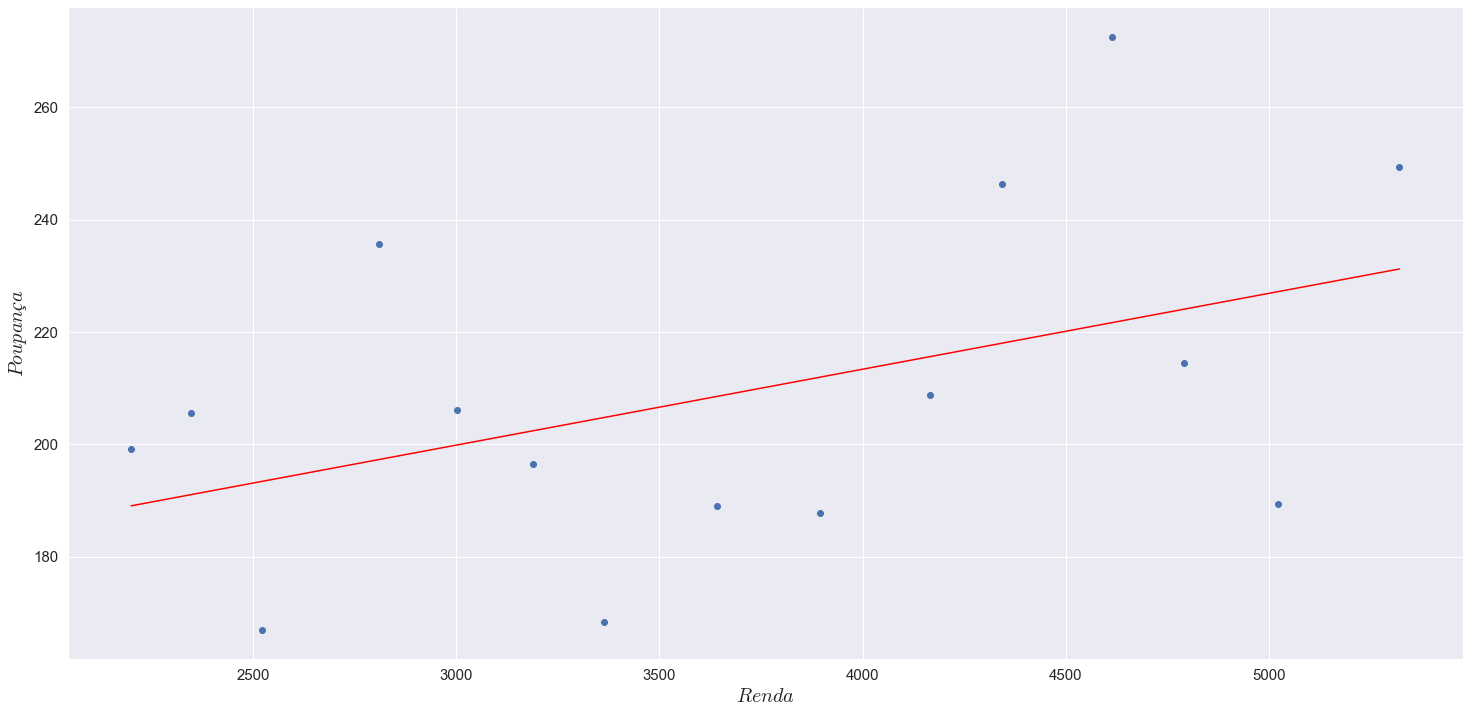

Coeficiente:     [0.01351486]
Intercepto: [159.31630053]
R2: 0.20361910322339472
R2 ajustado: 0.14235903424057894


In [249]:
#Scikit Learn
#x = data.iloc[:,3].values.reshape(-1,1)
#y = data.iloc[:,1].values.reshape(-1,1)
x = x2.values.reshape(-1,1)
y = y2.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$Renda$', fontsize = 20 )
plt.ylabel(r'$Poupança$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

### Regressão 3 ( 1970 - 1995)

In [250]:
reg3 = data.copy()

In [251]:
reg3

ano  poupanca     renda
0   1970   61.0000  727.1000
1   1971   68.6000  790.2000
2   1972   63.6000  855.3000
3   1973   89.6000  965.0000
4   1974   97.6000 1054.2000
5   1975  104.4000 1159.2000
6   1976   96.4000 1273.0000
7   1977   92.5000 1401.4000
8   1978  112.6000 1580.1000
9   1979  130.1000 1769.5000
10  1980  161.8000 1973.3000
11  1981  199.1000 2200.2000
12  1982  205.5000 2347.3000
13  1983  167.0000 2522.4000
14  1984  235.7000 2810.0000
15  1985  206.2000 3002.0000
16  1986  196.5000 3187.6000
17  1987  168.4000 3363.1000
18  1988  189.1000 3640.8000
19  1989  187.8000 3894.5000
20  1990  208.7000 4166.8000
21  1991  246.4000 4343.7000
22  1992  272.6000 4613.7000
23  1993  214.4000 4790.2000
24  1994  189.4000 5021.7000
25  1995  249.3000 5320.8000

In [252]:
x3 = reg3['renda']
y3 = reg3['poupanca']
lm = pg.linear_regression(x3,y3)
lm

names    coef      se      T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept 62.4227 12.7607 4.8918 0.0001 0.7672  0.7575   36.0858    88.7596
1      renda  0.0377  0.0042 8.8938 0.0000 0.7672  0.7575    0.0289     0.0464

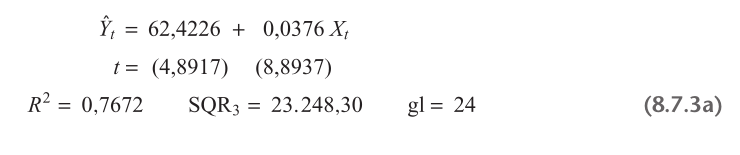

In [253]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_4.png')

In [254]:
# Graus de liberdade
gl3 = lm.df_resid_
gl3

24

In [255]:
# Residuos - desvios
r3 = lm.residuals_
r3

array([-28.81916632, -23.5967194 , -31.04963074,  -9.18303126,
        -4.54400962,  -1.70031823, -13.98820318, -22.72620343,
        -9.35946389,   1.00410896,  25.02510234,  53.77570783,
        54.63310786,   9.53549227,  67.39897459,  30.6645817 ,
        13.97133524, -20.74135201, -10.50484631, -21.36404149,
       -10.72406849,  20.31049348,  36.33712848, -28.5132379 ,
       -62.23595641, -13.60578408])

In [256]:
sqr3 = np.power(r3,2)

In [257]:
sqr3

array([8.30544347e+02, 5.56805166e+02, 9.64079569e+02, 8.43280631e+01,
       2.06480234e+01, 2.89108208e+00, 1.95669828e+02, 5.16480322e+02,
       8.75995643e+01, 1.00823480e+00, 6.26255747e+02, 2.89182675e+03,
       2.98477647e+03, 9.09256127e+01, 4.54262178e+03, 9.40316571e+02,
       1.95198208e+02, 4.30203683e+02, 1.10351796e+02, 4.56422269e+02,
       1.15005645e+02, 4.12516145e+02, 1.32038691e+03, 8.13004735e+02,
       3.87331427e+03, 1.85117360e+02])

In [258]:
# Soma dos quadrados dos residuos
sqr3 = np.sum(sqr3)
sqr3

23248.298152397285

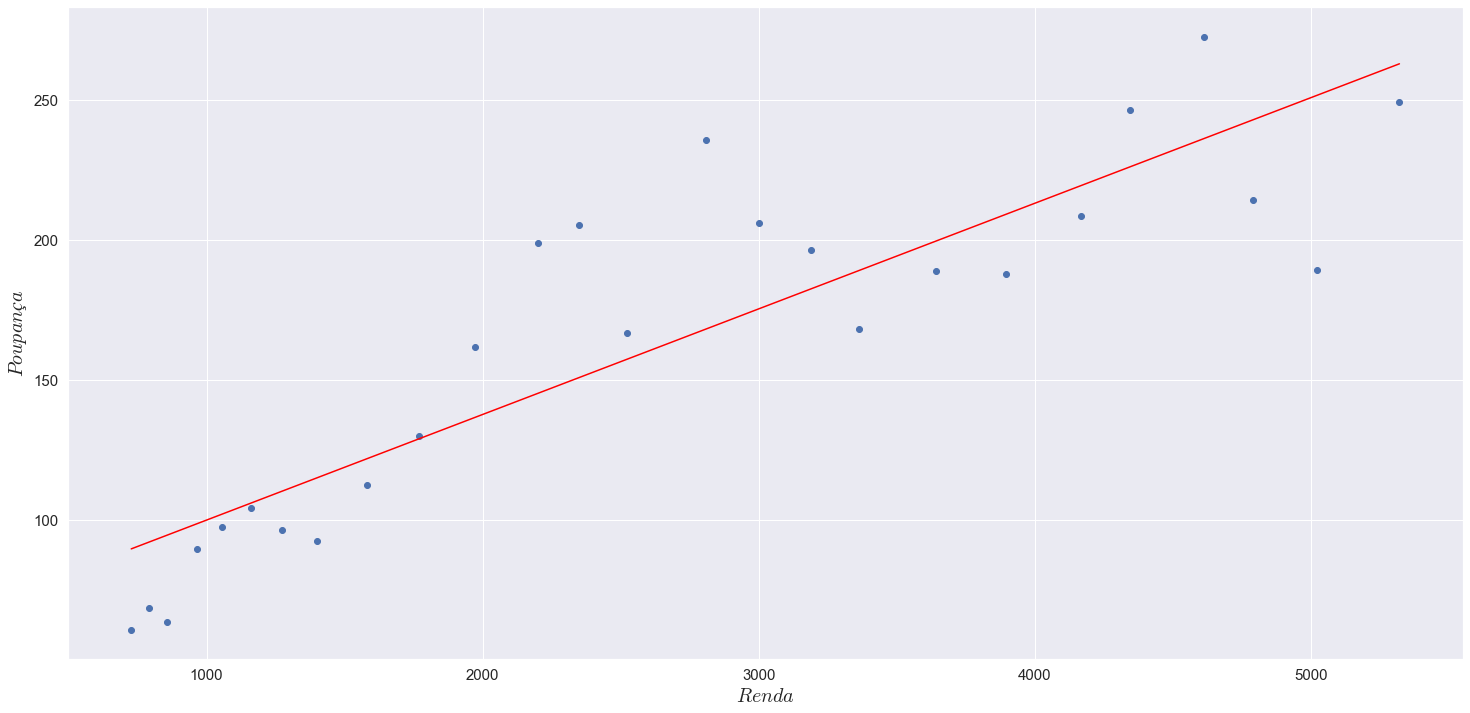

Coeficiente:     [0.03767913]
Intercepto: [62.42267117]
R2: 0.7672145989035065
R2 ajustado: 0.7575152071911526


In [259]:
#Scikit Learn
#x = data.iloc[:,3].values.reshape(-1,1)
#y = data.iloc[:,1].values.reshape(-1,1)
x = x3.values.reshape(-1,1)
y = y3.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$Renda$', fontsize = 20 )
plt.ylabel(r'$Poupança$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

### Gráficos

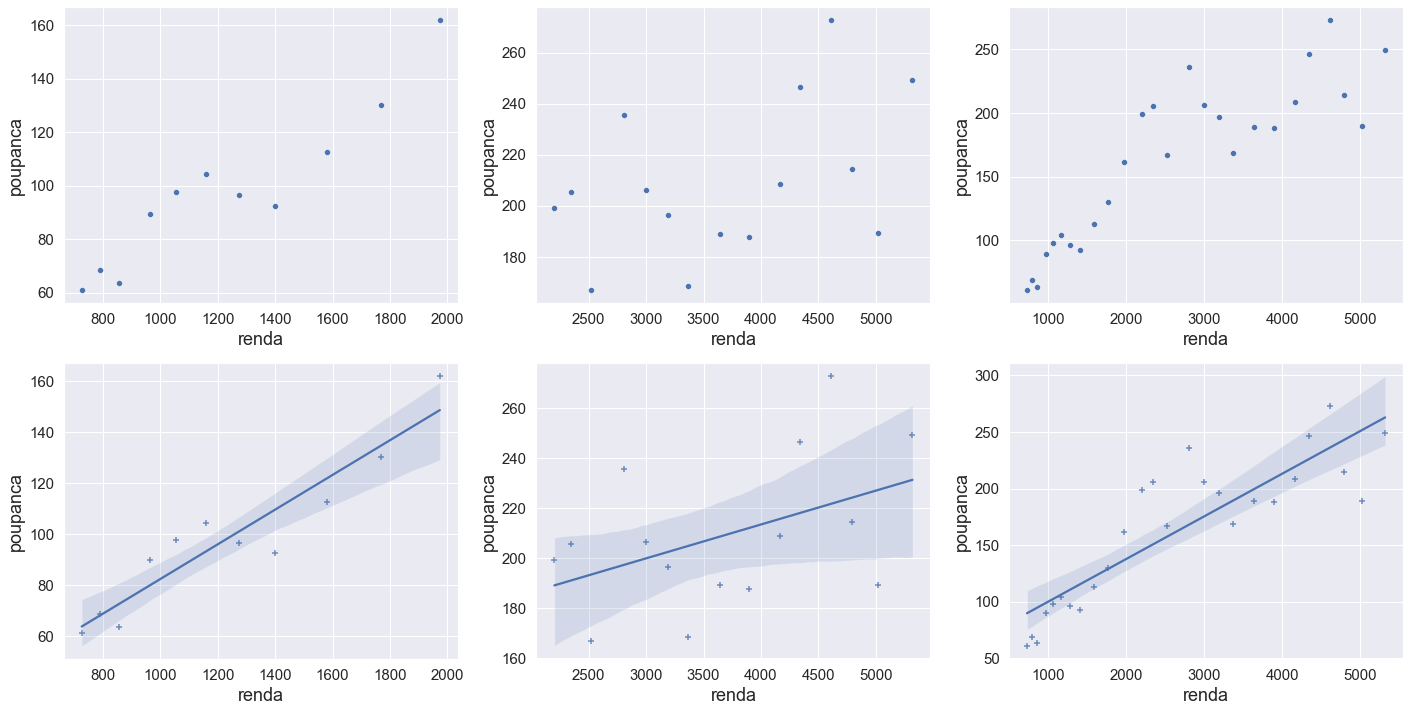

In [260]:
fig = plt.figure( figsize = (24,12))
specs = gridspec.GridSpec( nrows = 2, ncols=3, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[0,2] )
ax4 = fig.add_subplot( specs[1,0] )
ax5 = fig.add_subplot( specs[1,1] )
ax6 = fig.add_subplot( specs[1,2] )

sns.scatterplot( x = 'renda', y = 'poupanca', data = reg1, ax = ax1);

sns.regplot( x = 'renda', y = 'poupanca', data = reg1, fit_reg = True, marker = '+', ax = ax4);

sns.scatterplot( x = 'renda', y = 'poupanca', data = reg2, ax = ax2);

sns.regplot( x = 'renda', y = 'poupanca', data = reg2, fit_reg = True, marker = '+', ax = ax5);

sns.scatterplot( x = 'renda', y = 'poupanca', data = reg3, ax = ax3);

sns.regplot( x = 'renda', y = 'poupanca', data = reg3, fit_reg = True, marker = '+', ax = ax6);

### Teste Chow

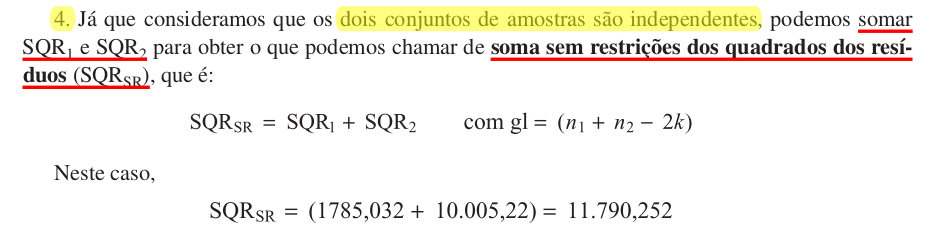

In [261]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_5.png')

In [262]:
# Soma dos quadrados dos residuos sem restrição
SQRsr = sqr1 + sqr2
SQRsr

11170.548327870718

In [263]:
# Soma dos quadrados dos residuos com restrição
SQRr = sqr3
SQRr

23248.298152397285

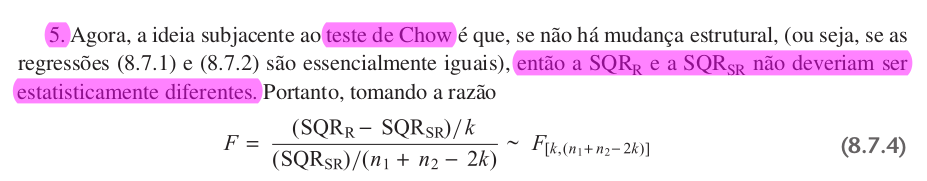

In [264]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_6.png')

In [265]:
F = ( ( SQRr - SQRsr ) / 2 ) / ( SQRsr / (reg3.shape[0] - 4) )
F

11.893350636898997

In [266]:
p_valor = 1 - scipy.stats.f.cdf(11.893350636898997, dfn=2, dfd=22)
p_valor

0.00031514946665345267

In [267]:
# Valor F de uma distribuição F com 1 grau de liberdade no numerador e 22 graus no denominador para um p-valor = 1%
p_valor = scipy.stats.f.ppf(q=1-0.01, dfn=2, dfd=22)
p_valor

5.719021912482278

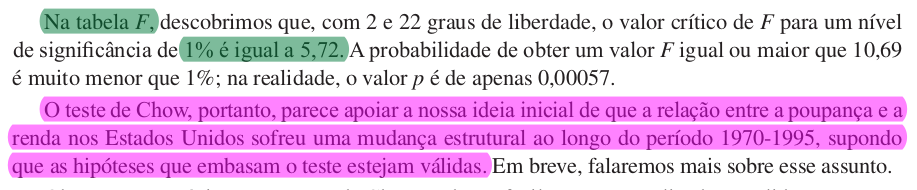

In [268]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_8.png')

### Premissas teste Chow

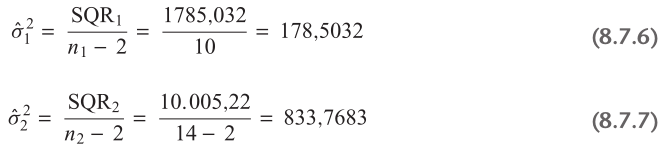

In [269]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_9.png')

In [270]:
sqr1 / gl1

115.07269489353828

In [271]:
sqr2 / gl2

779.6072364483748

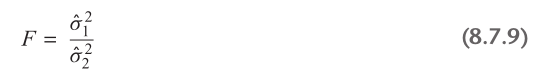

In [272]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_secao_8.7_10.png')

In [273]:
(sqr2/gl2) / (sqr1/gl1)

6.774910739421228

In [274]:
# Valor F de uma distribuição F com 13 grau de liberdade no numerador e 22 graus no denominador para um p-valor = 1%
p_valor = scipy.stats.f.ppf(q=1-0.01, dfn=gl2, dfd=gl1)
p_valor

5.054514262750388

**F > fc**

## Exemplo 8.5 Demanda por rosas

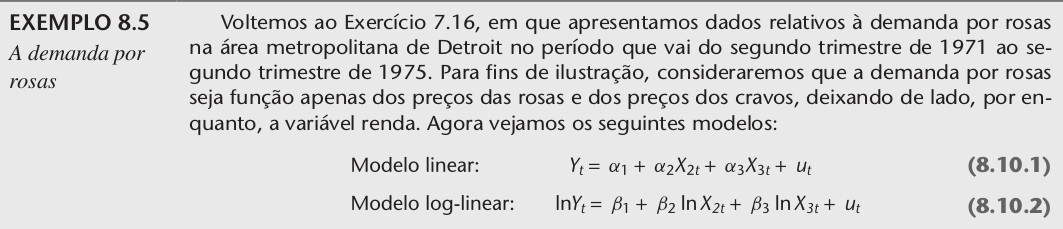

In [275]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_0.png')

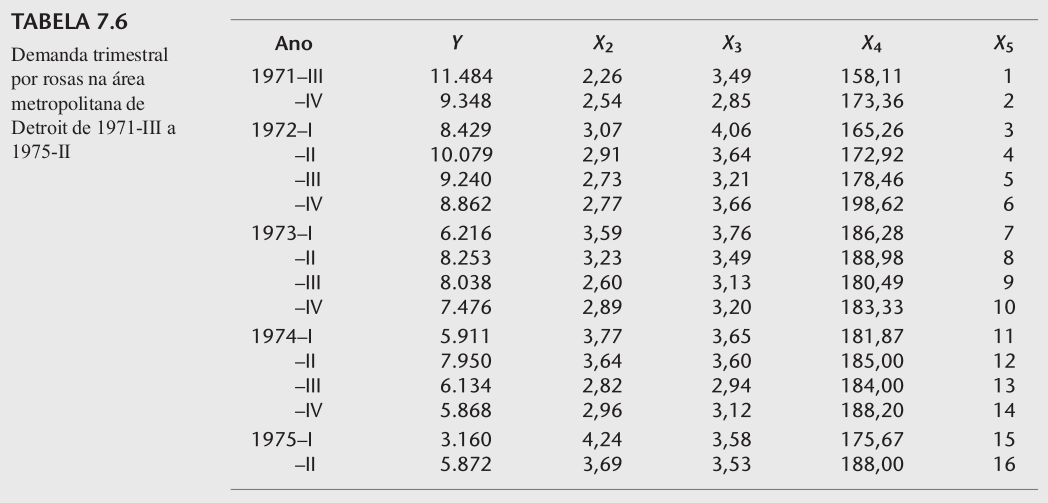

In [276]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_tabela_7.6_1.png')

In [277]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_7.6.xlsx')
data

qtd_rosas  preco_rosas  preco_cravo
0       11484       2.2600       3.4900
1        9348       2.5400       2.8500
2        8429       3.0700       4.0600
3       10079       2.9100       3.6400
4        9240       2.7300       3.2100
5        8862       2.7700       3.6600
6        6216       3.5900       3.7600
7        8253       3.2300       3.4900
8        8038       2.6000       3.1300
9        7476       2.8900       3.2000
10       5911       3.7700       3.6500
11       7950       3.6400       3.6000
12       6134       2.8200       2.9400
13       5868       2.9600       3.1200
14       3160       4.2400       3.5800
15       5872       3.6900       3.5300

### Modelo Linear

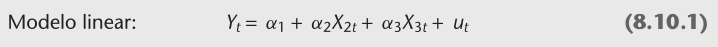

In [278]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_4.png')

In [279]:
reg1 = data.copy()
#statsmodels
x = reg1[['preco_rosas','preco_cravo']]
y = reg1['qtd_rosas']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              qtd_rosas   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     21.84
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           6.97e-05
Time:                        19:45:30   Log-Likelihood:                -132.36
No. Observations:                  16   AIC:                             270.7
Df Residuals:                      13   BIC:                             273.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9734.2174   2888.059      3.371      

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


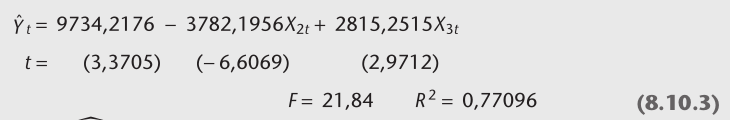

In [280]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_1.png')

In [281]:
#valor predito de mi
reg1['predict_yf'] = model.predict(x)

reg1.head()

qtd_rosas  preco_rosas  preco_cravo  predict_yf
0      11484       2.2600       3.4900  11011.6835
1       9348       2.5400       2.8500   8150.9076
2       8429       3.0700       4.0600   9552.7984
3      10079       2.9100       3.6400   8975.5440
4       9240       2.7300       3.2100   8445.7810

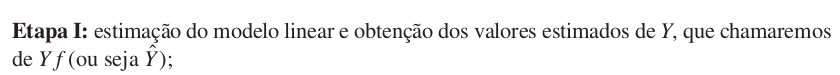

In [282]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_2.png')

### Modelo Log-Log

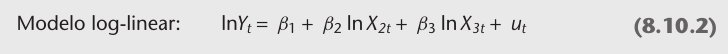

In [283]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_5.png')

In [284]:
# dataset Log-Log
reg2 = data.copy()
reg2['ln_qtd_rosas']    = np.log( reg2['qtd_rosas'] )
reg2['ln_preco_rosas']  = np.log( reg2['preco_rosas']  )
reg2['ln_preco_cravo']  = np.log( reg2['preco_cravo']  )
reg2

qtd_rosas  preco_rosas  preco_cravo  ln_qtd_rosas  ln_preco_rosas  ln_preco_cravo
0       11484       2.2600       3.4900        9.3487          0.8154          1.2499
1        9348       2.5400       2.8500        9.1429          0.9322          1.0473
2        8429       3.0700       4.0600        9.0394          1.1217          1.4012
3       10079       2.9100       3.6400        9.2182          1.0682          1.2920
4        9240       2.7300       3.2100        9.1313          1.0043          1.1663
5        8862       2.7700       3.6600        9.0895          1.0188          1.2975
6        6216       3.5900       3.7600        8.7349          1.2782          1.3244
7        8253       3.2300       3.4900        9.0183          1.1725          1.2499
8        8038       2.6000       3.1300        8.9919          0.9555          1.1410
9        7476       2.8900       3.2000        8.9195          1.0613          1.1632
10       5911       3.7700       3.6500        8.6846          1.3271          1.2947
11       7950       3.6400       3.6000        8.9809          1.2920          1.2809
12       6134       2.8200       2.9400        8.7216          1.0367          1.0784
13       5868       2.9600       3.1200        8.6773          1.0852          1.1378
14       3160       4.2400       3.5800        8.0583          1.4446          1.2754
15       5872       3.6900       3.5300        8.6780          1.3056          1.2613

In [285]:
#statsmodels
x = reg2[['ln_preco_rosas','ln_preco_cravo']]
y = reg2['ln_qtd_rosas']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ln_qtd_rosas   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     17.50
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           0.000205
Time:                        19:45:30   Log-Likelihood:                 7.1645
No. Observations:                  16   AIC:                            -8.329
Df Residuals:                      13   BIC:                            -6.011
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.2278      0.568     16.

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


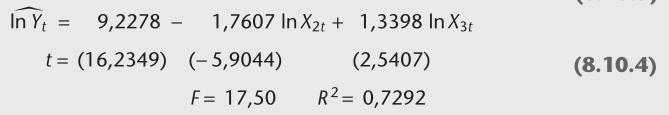

In [286]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_3.png')

In [287]:
#valor predito de mi
reg2['predict_lnf'] = model.predict(x)

reg2.head()

qtd_rosas  preco_rosas  preco_cravo  ln_qtd_rosas  ln_preco_rosas  ln_preco_cravo  predict_lnf
0      11484       2.2600       3.4900        9.3487          0.8154          1.2499       9.4667
1       9348       2.5400       2.8500        9.1429          0.9322          1.0473       8.9897
2       8429       3.0700       4.0600        9.0394          1.1217          1.4012       9.1301
3      10079       2.9100       3.6400        9.2182          1.0682          1.2920       9.0780
4       9240       2.7300       3.2100        9.1313          1.0043          1.1663       9.0220

### Cálculo de z1 e regressão

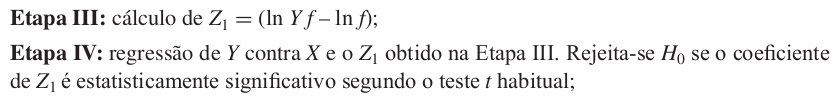

In [288]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_6.png')

In [289]:
reg1['lnf'] = reg2['predict_lnf']

In [290]:
reg1['z1'] = reg1.apply( lambda x: np.log( x['predict_yf'] ) - x['lnf'], axis = 1 )

In [291]:
reg1.head()

qtd_rosas  preco_rosas  preco_cravo  predict_yf    lnf      z1
0      11484       2.2600       3.4900  11011.6835 9.4667 -0.1600
1       9348       2.5400       2.8500   8150.9076 8.9897  0.0162
2       8429       3.0700       4.0600   9552.7984 9.1301  0.0345
3      10079       2.9100       3.6400   8975.5440 9.0780  0.0242
4       9240       2.7300       3.2100   8445.7810 9.0220  0.0194

In [292]:
#statsmodels
x = reg1[['preco_rosas', 'preco_cravo', 'z1']]
y = reg1['qtd_rosas']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              qtd_rosas   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     13.44
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           0.000382
Time:                        19:45:31   Log-Likelihood:                -132.36
No. Observations:                  16   AIC:                             272.7
Df Residuals:                      12   BIC:                             275.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9727.5663   3023.017      3.218      

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


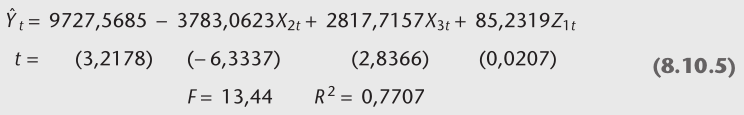

In [293]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_7.png')

### Conclusão do teste MWD

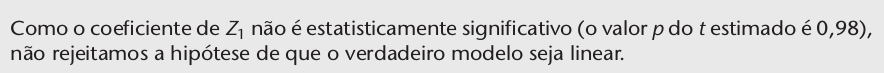

In [294]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_8.png')

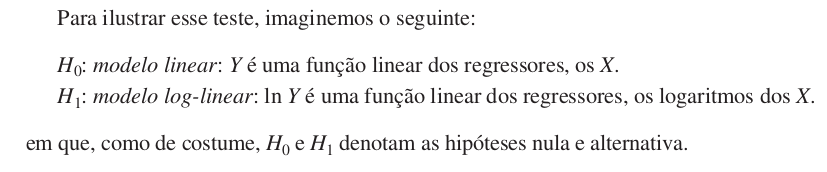

In [295]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_h0.png')

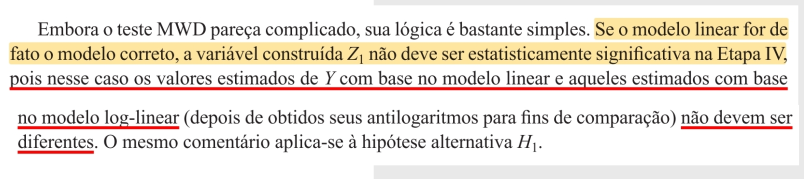

In [296]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_9.png')

### Cálculo de z2 e regressão

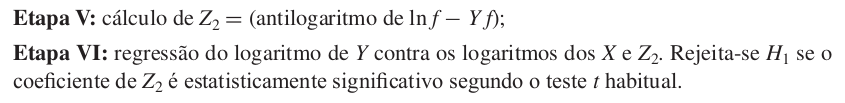

In [297]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_15.png')

In [298]:
reg2['yf'] = reg1['predict_yf']

In [299]:
reg2['z2'] = reg2.apply( lambda x: np.exp( x['predict_lnf'] ) - x['yf'], axis = 1 )

In [300]:
reg2.head()

qtd_rosas  preco_rosas  preco_cravo  ln_qtd_rosas  ln_preco_rosas  ln_preco_cravo  predict_lnf         yf        z2
0      11484       2.2600       3.4900        9.3487          0.8154          1.2499       9.4667 11011.6835 1910.8061
1       9348       2.5400       2.8500        9.1429          0.9322          1.0473       8.9897  8150.9076 -131.1983
2       8429       3.0700       4.0600        9.0394          1.1217          1.4012       9.1301  9552.7984 -324.0636
3      10079       2.9100       3.6400        9.2182          1.0682          1.2920       9.0780  8975.5440 -214.9778
4       9240       2.7300       3.2100        9.1313          1.0043          1.1663       9.0220  8445.7810 -162.3467

In [301]:
#statsmodels
x = reg2[['ln_preco_rosas', 'ln_preco_cravo', 'z2']]
y = reg2['ln_qtd_rosas']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ln_qtd_rosas   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     14.17
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           0.000301
Time:                        19:45:31   Log-Likelihood:                 8.8205
No. Observations:                  16   AIC:                            -9.641
Df Residuals:                      12   BIC:                            -6.551
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.1486      0.536     17.

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


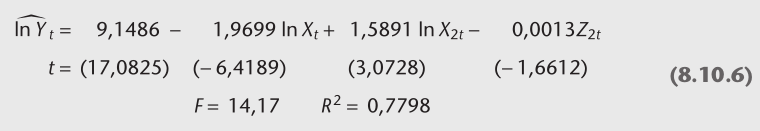

In [302]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_13.png')

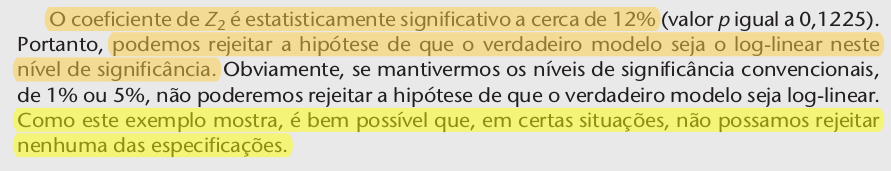

In [303]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_14.png')

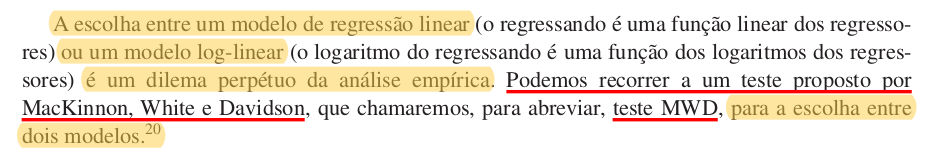

In [306]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_08_exemplo_8.5_16.png')